In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [18]:
d90_file = '../results/complexity_utf-16_10_10_2002_bibles_90_lcm.csv'
dall_file = '../results/complexity_utf-16_10_10_2002_bibles_lcm.csv'
d90_file_old = '../results/complexity_utf-16_10_10_10_bibles_90_lcm_old.csv'
dall_file_old = '../results/complexity_utf-16_10_10_10_bibles_lcm_old.csv'

family_file = '../dataset/family.csv'

df90 = pd.read_csv(d90_file)
df90 = df90[df90.language != 'NAMBIKUÁRA'] 

dfall = pd.read_csv(dall_file)
dfall = dfall[dfall.language != 'NAMBIKUÁRA']

df90_old = pd.read_csv(d90_file_old)
df90_old = df90_old[df90_old.language != 'NAMBIKUÁRA'] 

dfall_old = pd.read_csv(dall_file_old)
dfall_old = dfall_old[dfall_old.language != 'NAMBIKUÁRA']

family = pd.read_csv(family_file)

In [19]:
def calculate_sem(group):
    std = group['value'].std()
    n = len(group)
    sem = std / np.sqrt(n)
    return sem

def calculate_mean(group):
    mean = group['value'].mean()
    return mean

In [20]:
def calculate_sem_per_group(df):
    sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
    sem_stats.columns = ['language', 'algorithm', 'metric', 'sem']
    return sem_stats

def calculate_mean_per_group(df):
    sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_mean).reset_index()
    sem_stats.columns = ['language', 'algorithm', 'metric', 'mean']
    return sem_stats

sem_90 = calculate_sem_per_group(df90)
sem_all = calculate_sem_per_group(dfall)

sem_90_old = calculate_sem_per_group(df90_old)
sem_all_old = calculate_sem_per_group(dfall_old)

sem_90.to_csv('../results/sem_90_output.csv', index=False)
sem_all.to_csv('../results/sem_all_output.csv', index=False)
sem_90_old.to_csv('../results/sem_90_old_output.csv', index=False)
sem_all_old.to_csv('../results/sem_all_old_output.csv', index=False)

mean_90 = calculate_mean_per_group(df90)
mean_all = calculate_mean_per_group(dfall)

mean_90_old = calculate_mean_per_group(df90_old)
mean_all_old = calculate_mean_per_group(dfall_old)

mean_90.to_csv('../results/mean_90_output.csv', index=False)
mean_all.to_csv('../results/mean_all_output.csv', index=False)
mean_90_old.to_csv('../results/mean_90_old_output.csv', index=False)
mean_all_old.to_csv('../results/mean_all_old_output.csv', index=False)

print("d90 SEM")
print(sem_90.head(100))
print(sem_90_old.head(100))

print("d90 MEAN")
print(mean_90.head(100))
print(mean_90_old.head(100))

print("dall SEM")
print(sem_all.head(100))
print(sem_all_old.head(100))

print("dall MEAN")
print(mean_all.head(100))
print(mean_all_old.head(100))

/tmp/ipykernel_13717/3553800104.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
/tmp/ipykernel_13717/3553800104.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_sem).reset_index()
/tmp/ipykernel_13717/3553800104.py:2: DeprecationWar

d90 SEM
         language algorithm        metric       sem
0   ANCIENT_GREEK       bz2     del-chars  0.000432
1   ANCIENT_GREEK       bz2    del-verses  0.000405
2   ANCIENT_GREEK       bz2     del-words  0.000244
3   ANCIENT_GREEK       bz2  delUni-chars  0.000249
4   ANCIENT_GREEK       bz2  delUni-words  0.000208
..            ...       ...           ...       ...
95      ASHENINKA      none     shuf-word  0.000000
96        ENGLISH       bz2     del-chars  0.000242
97        ENGLISH       bz2    del-verses  0.000530
98        ENGLISH       bz2     del-words  0.000299
99        ENGLISH       bz2  delUni-chars  0.000531

[100 rows x 4 columns]
         language algorithm      metric       sem
0   ANCIENT_GREEK       bz2   del-chars  0.000355
1   ANCIENT_GREEK       bz2  del-verses  0.000563
2   ANCIENT_GREEK       bz2   del-words  0.000142
3   ANCIENT_GREEK       bz2  do-nothing  0.000000
4   ANCIENT_GREEK       bz2   rep-words  0.000132
..            ...       ...         ...     

/tmp/ipykernel_13717/3553800104.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_mean).reset_index()
/tmp/ipykernel_13717/3553800104.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sem_stats = df.groupby(['language', 'algorithm', 'metric']).apply(calculate_mean).reset_index()


In [21]:
def calculate_sem_erros(df_new, df_old):
    result = df_new.copy()
    result['abs_error'] = (df_new['sem']-df_old['sem']).abs()
    result['rel_error'] = (result['abs_error']/df_old['sem']).replace([np.inf, -np.inf], np.nan)*100
    return result

def calculate_mean_erros(df_new, df_old):
    result = df_new.copy()
    result['abs_error'] = (df_new['mean'] - df_old['mean']).abs()
    result['rel_error'] = (result['abs_error'] / df_old['mean']).replace([np.inf, -np.inf], np.nan) * 100
    return result

sem_90_errors = calculate_sem_erros(sem_90, sem_90_old)
sem_all_errors = calculate_sem_erros(sem_all, sem_all_old)

sem_90_errors.to_csv('../results/sem_90_errors_output.csv', index=False)
sem_all_errors.to_csv('../results/sem_all_errors_output.csv', index=False)

print("Erro absoluto e relativo do sem para d90")
print(sem_90_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

print("Erro absoluto e relativo do sem para dall")
print(sem_all_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

mean_90_errors = calculate_mean_erros(mean_90, mean_90_old)
mean_all_errors = calculate_mean_erros(mean_all, mean_all_old)

mean_90_errors.to_csv('../results/mean_90_errors_output.csv', index=False)
mean_all_errors.to_csv('../results/mean_all_errors_output.csv', index=False)

print("Erro absoluto e relativo da media para d90")
print(mean_90_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

print("Erro absoluto e relativo da media para dall")
print(mean_all_errors[['language', 'algorithm', 'metric', 'abs_error', 'rel_error']])

Erro absoluto e relativo do sem para d90
          language algorithm        metric  abs_error  rel_error
0    ANCIENT_GREEK       bz2     del-chars   0.000077  21.712613
1    ANCIENT_GREEK       bz2    del-verses   0.000158  28.090333
2    ANCIENT_GREEK       bz2     del-words   0.000102  71.296421
3    ANCIENT_GREEK       bz2  delUni-chars   0.000249        NaN
4    ANCIENT_GREEK       bz2  delUni-words   0.000076  57.360260
..             ...       ...           ...        ...        ...
643       YANOMAMI      none  delUni-chars        NaN        NaN
644       YANOMAMI      none  delUni-words        NaN        NaN
645       YANOMAMI      none    do-nothing        NaN        NaN
646       YANOMAMI      none     rep-words        NaN        NaN
647       YANOMAMI      none     shuf-word        NaN        NaN

[648 rows x 5 columns]
Erro absoluto e relativo do sem para dall
           language algorithm        metric  abs_error  rel_error
0     ANCIENT_GREEK       bz2     del-chars   0

Plotting gzip - del-verses para D90


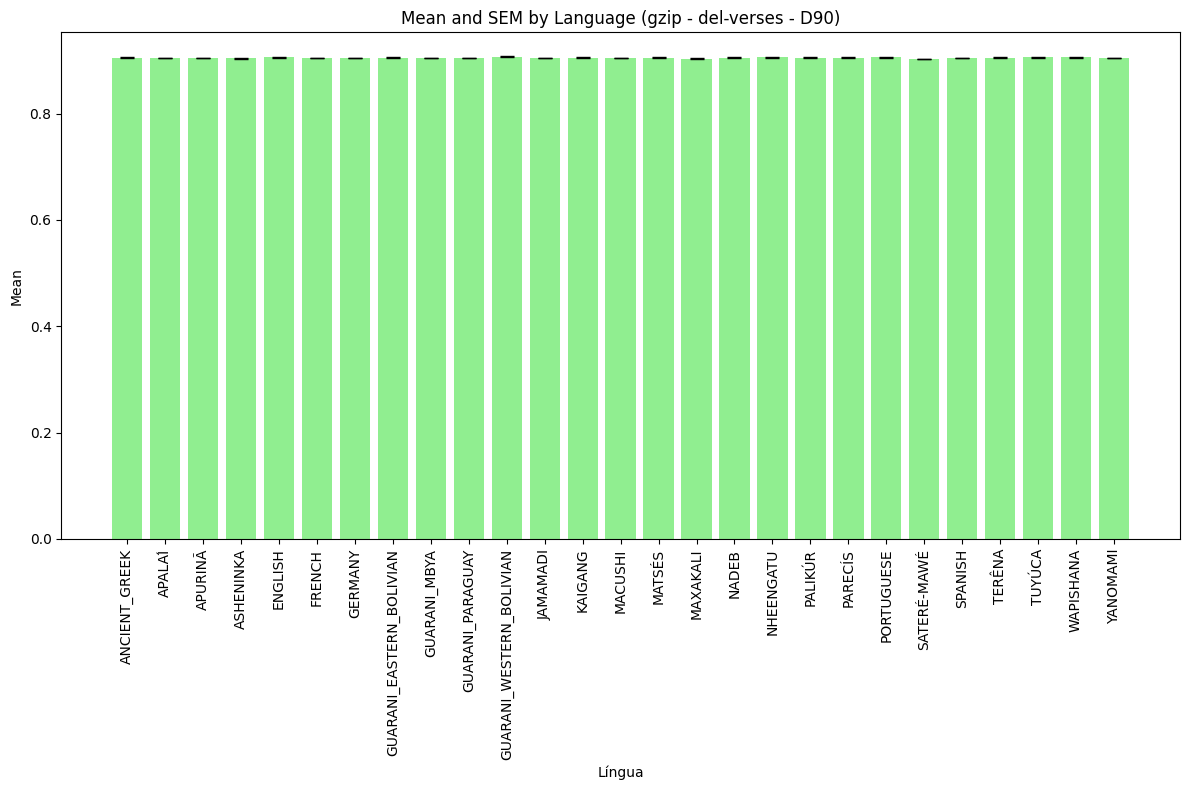

Plotting gzip - del-verses para Dall


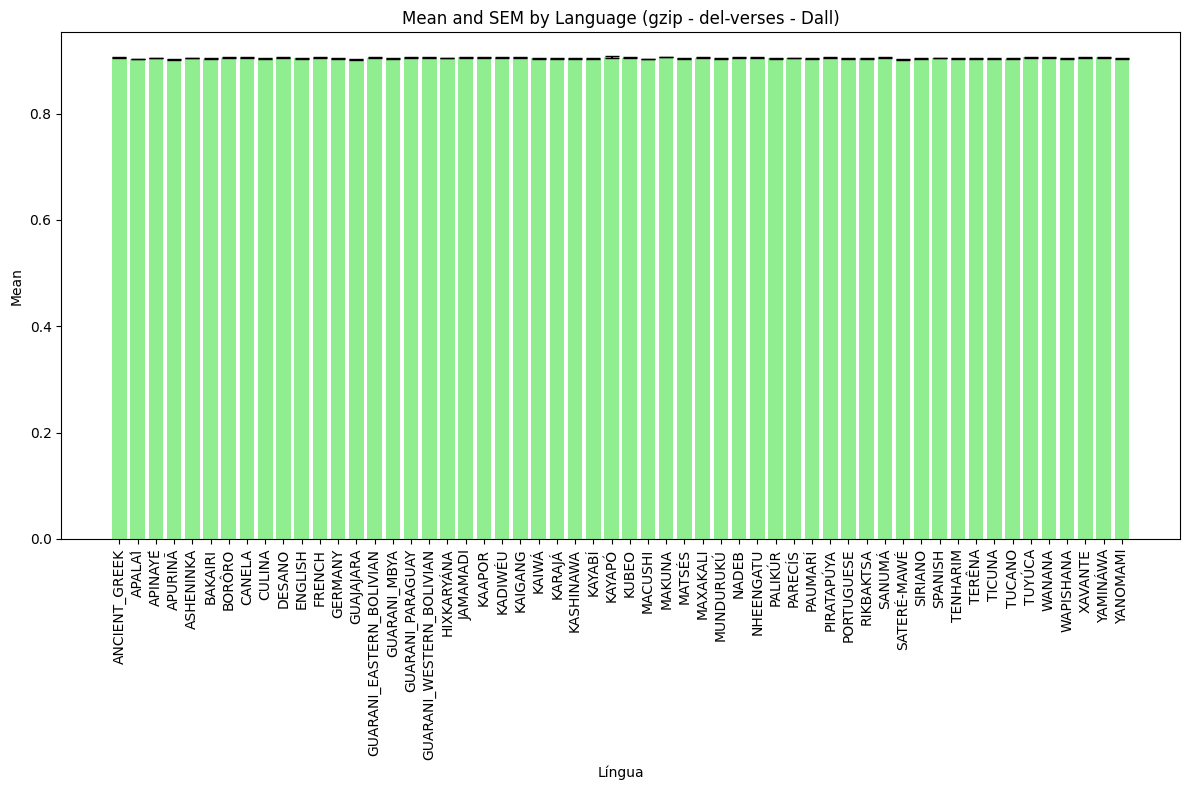

Plotting gzip - del-words para D90


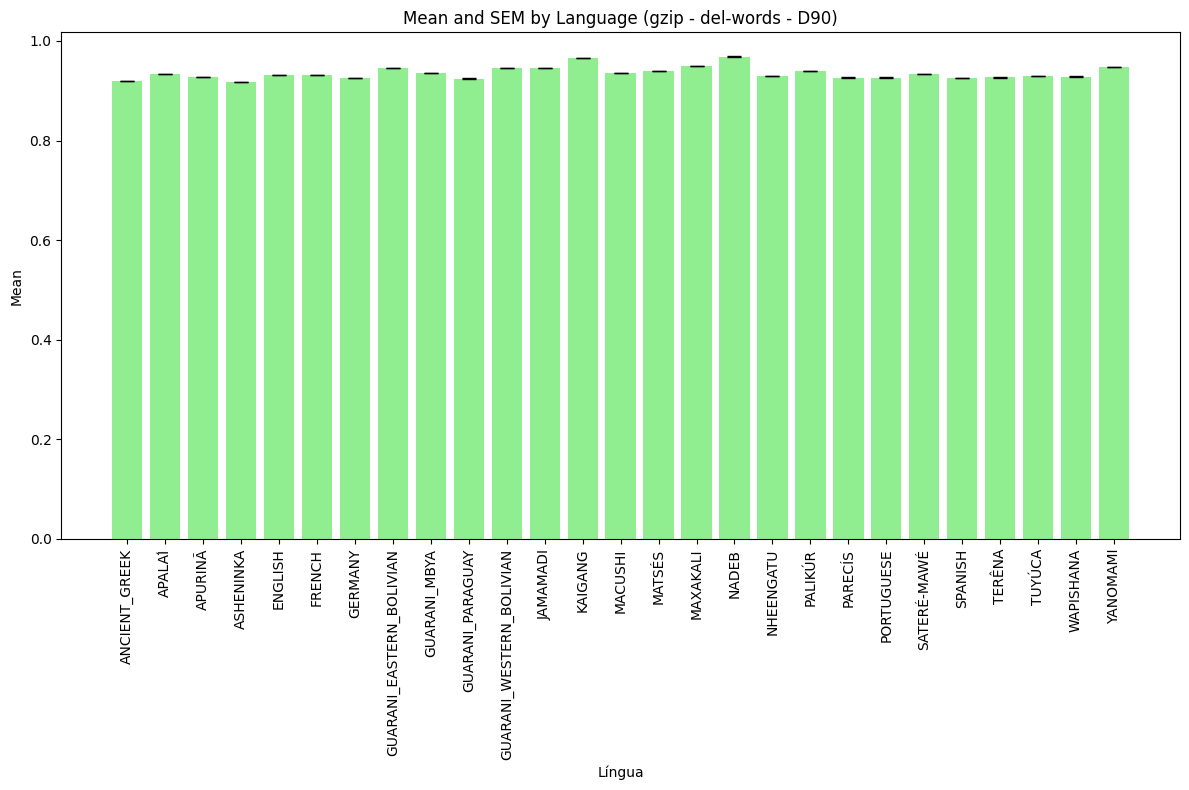

Plotting gzip - del-words para Dall


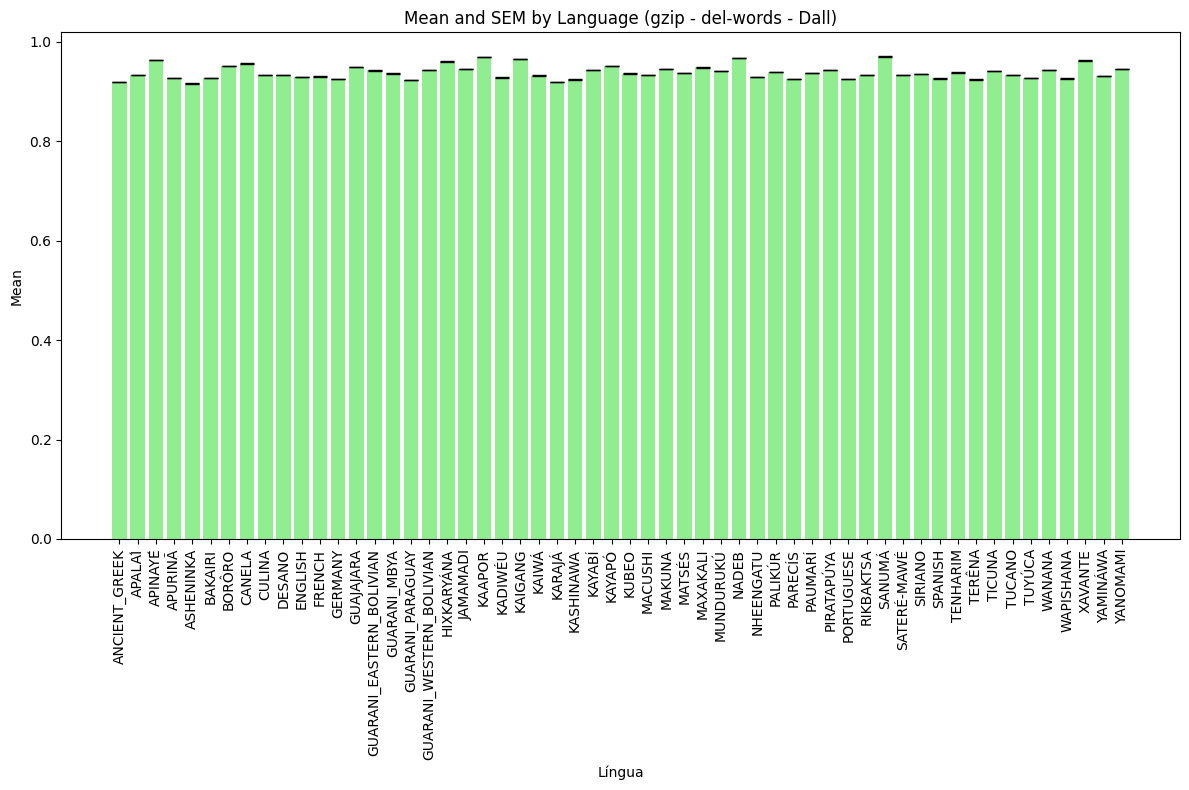

Plotting gzip - del-chars para D90


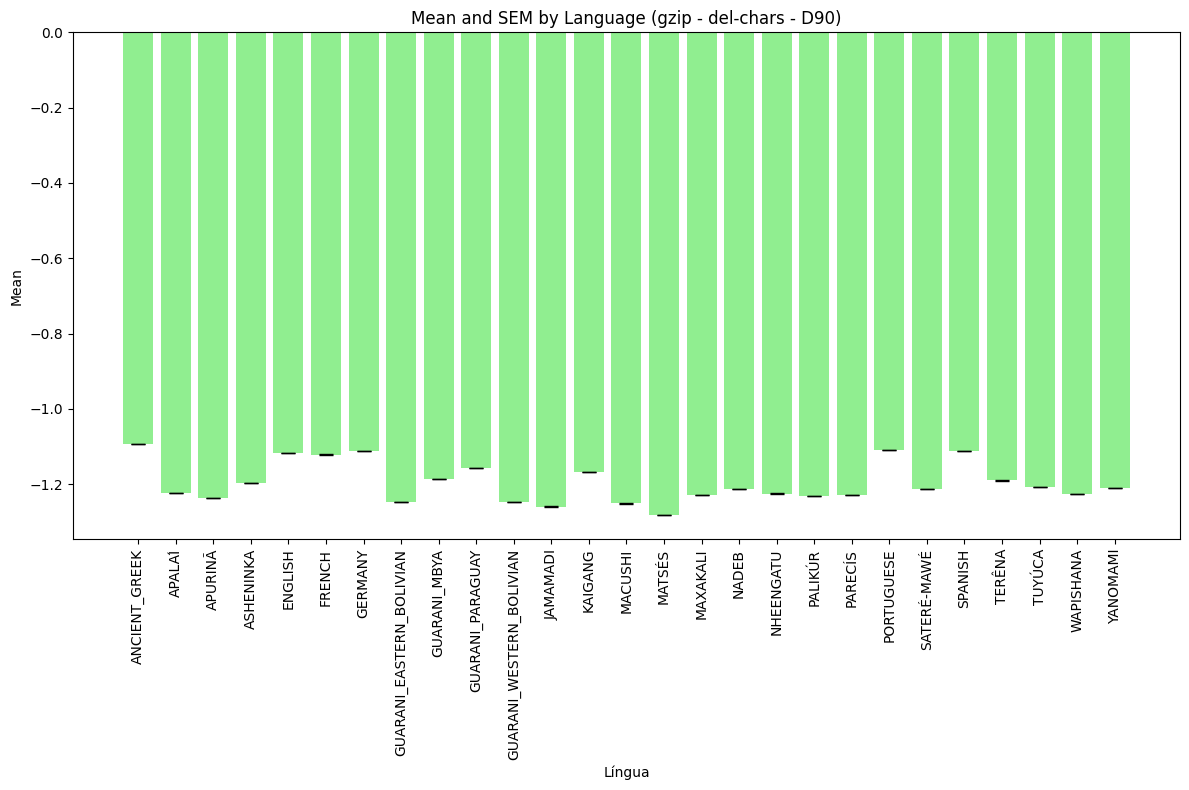

Plotting gzip - del-chars para Dall


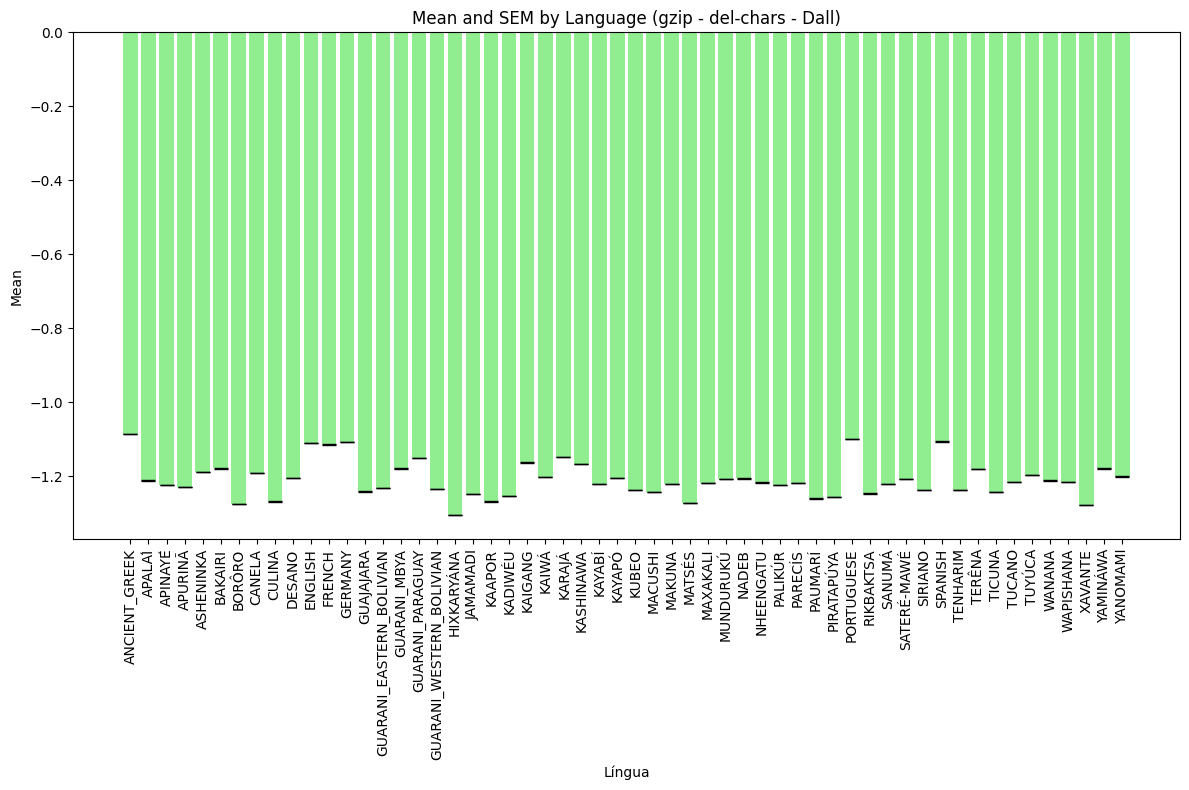

Plotting gzip - delUni-chars para D90


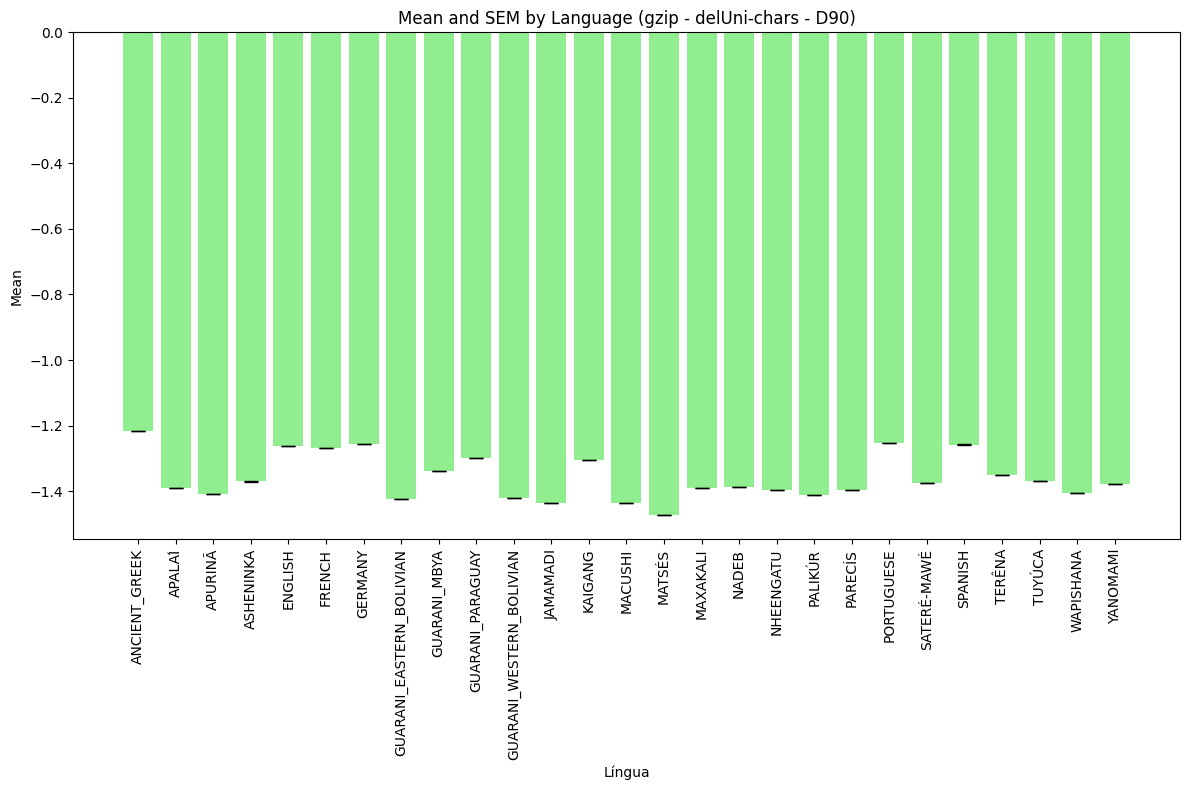

Plotting gzip - delUni-chars para Dall


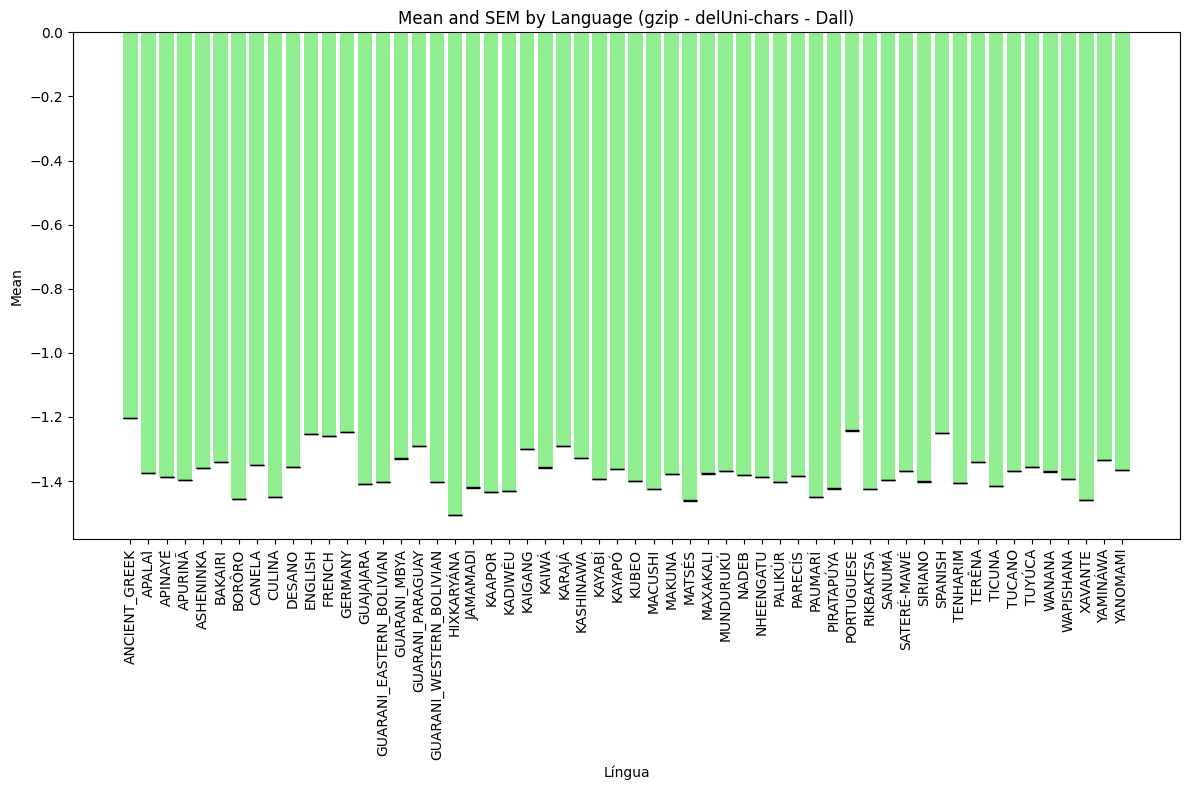

Plotting gzip - delUni-words para D90


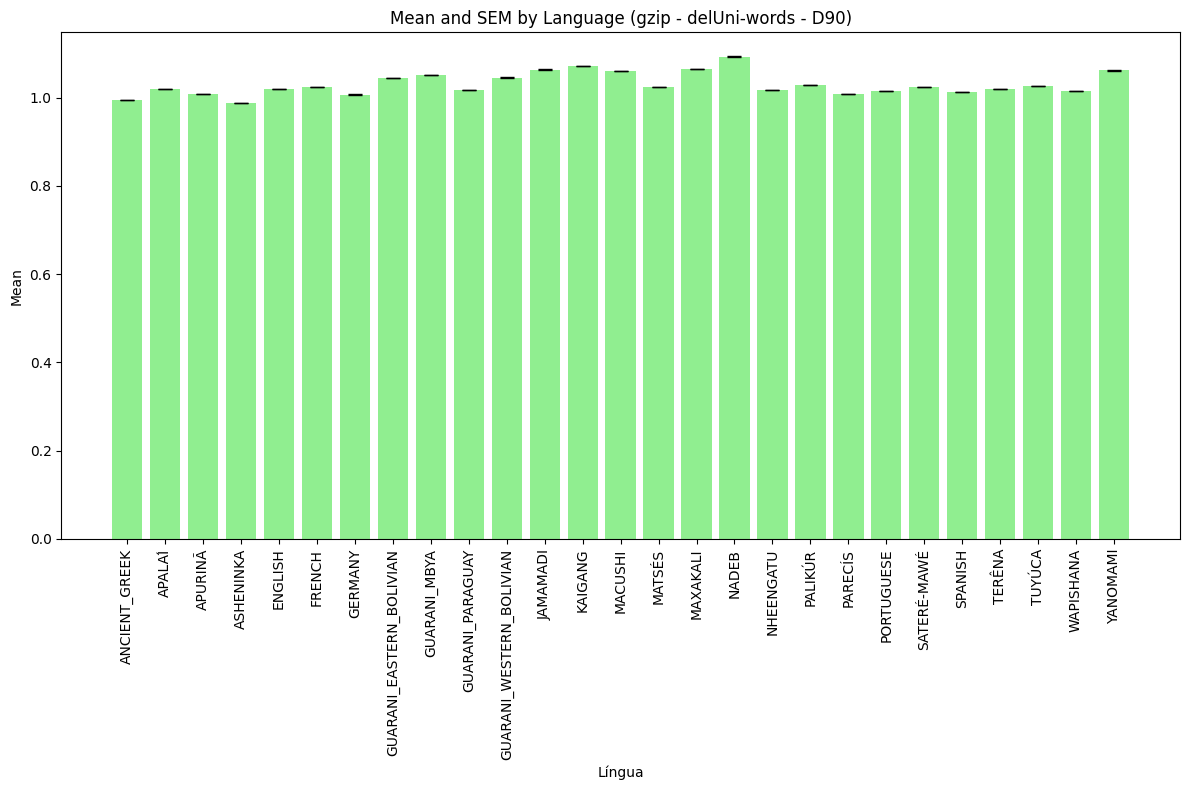

Plotting gzip - delUni-words para Dall


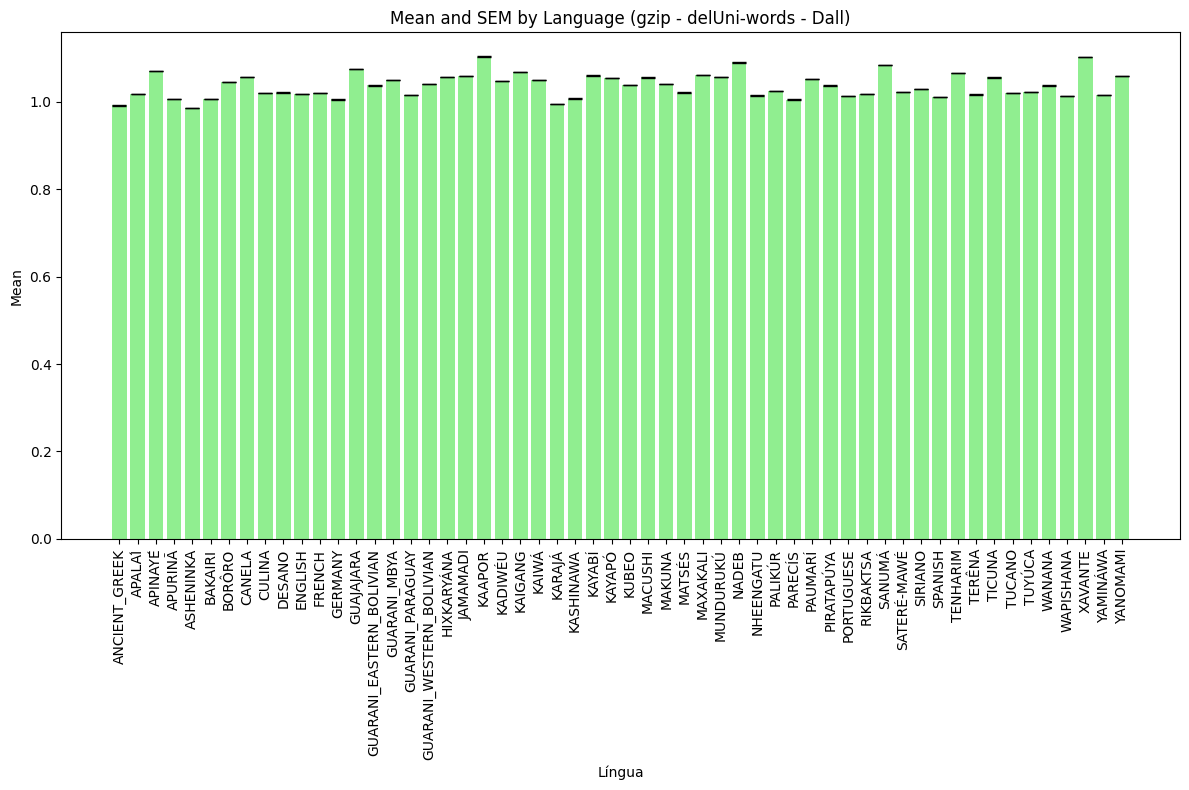

Plotting gzip - shuf-word para D90


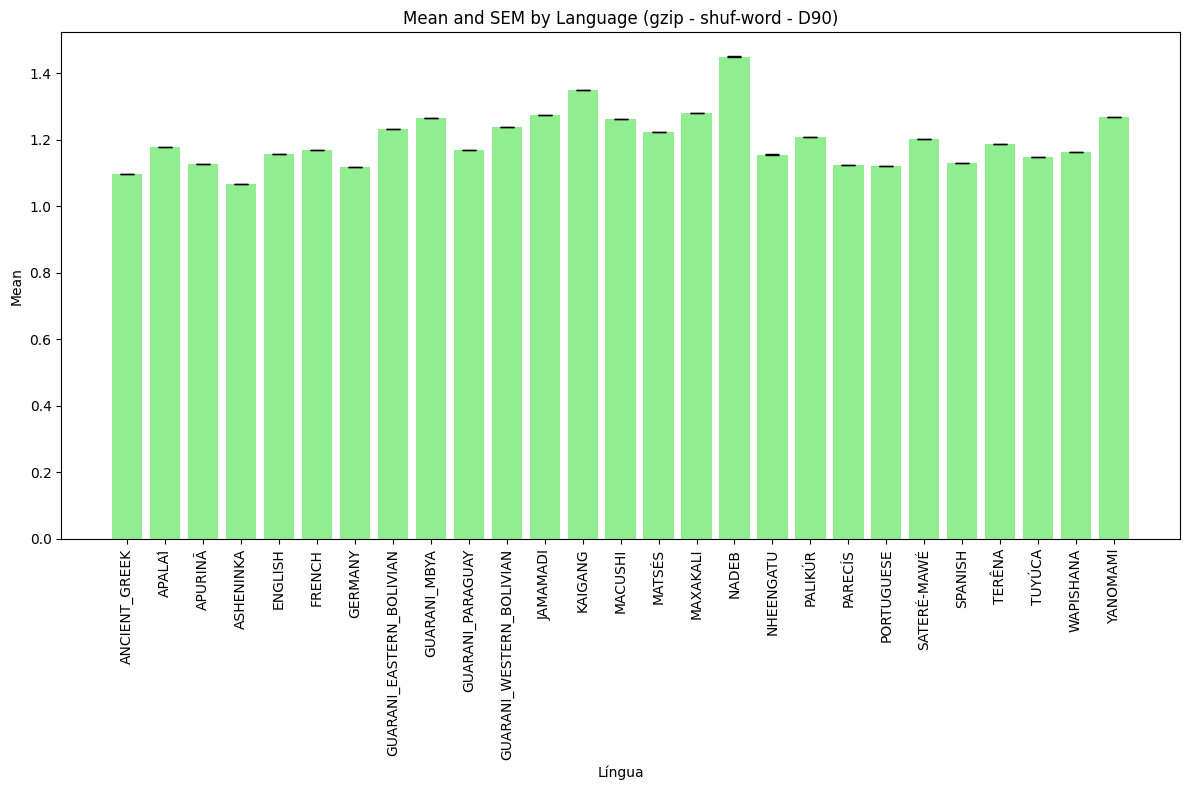

Plotting gzip - shuf-word para Dall


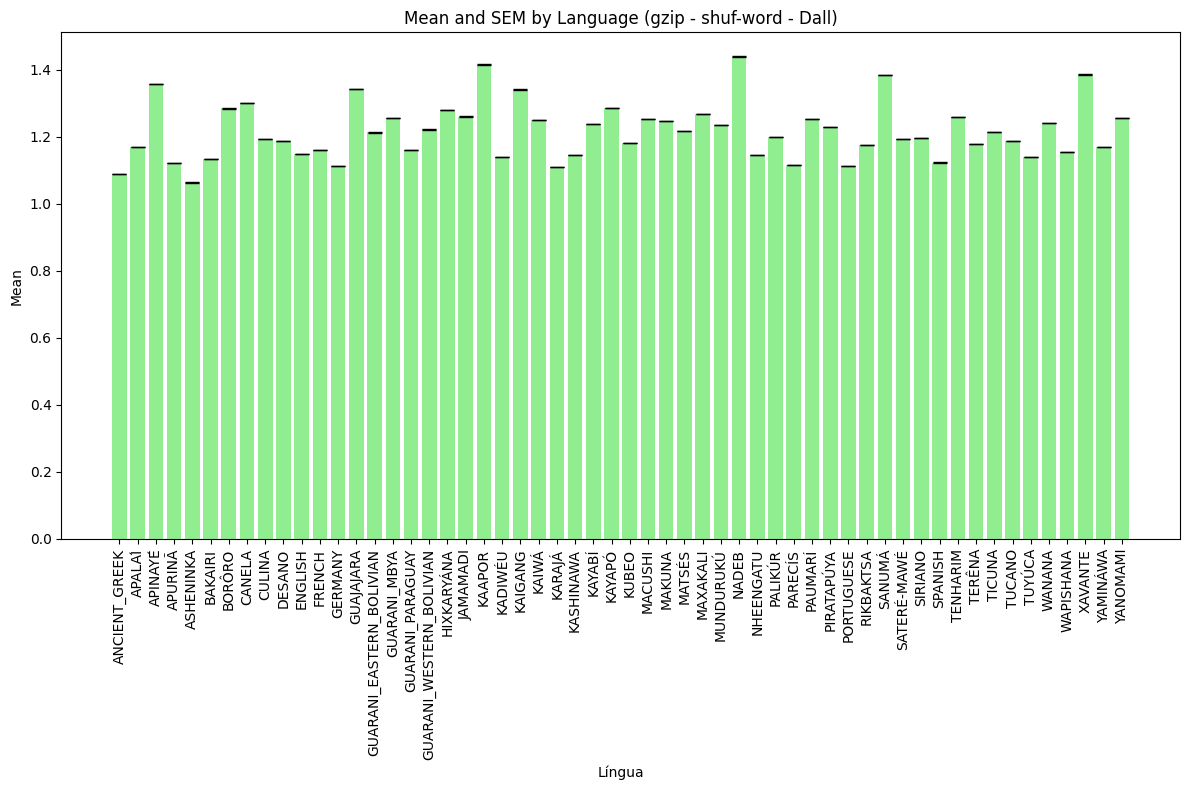

Plotting gzip - rep-words para D90


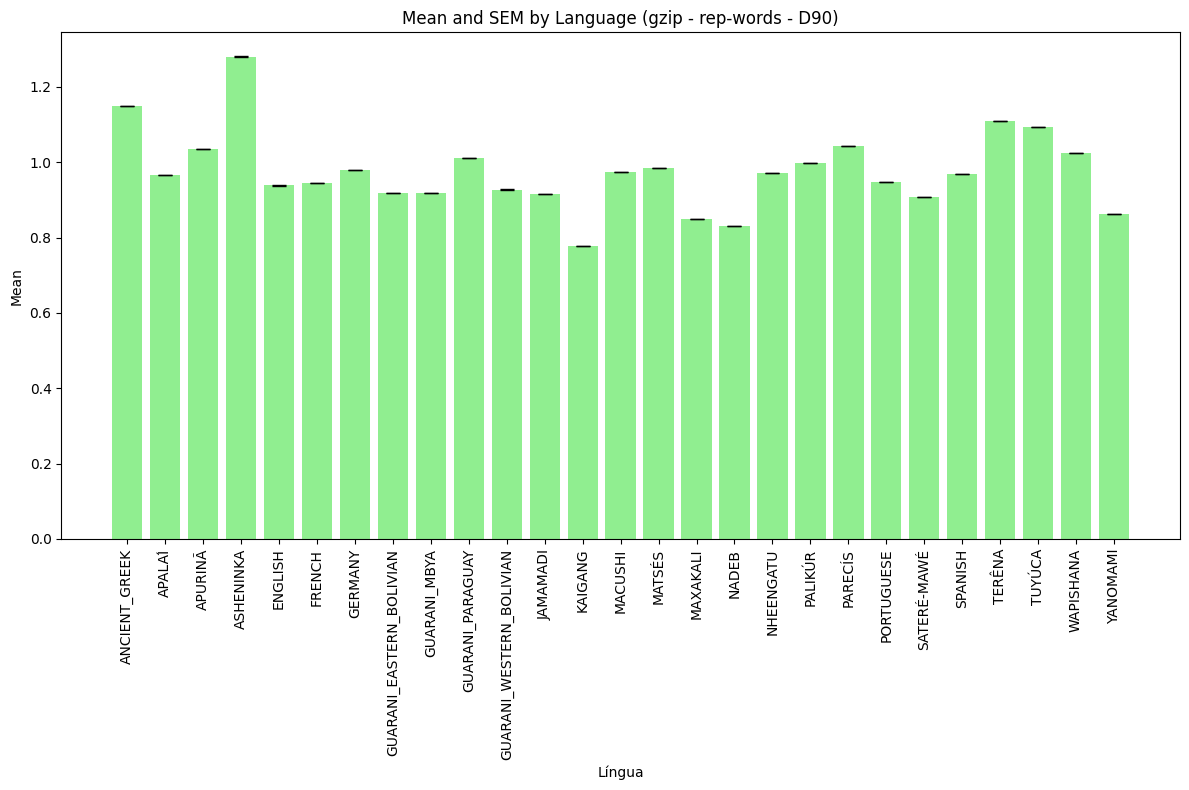

Plotting gzip - rep-words para Dall


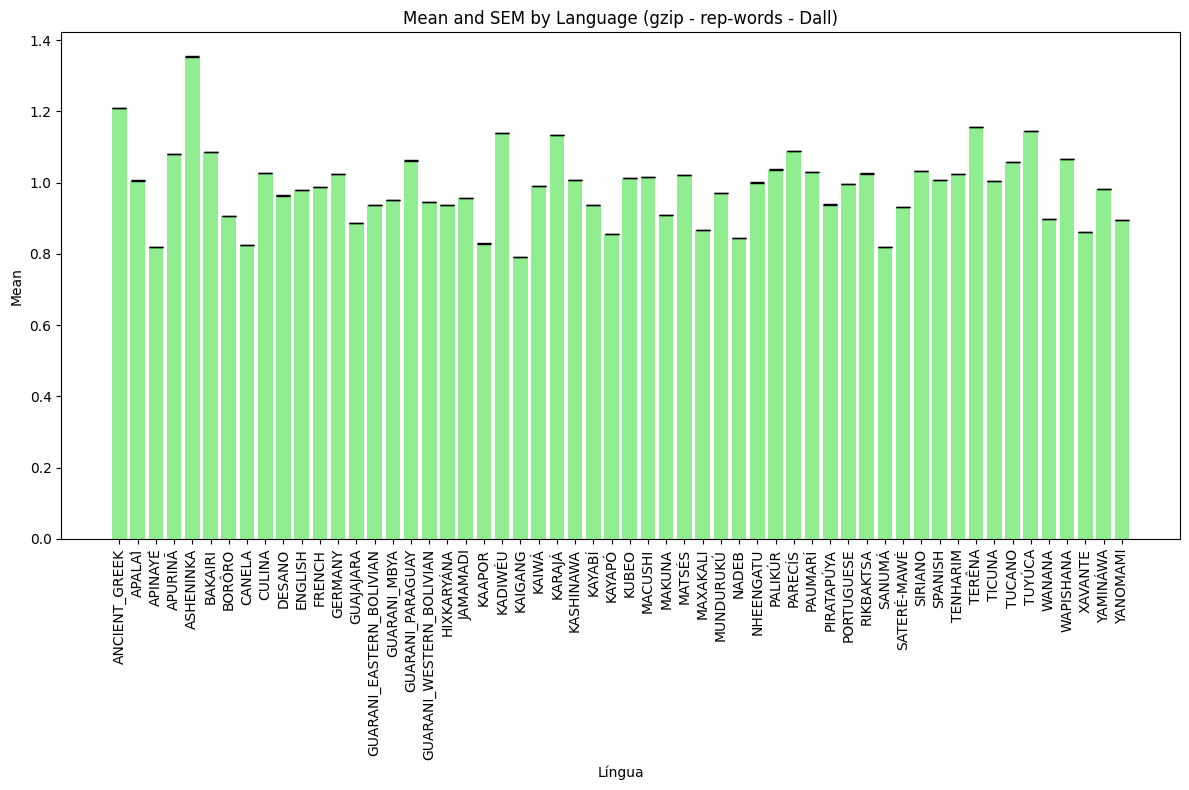

Plotting gzip - do-nothing para D90


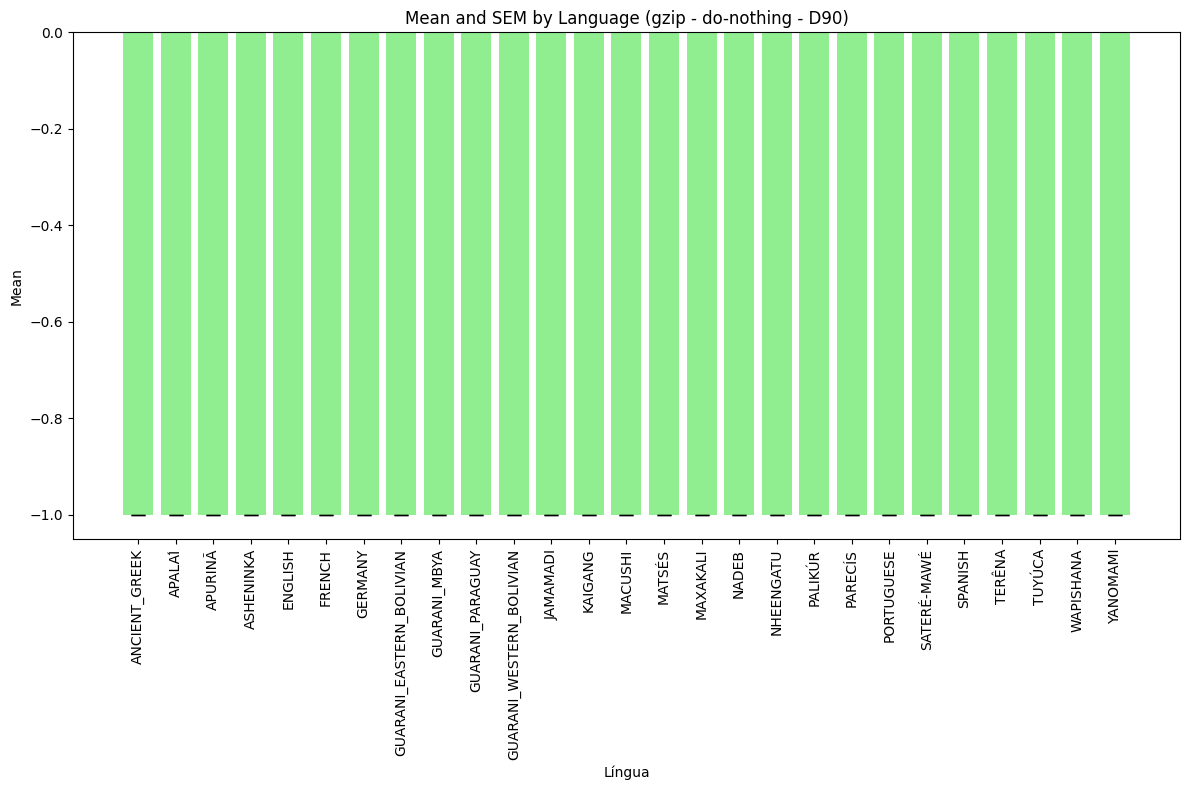

Plotting gzip - do-nothing para Dall


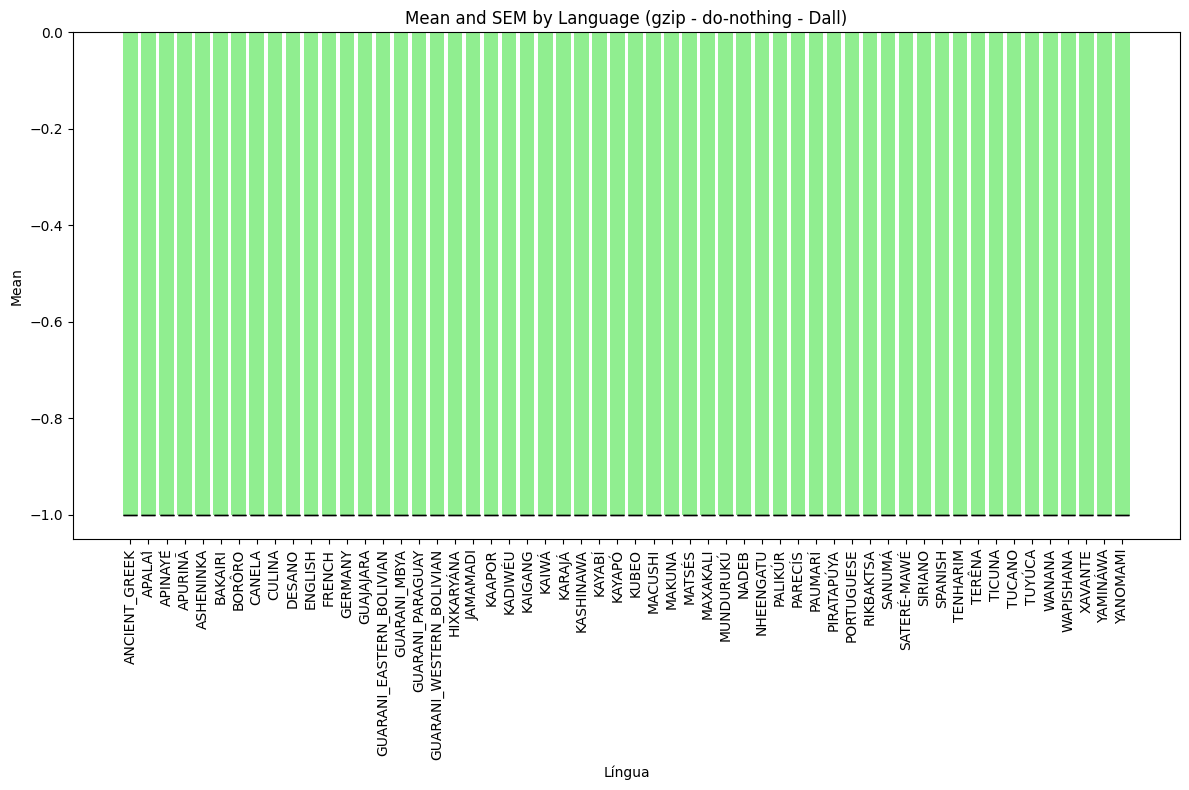

Plotting bz2 - del-verses para D90


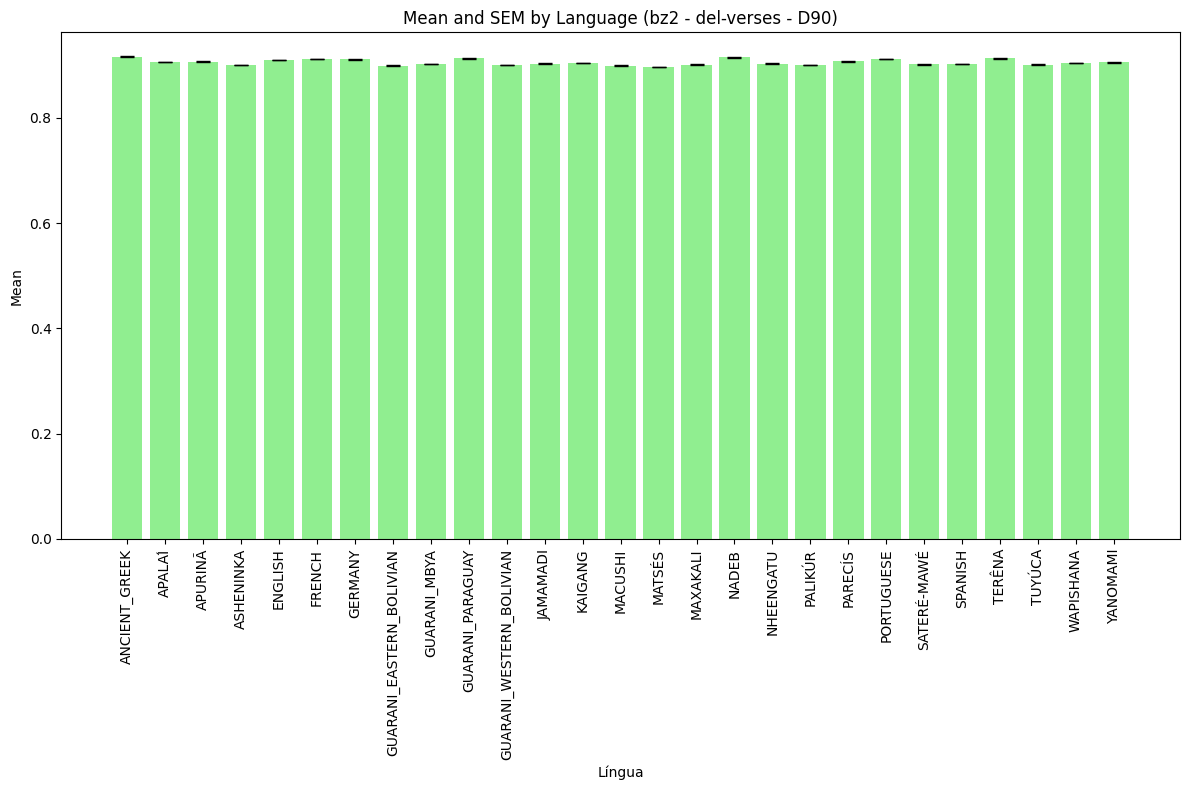

Plotting bz2 - del-verses para Dall


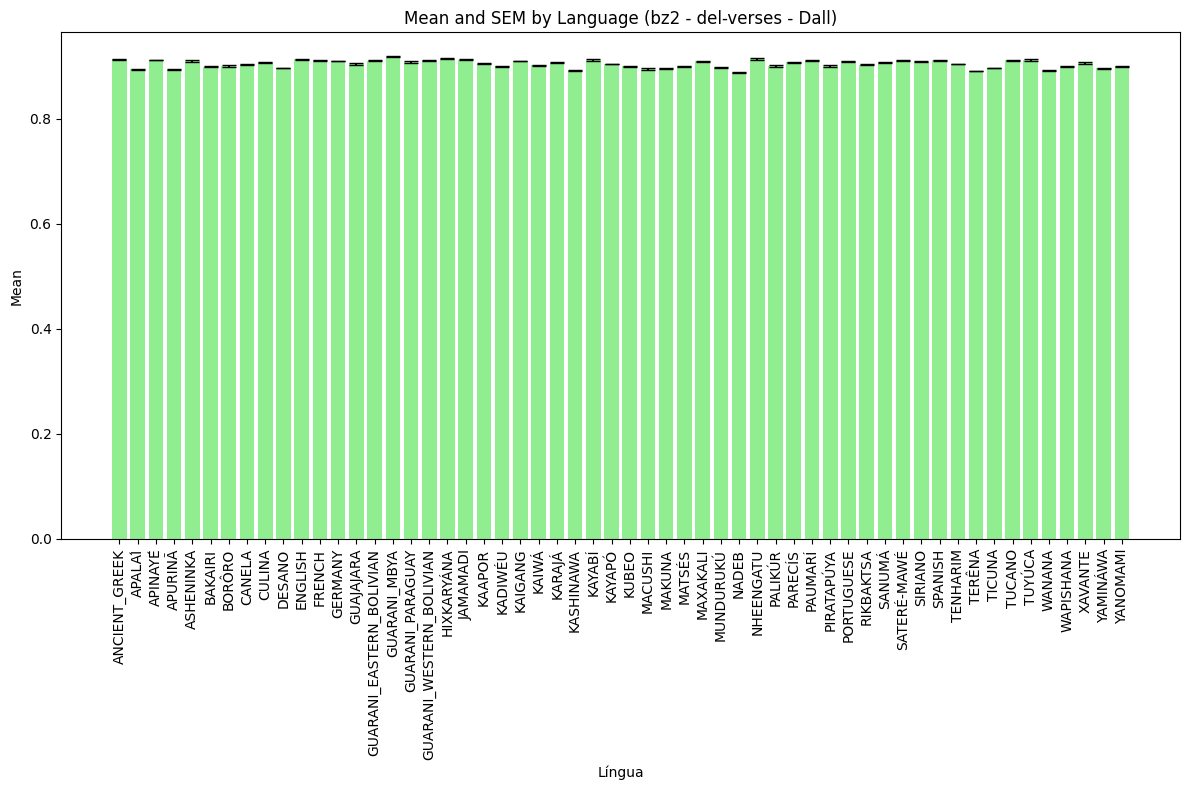

Plotting bz2 - del-words para D90


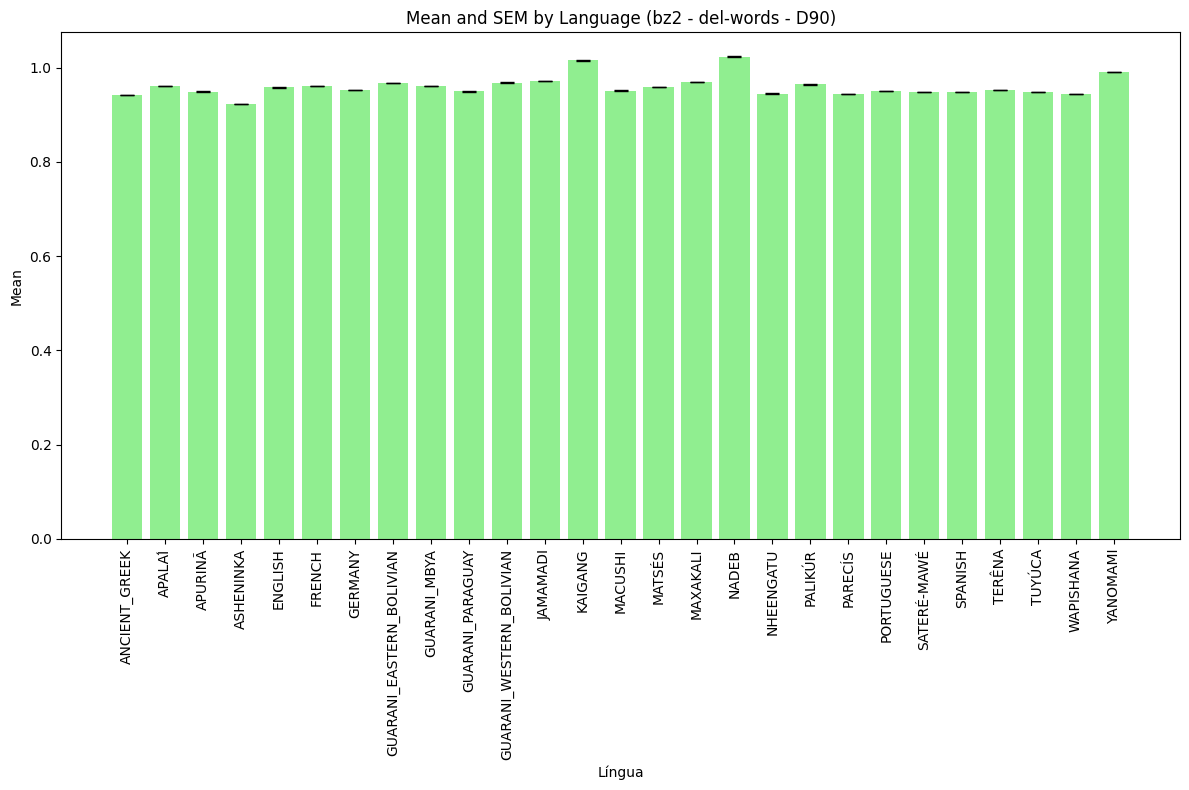

Plotting bz2 - del-words para Dall


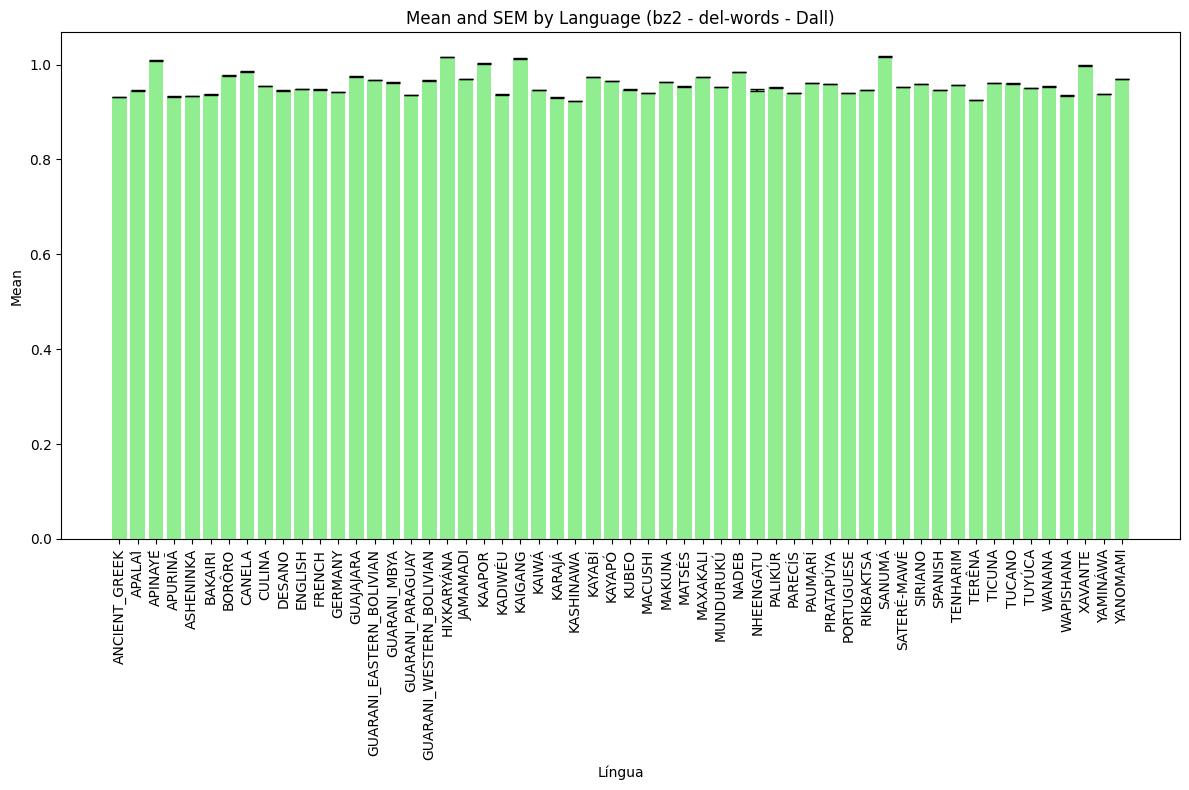

Plotting bz2 - del-chars para D90


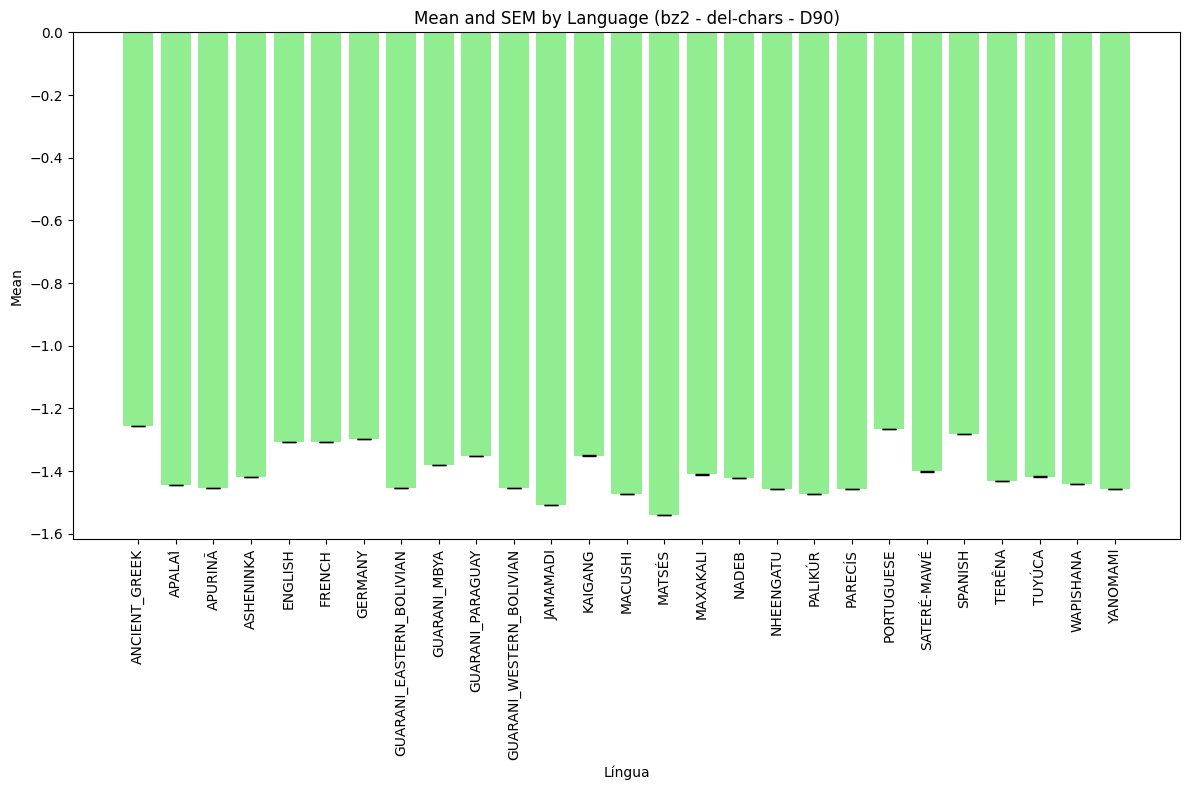

Plotting bz2 - del-chars para Dall


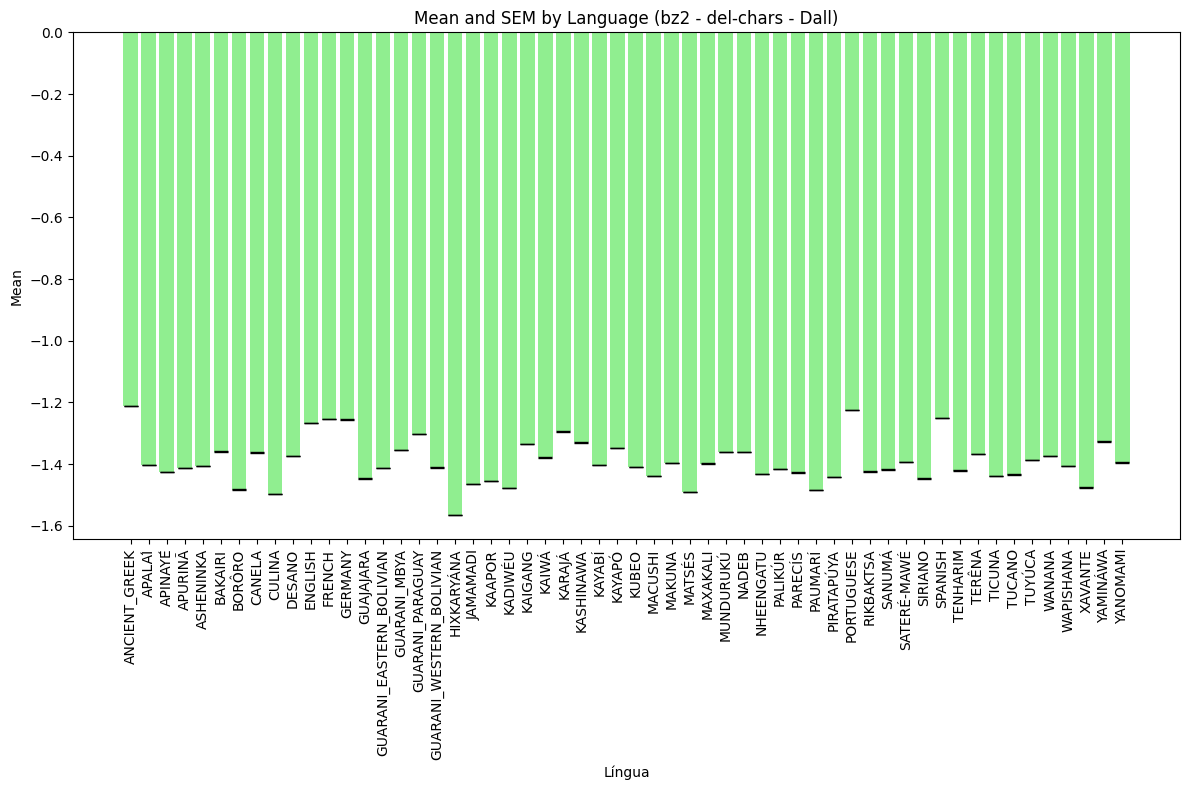

Plotting bz2 - delUni-chars para D90


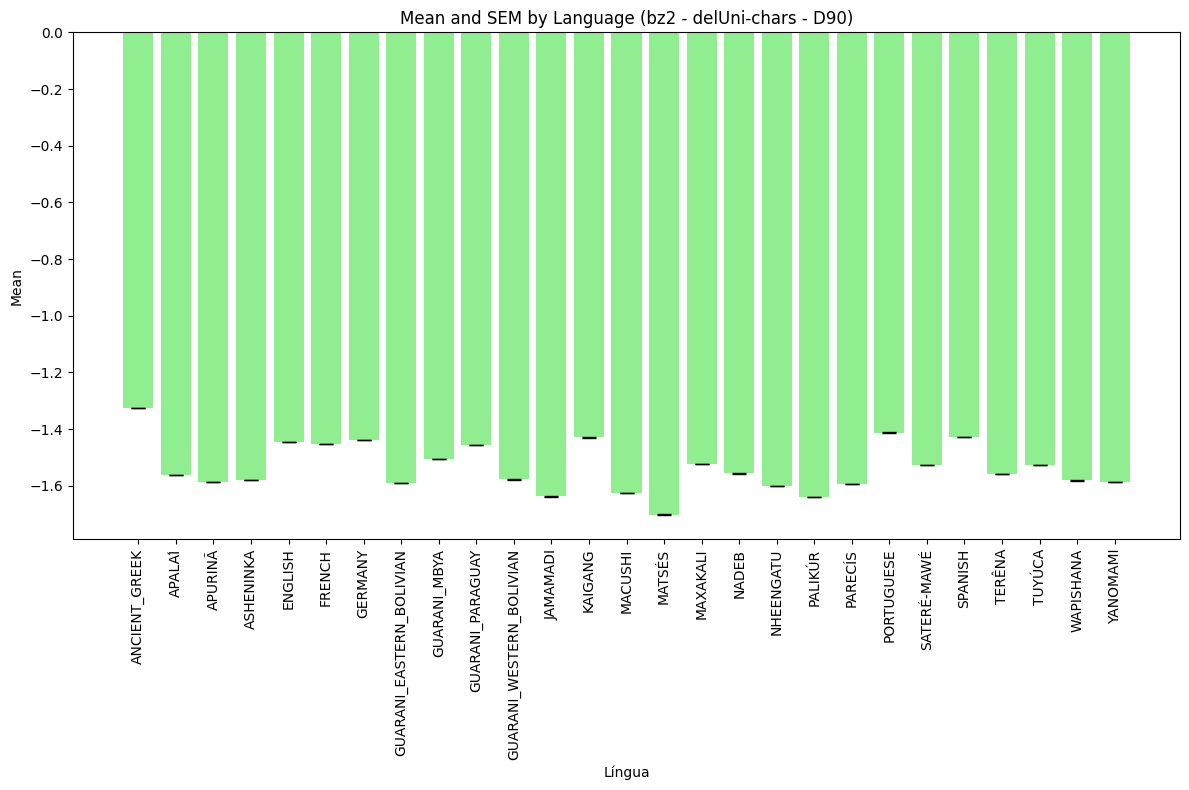

Plotting bz2 - delUni-chars para Dall


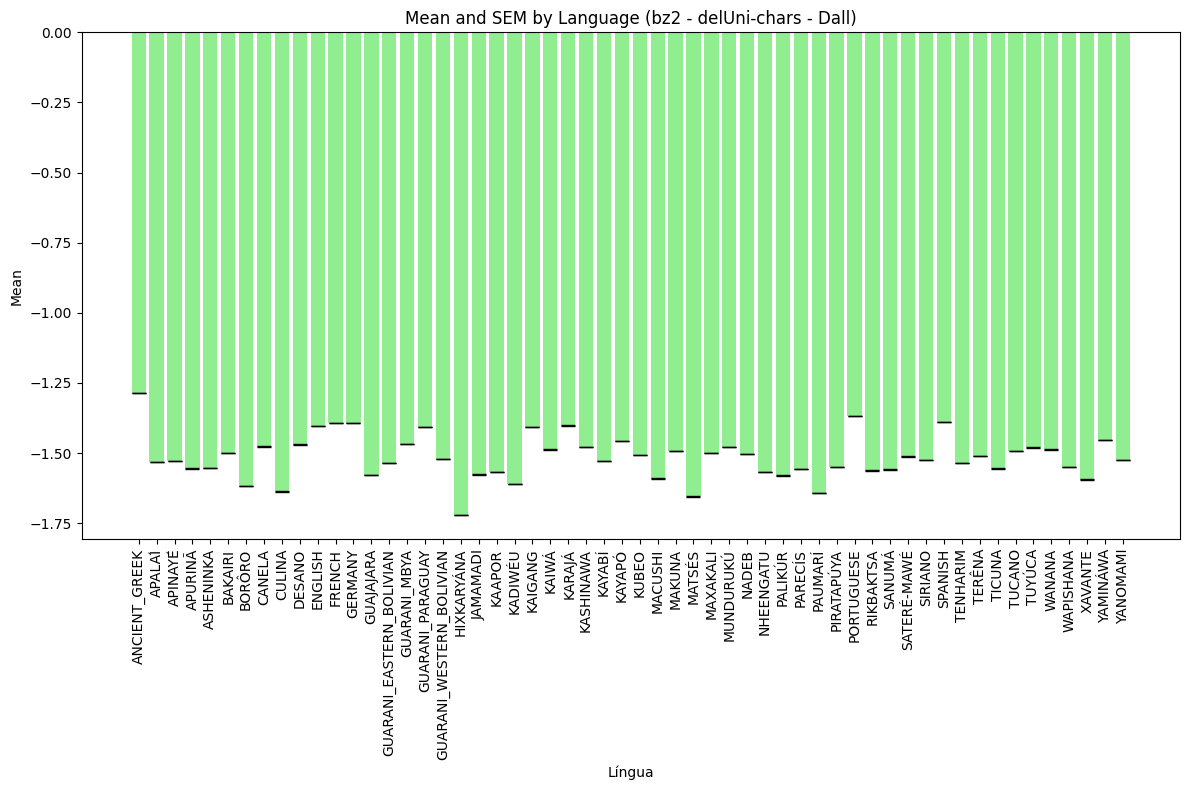

Plotting bz2 - delUni-words para D90


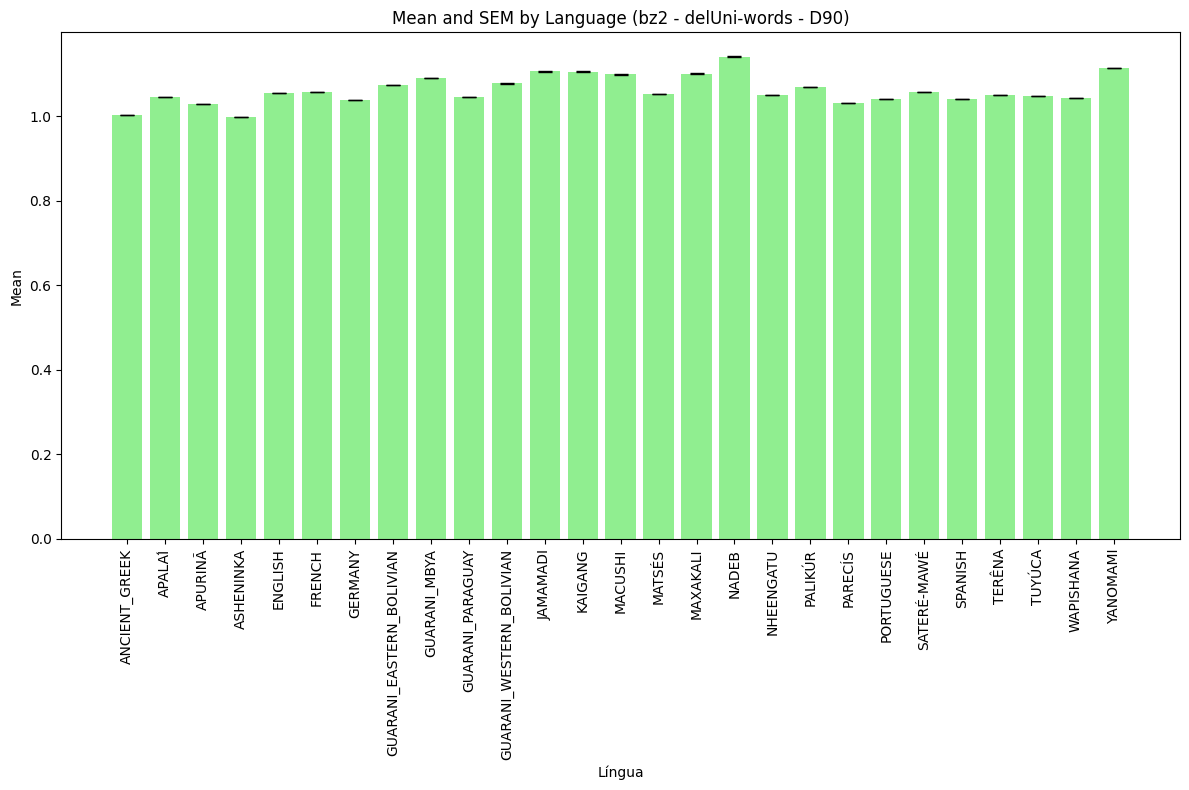

Plotting bz2 - delUni-words para Dall


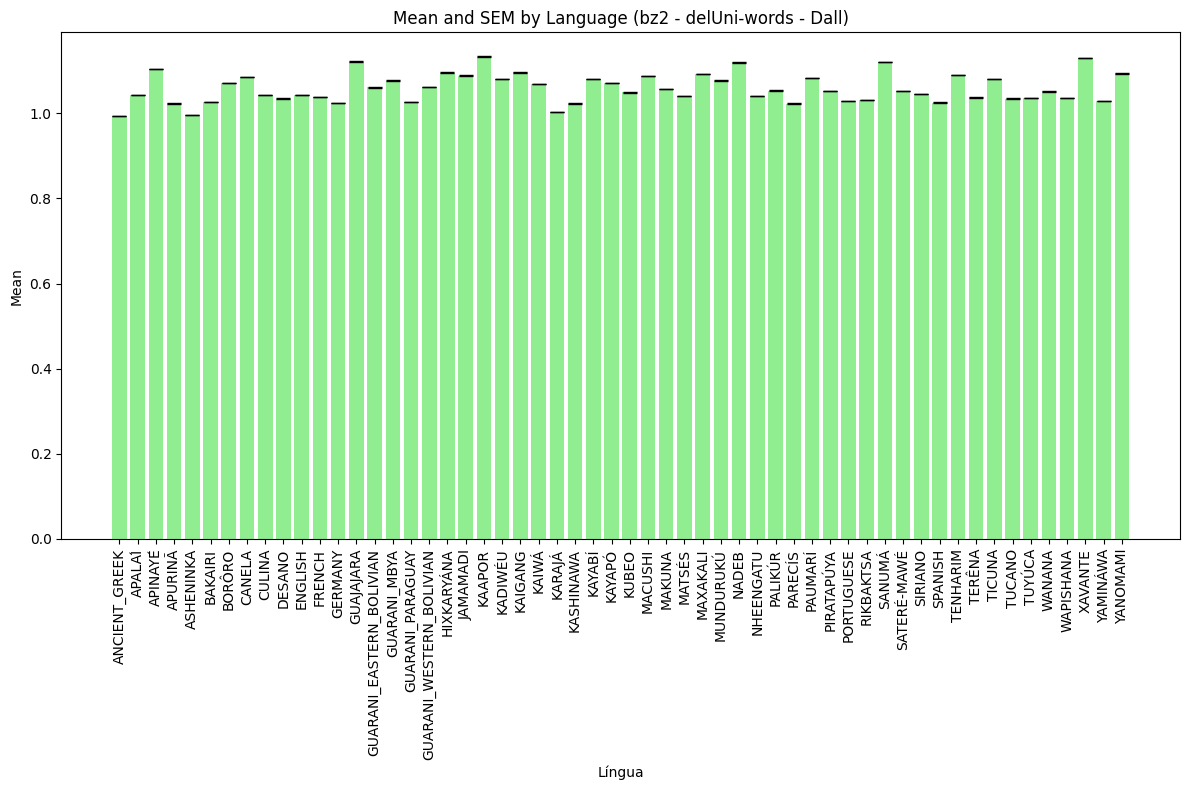

Plotting bz2 - shuf-word para D90


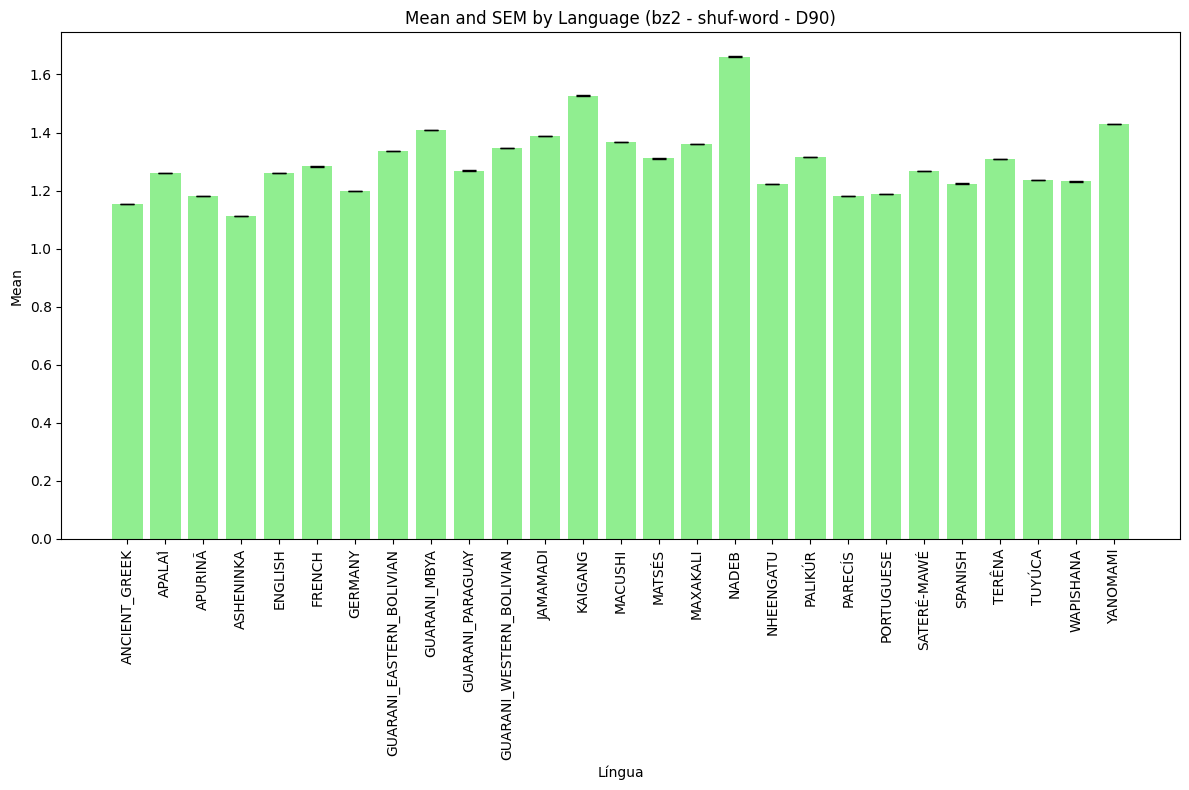

Plotting bz2 - shuf-word para Dall


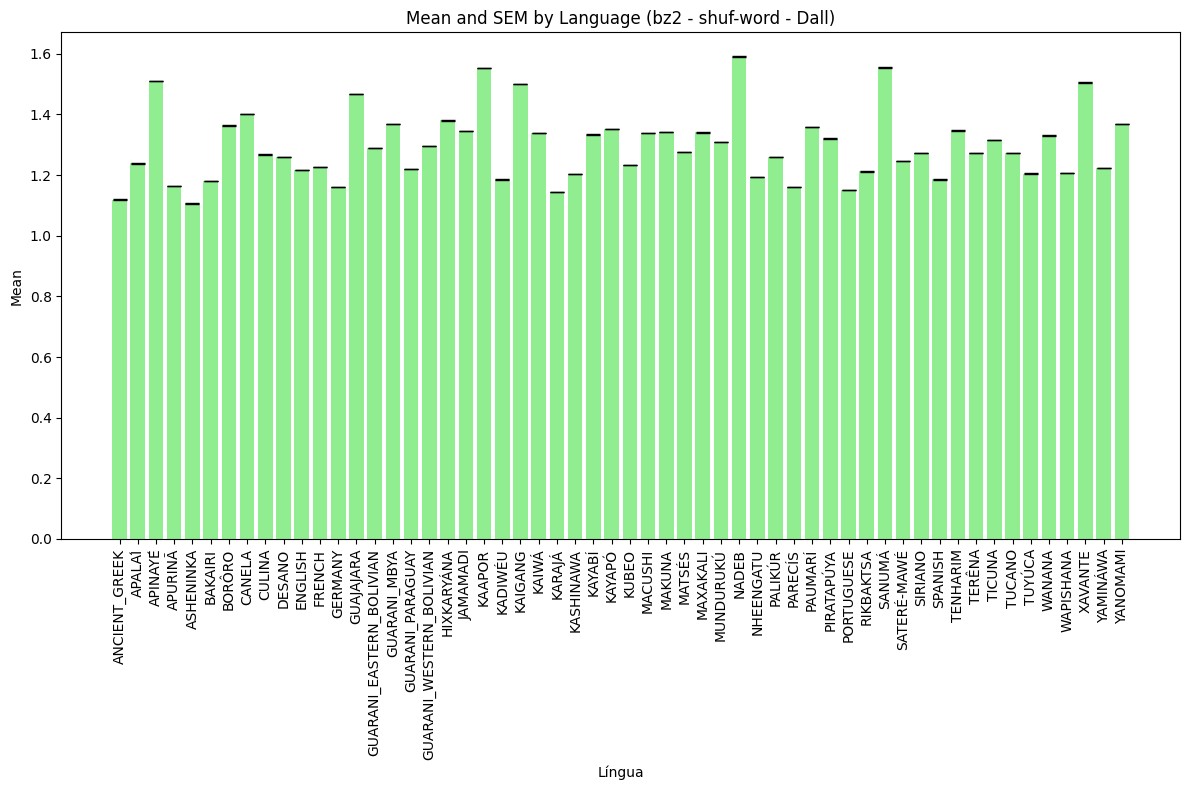

Plotting bz2 - rep-words para D90


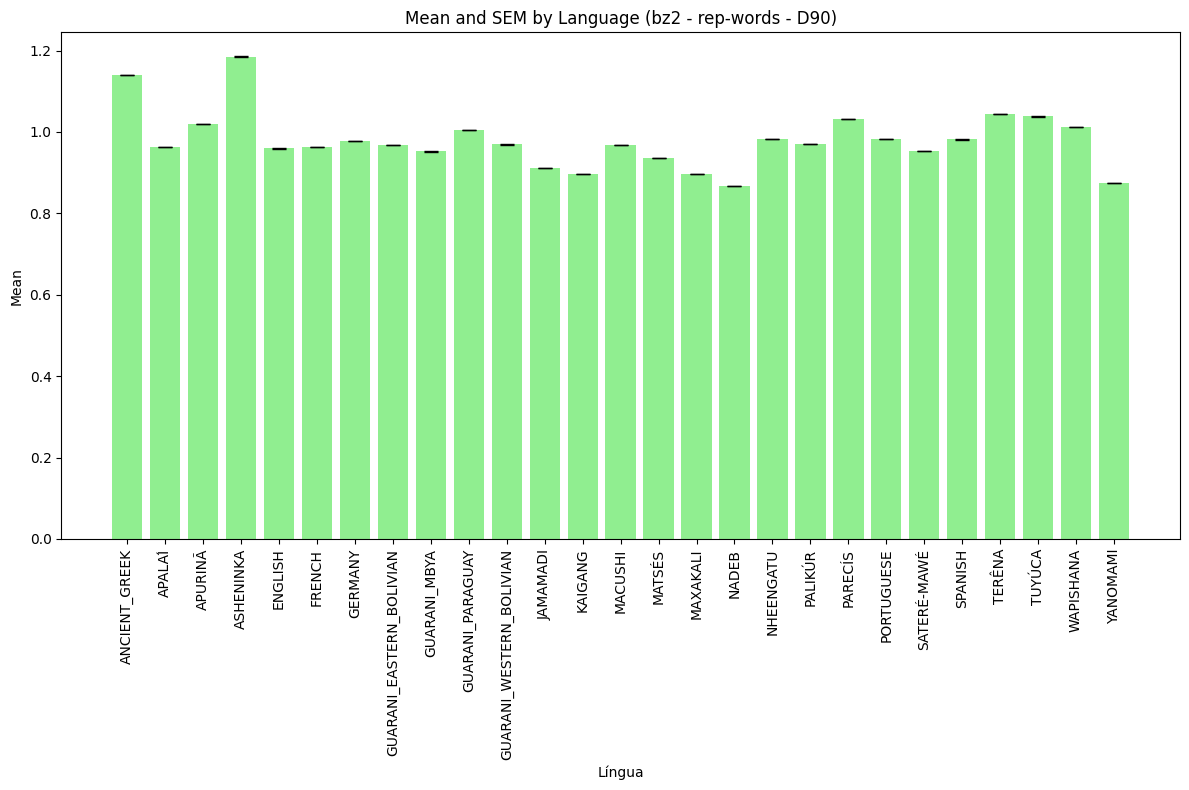

Plotting bz2 - rep-words para Dall


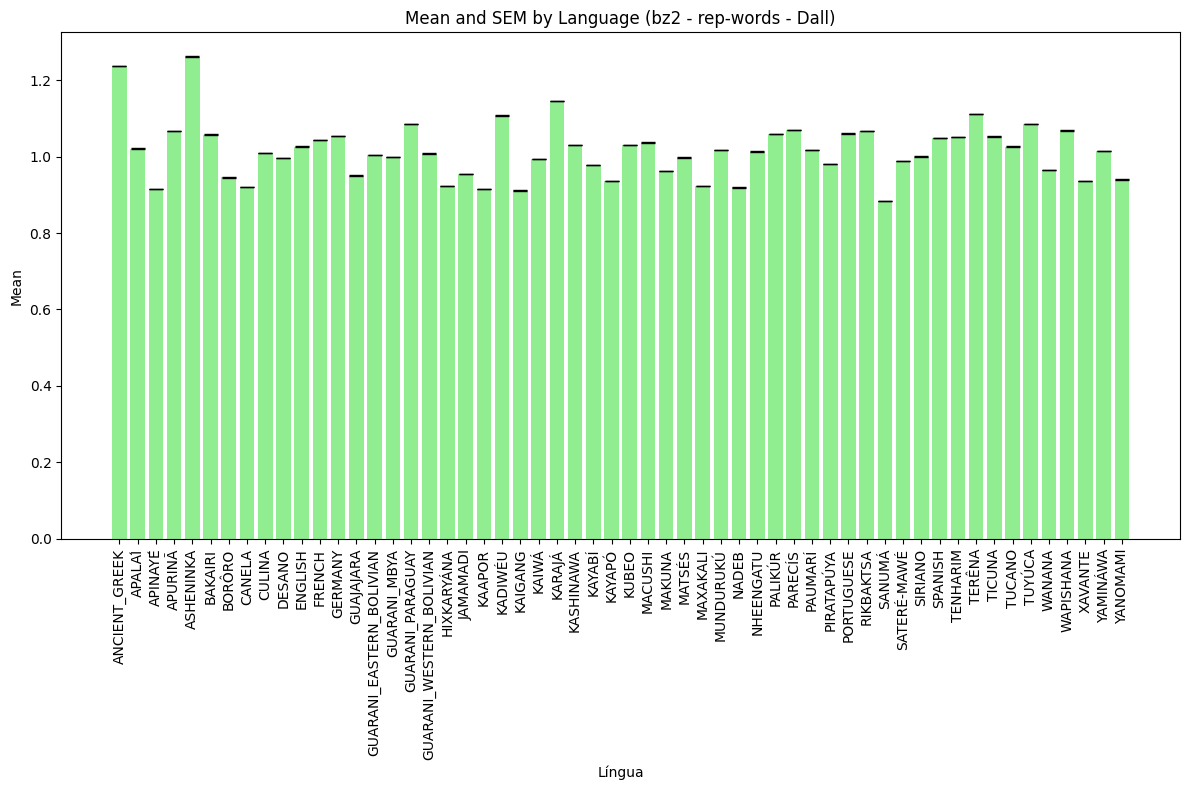

Plotting bz2 - do-nothing para D90


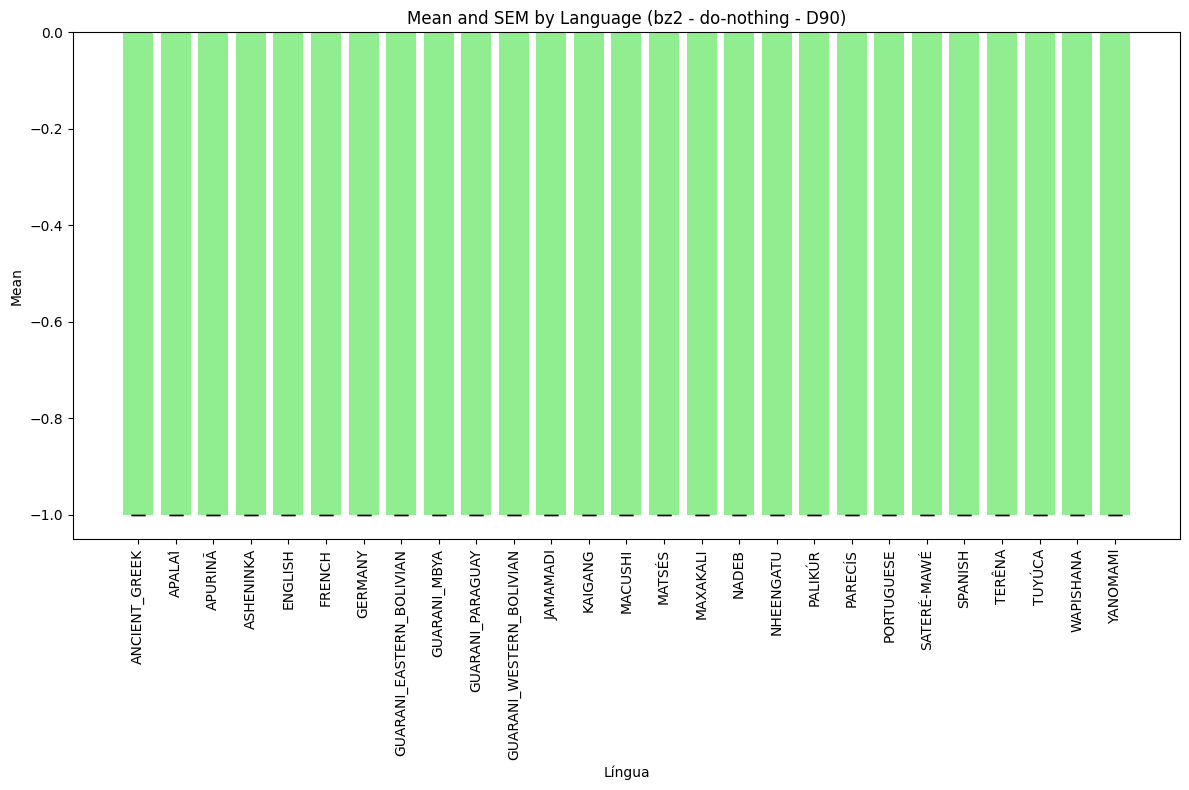

Plotting bz2 - do-nothing para Dall


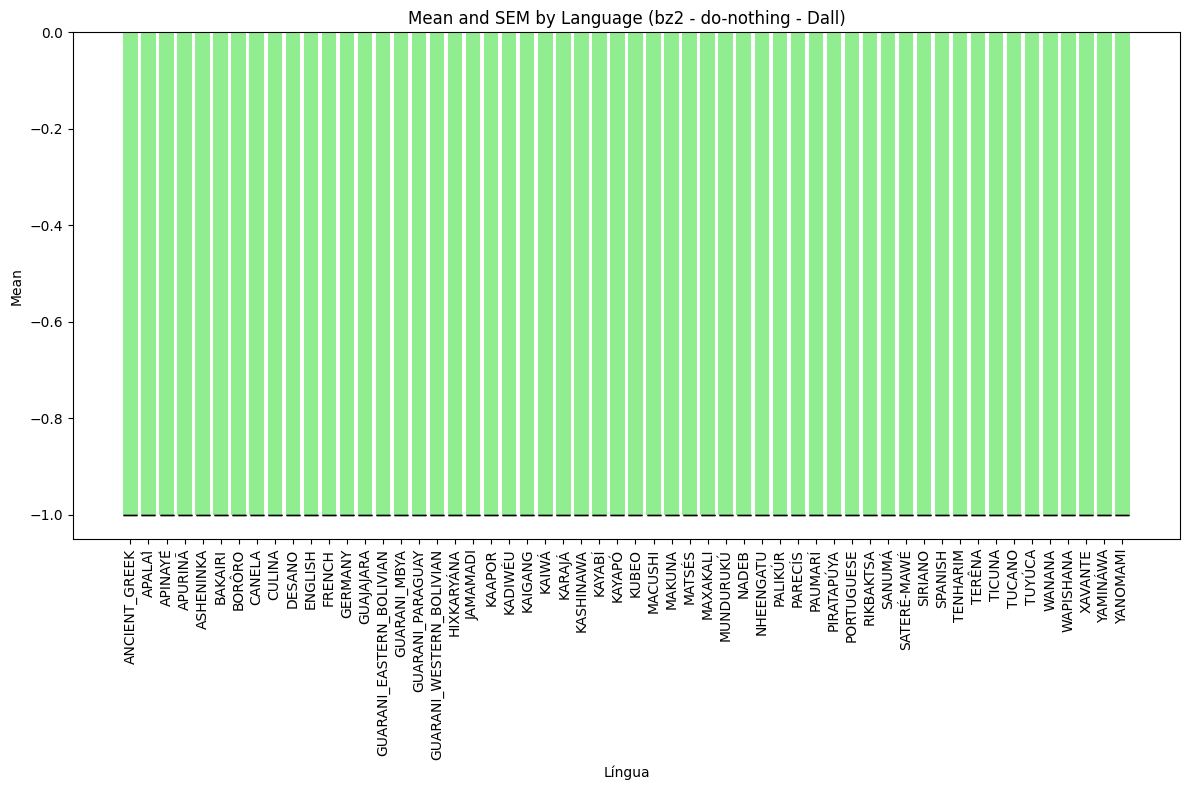

Plotting none - del-verses para D90


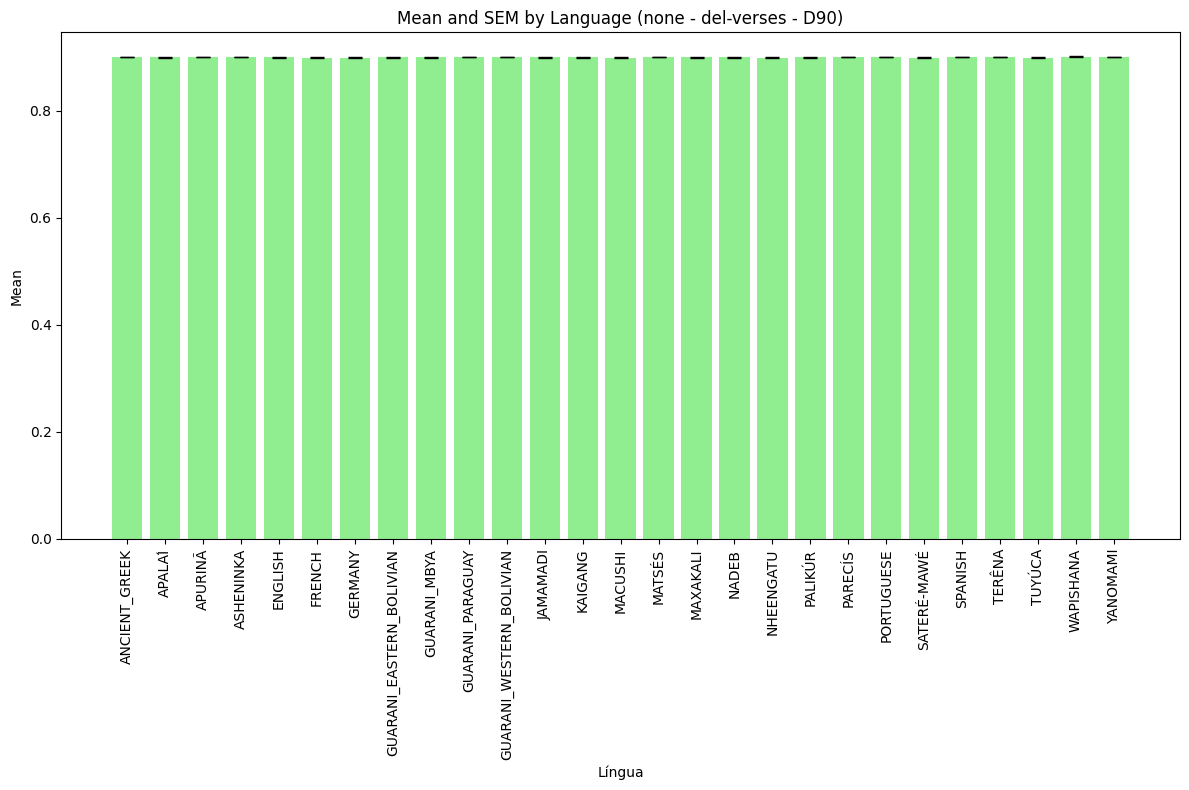

Plotting none - del-verses para Dall


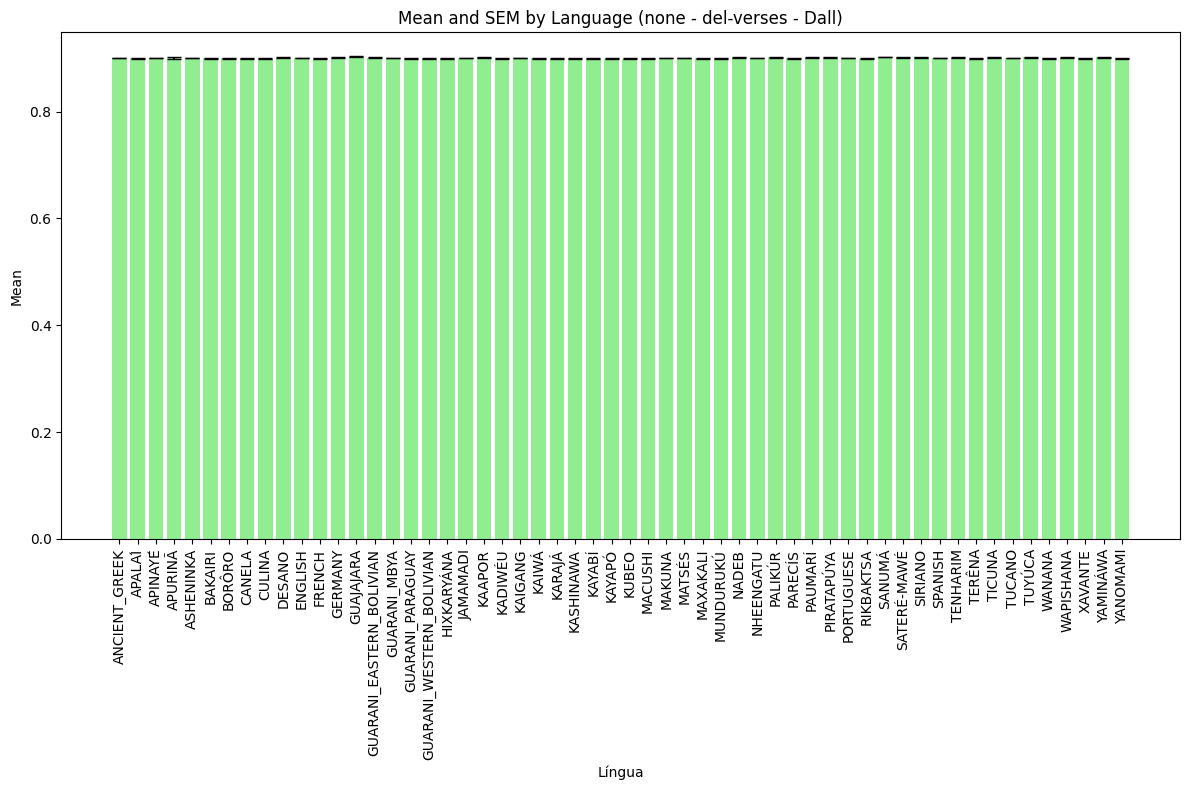

Plotting none - del-words para D90


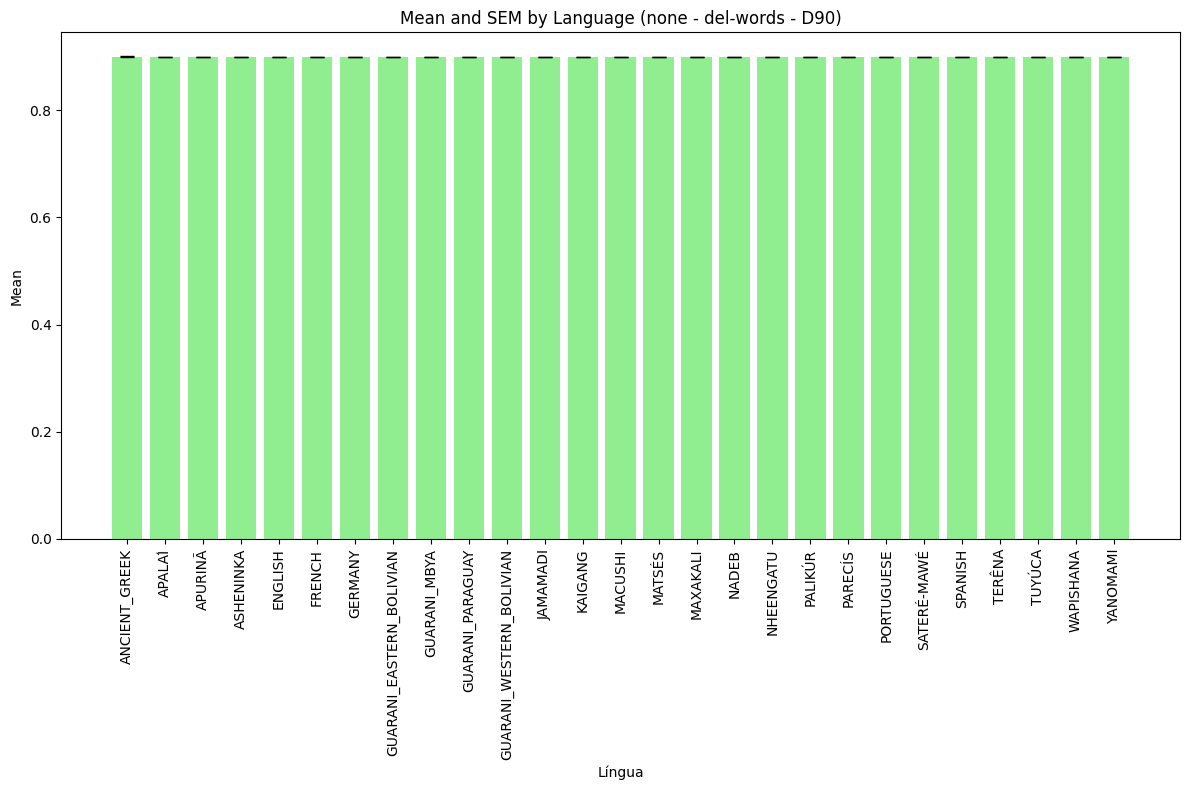

Plotting none - del-words para Dall


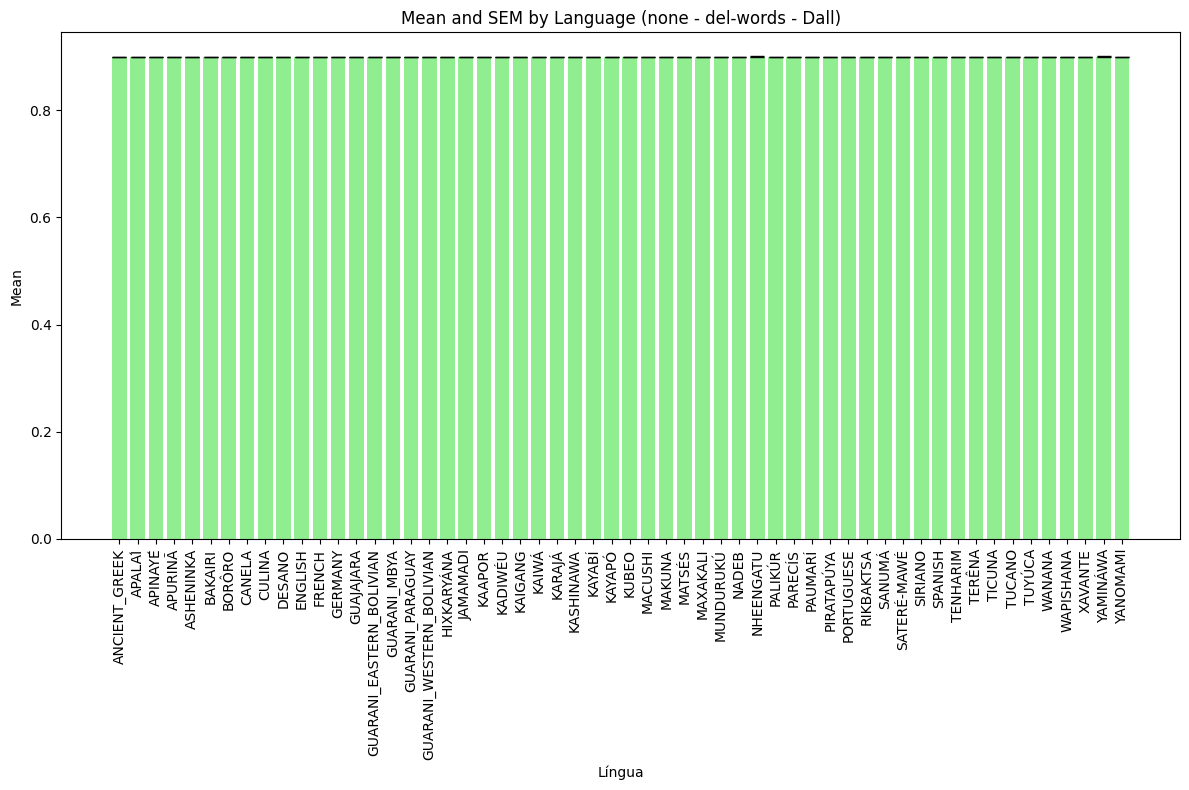

Plotting none - del-chars para D90


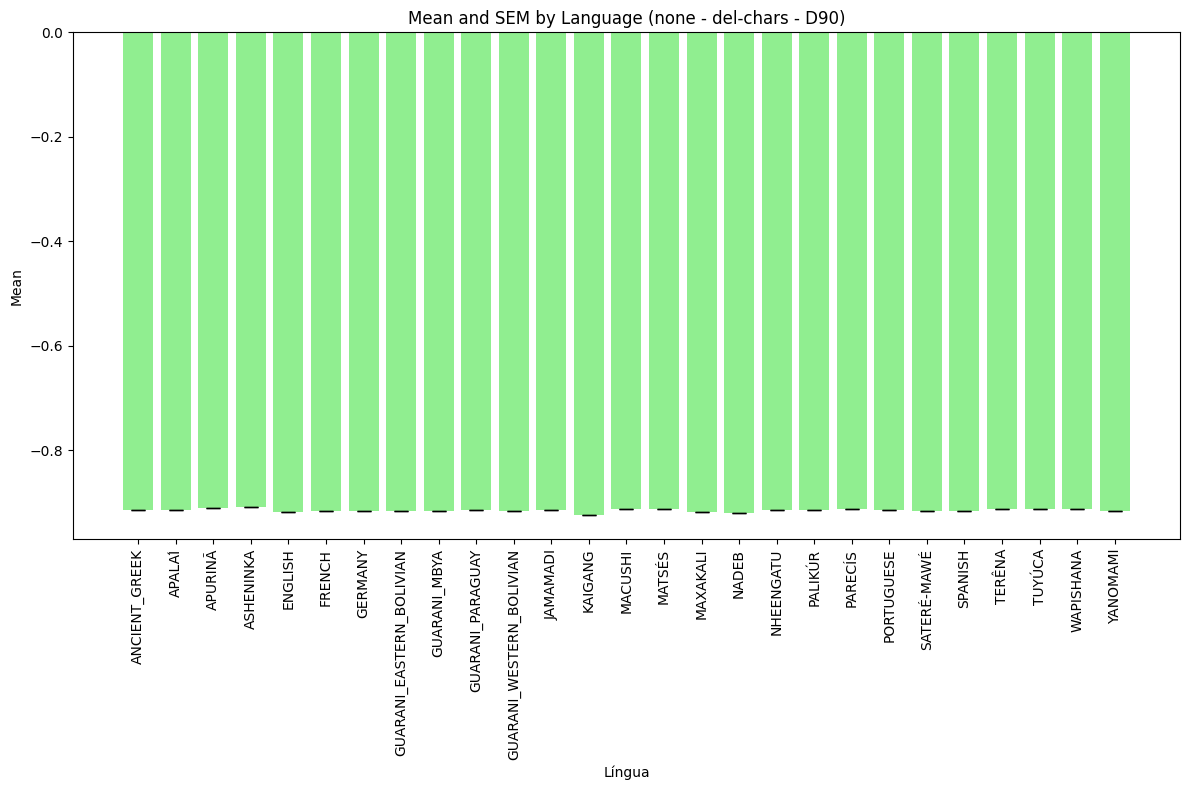

Plotting none - del-chars para Dall


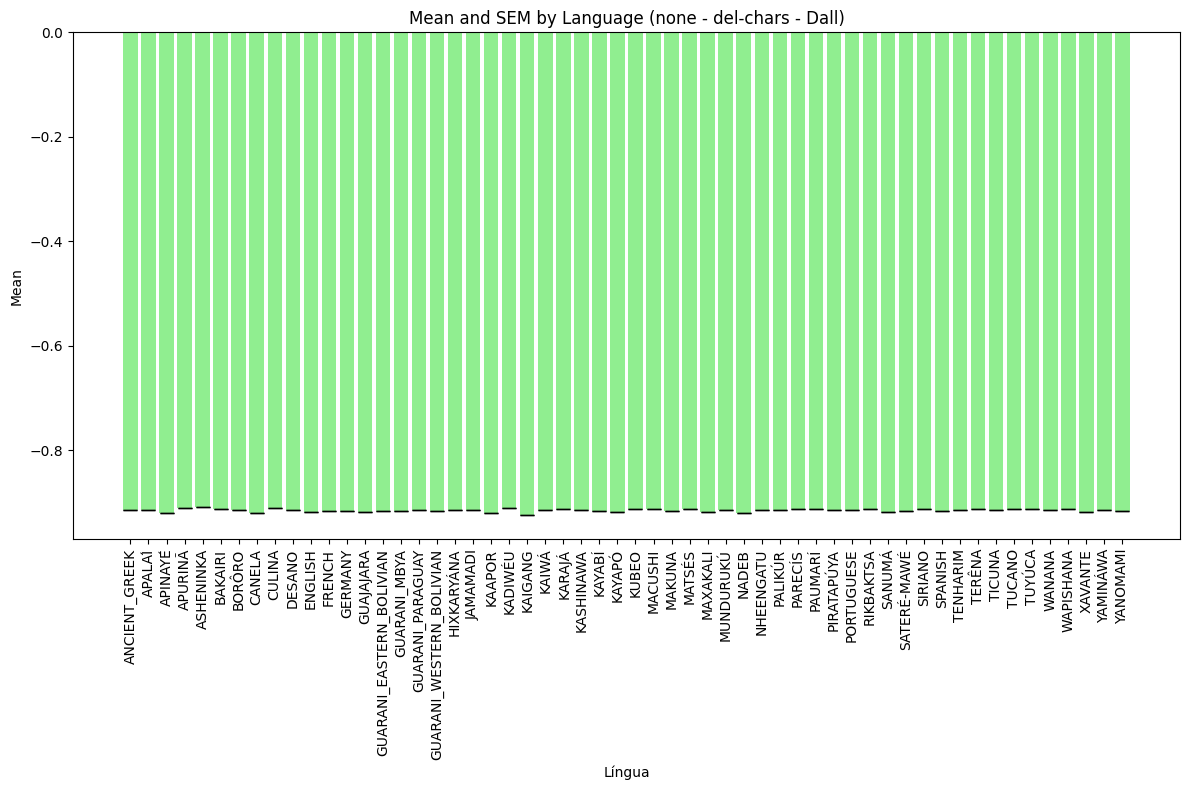

Plotting none - delUni-chars para D90


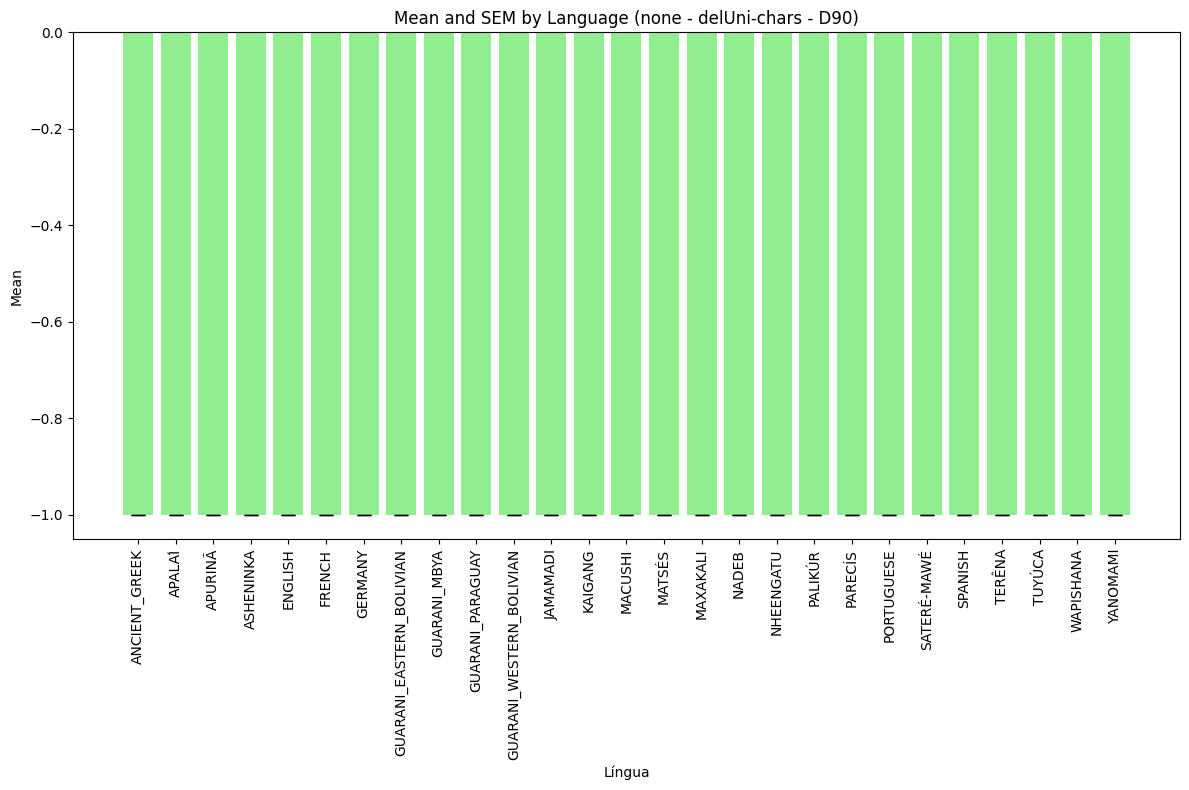

Plotting none - delUni-chars para Dall


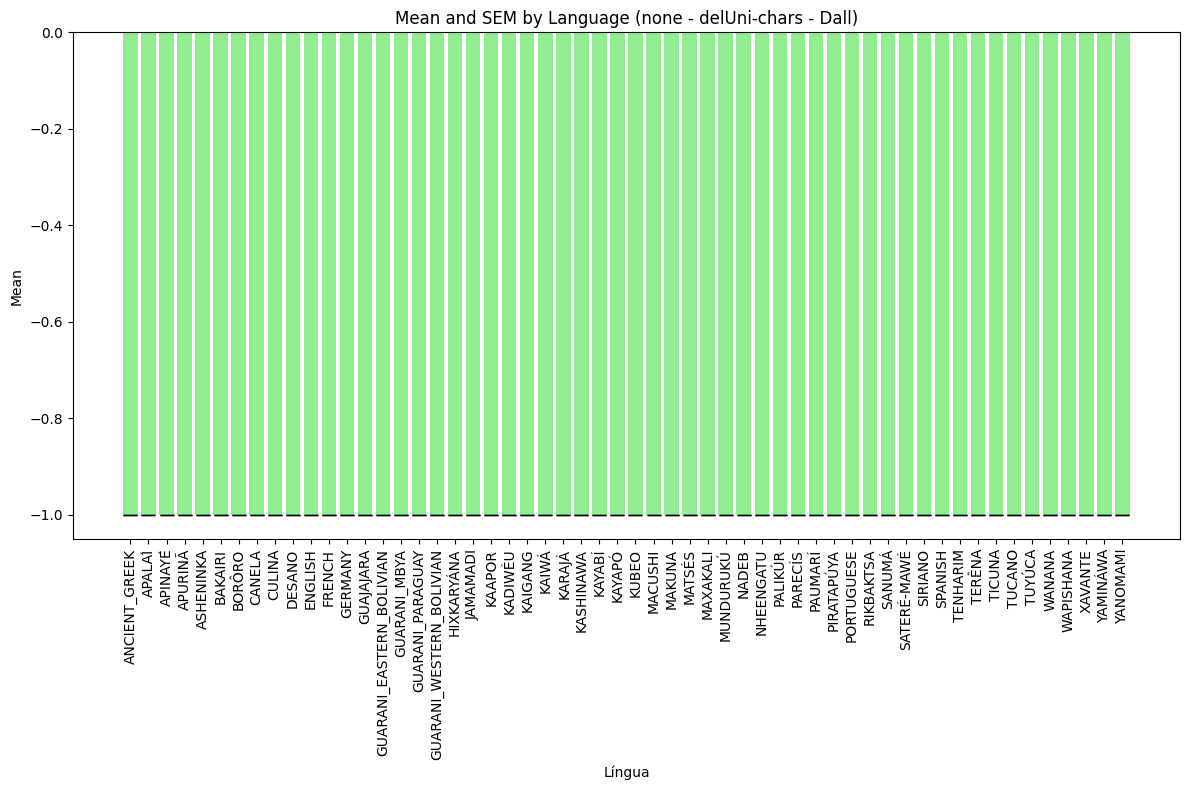

Plotting none - delUni-words para D90


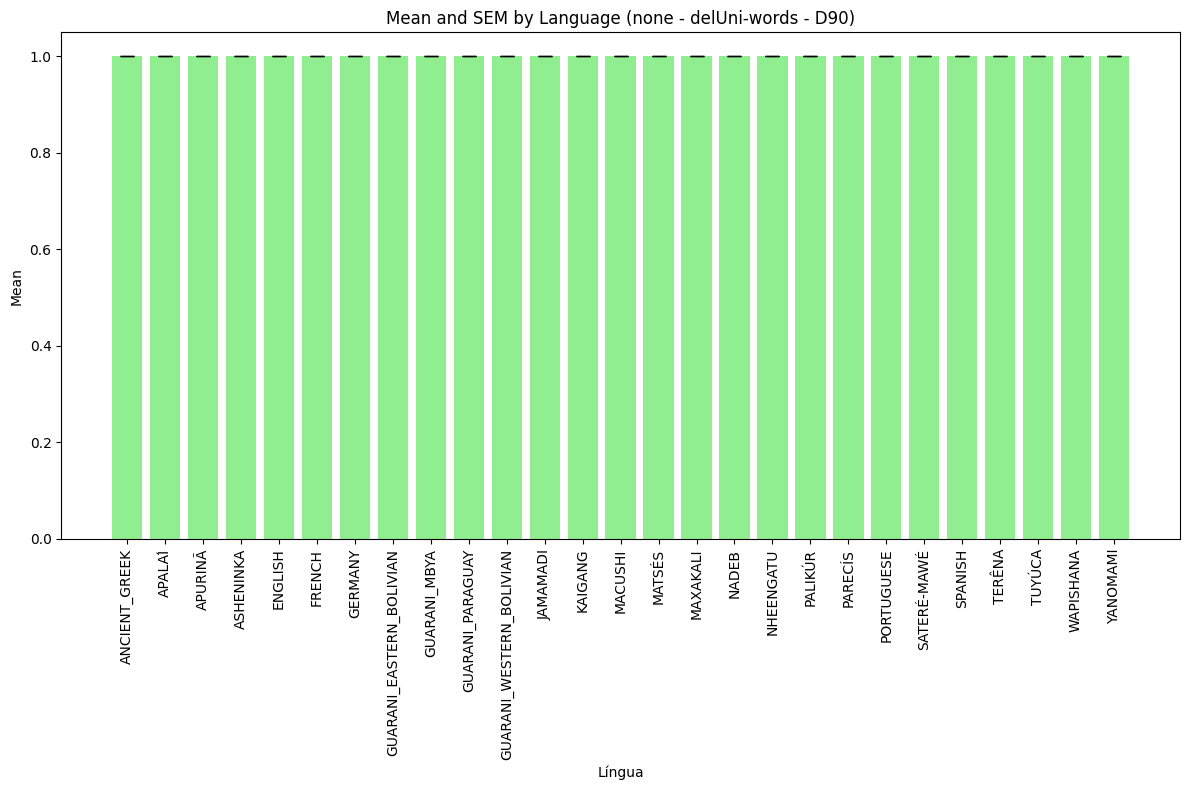

Plotting none - delUni-words para Dall


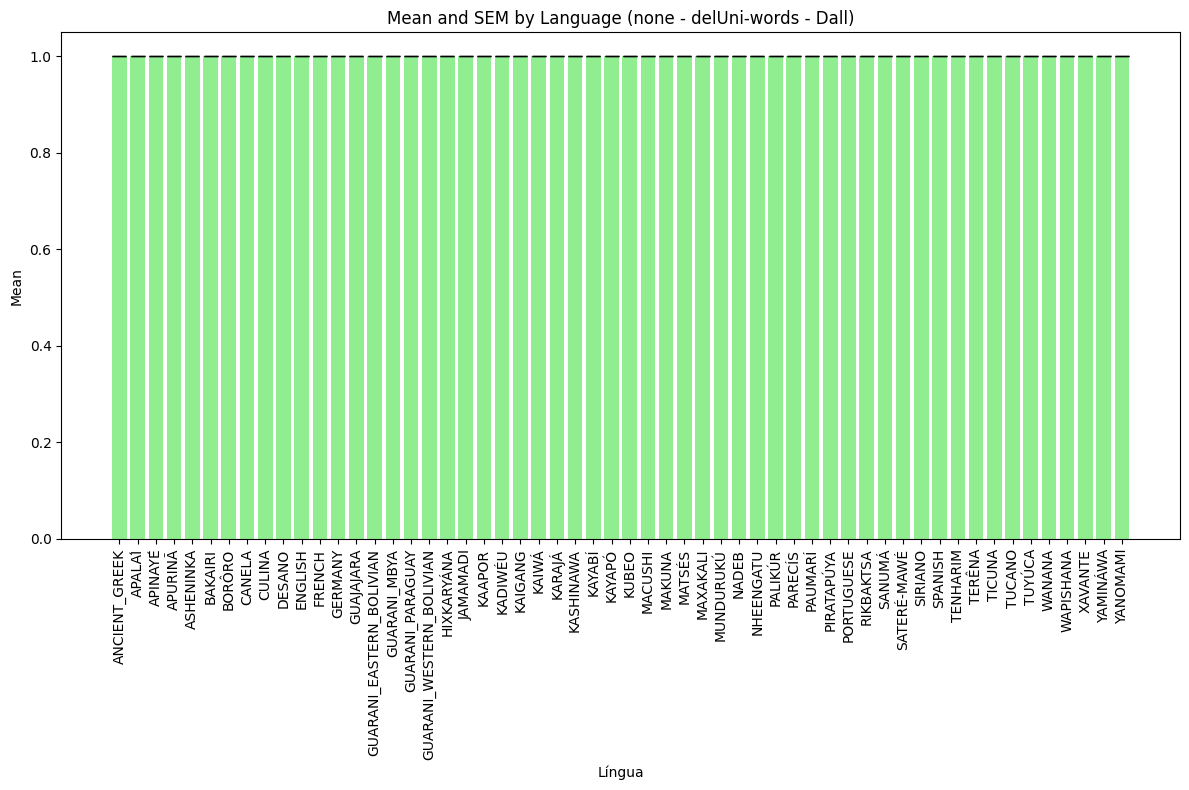

Plotting none - shuf-word para D90


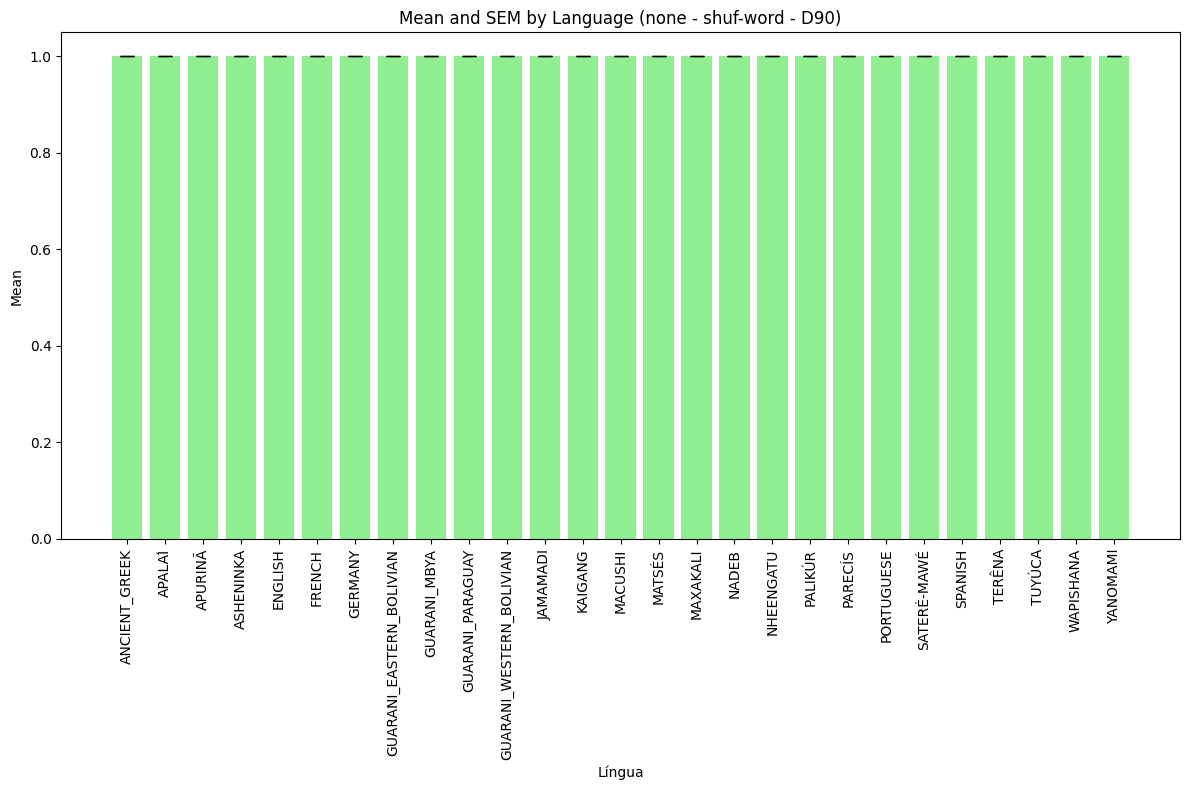

Plotting none - shuf-word para Dall


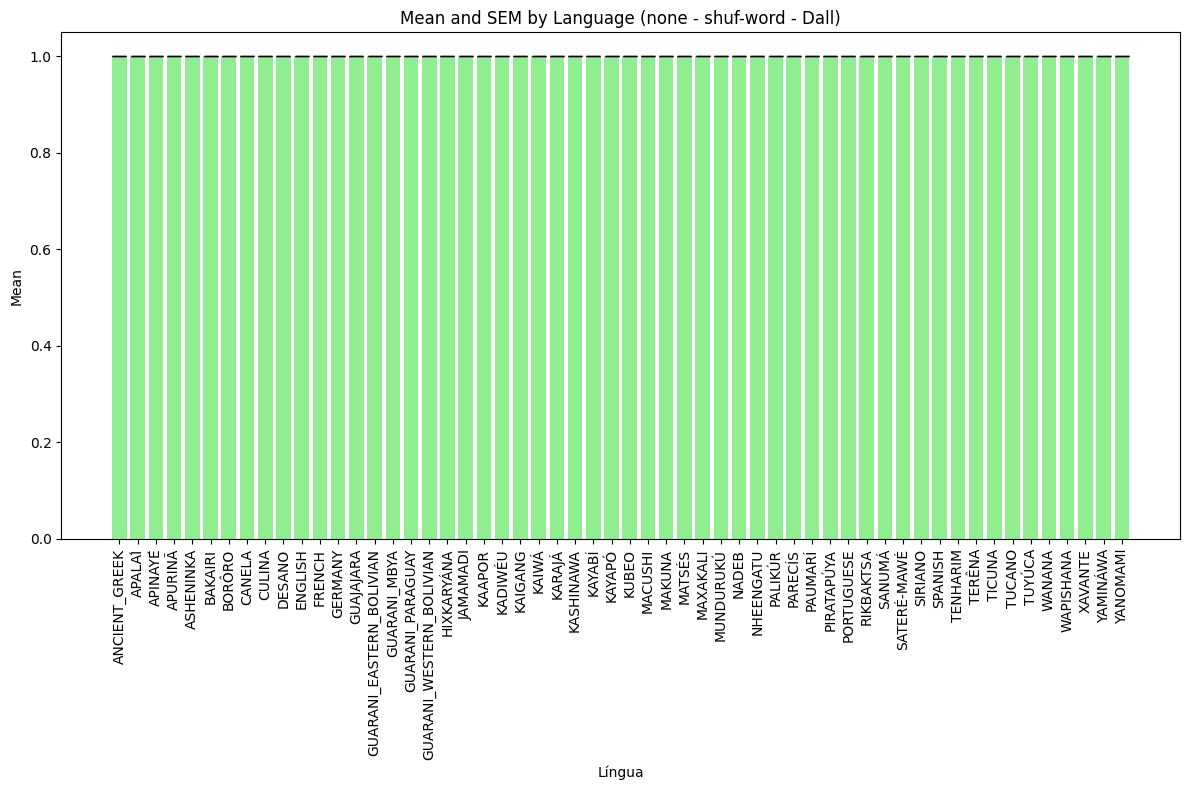

Plotting none - rep-words para D90


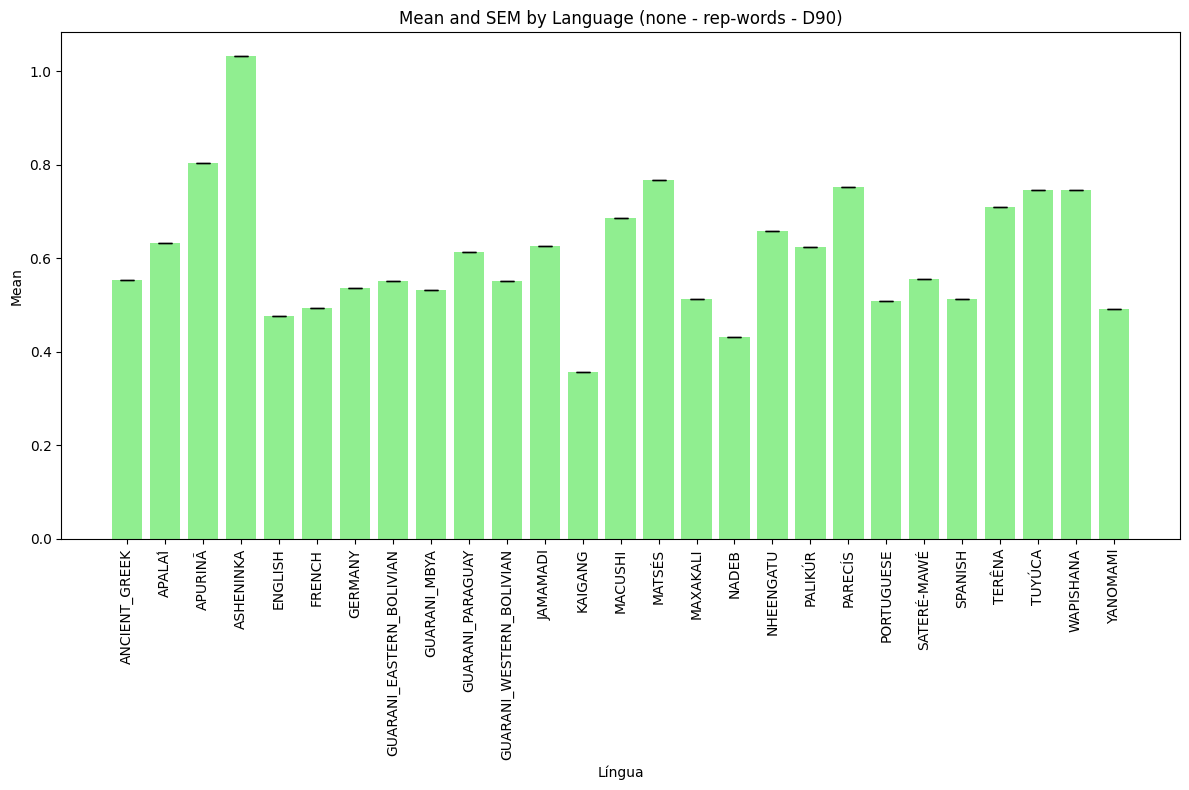

Plotting none - rep-words para Dall


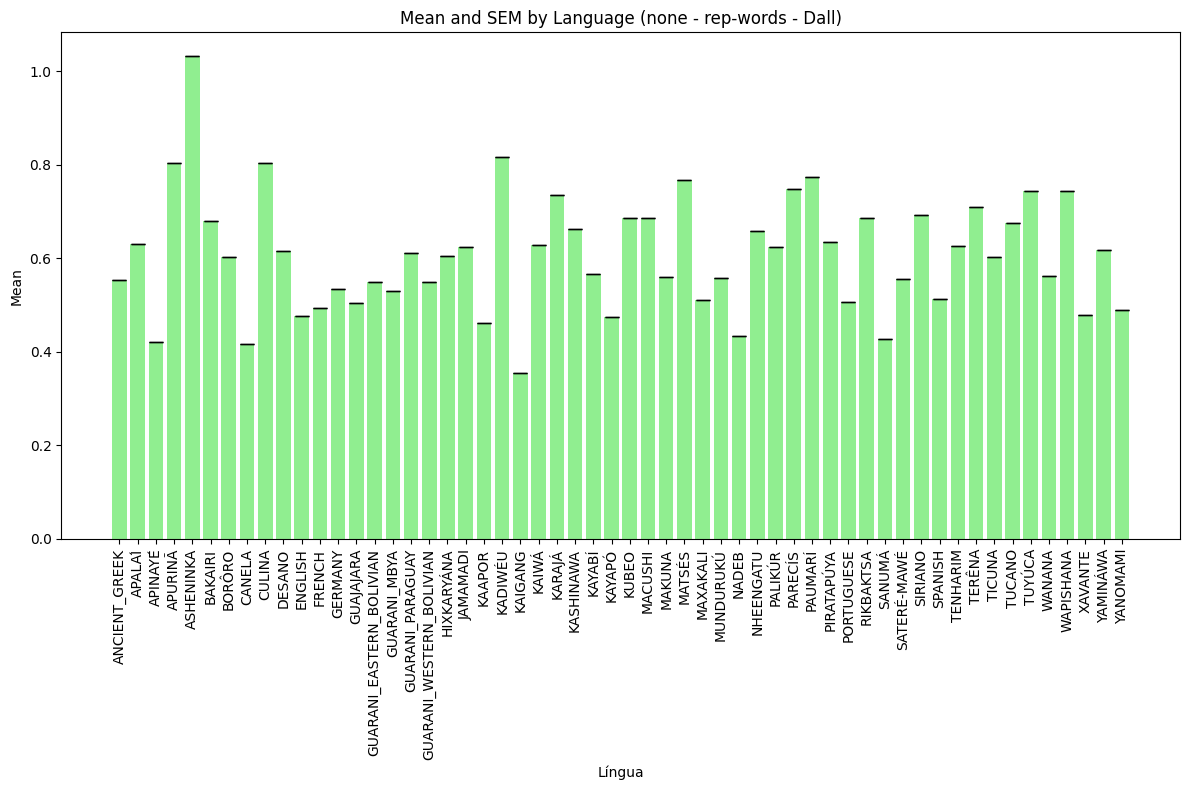

Plotting none - do-nothing para D90


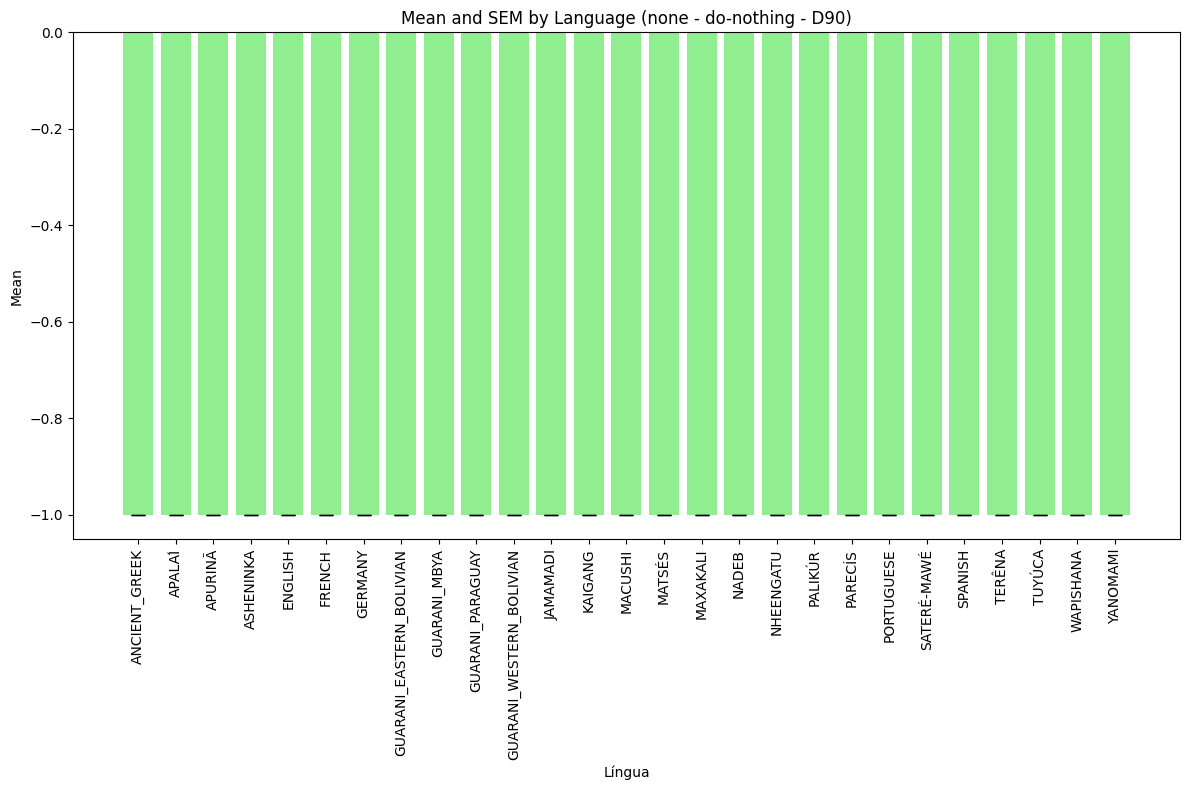

Plotting none - do-nothing para Dall


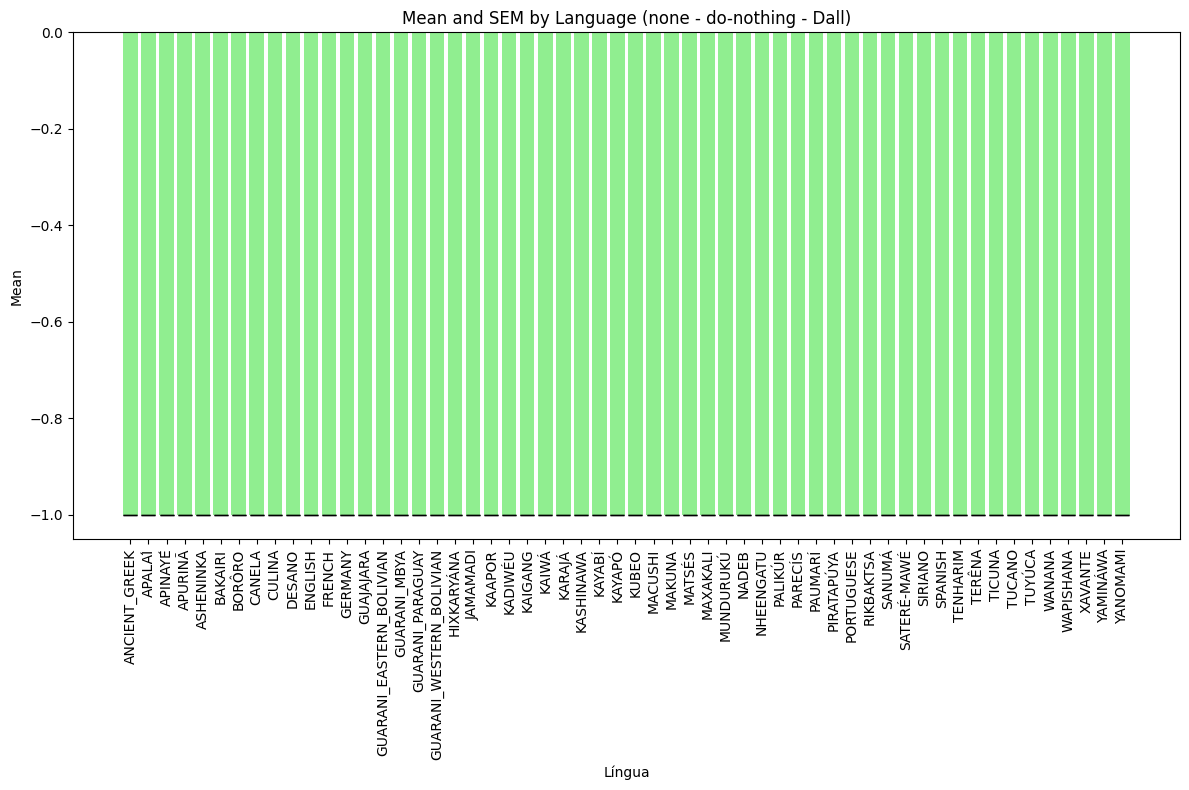

In [22]:
def plot_bar_with_error(sem_stats, algo, metric, data_label, pdf, mean_stats):
    df_algo_metric = sem_stats[(sem_stats['algorithm'] == algo) & (sem_stats['metric'] == metric)]
    df_filter = mean_stats[(mean_stats['algorithm'] == algo) & (mean_stats['metric'] == metric)]
    
    plt.figure(figsize=(12, 8))
    plt.bar(df_algo_metric['language'], df_filter['mean'], color='lightgreen', yerr=df_algo_metric['sem'], capsize=5)
    plt.xticks(rotation=90)
    plt.xlabel('Língua')
    plt.ylabel('Mean')
    plt.title(f'Mean and SEM by Language ({algo} - {metric} - {data_label})')
    plt.tight_layout()
    pdf.savefig() 
    plt.show()
    plt.close()

selected_algorithms = df90['algorithm'].unique()  # Substitua pelos algoritmos desejados
selected_metrics = df90['metric'].unique()  # Substitua pelas métricas desejadas

with PdfPages('../images/h3_bar_with_error.pdf') as pdf:
    for algo in selected_algorithms:
        for metric in selected_metrics:
            print(f"Plotting {algo} - {metric} para D90")
            plot_bar_with_error(sem_90, algo, metric, "D90", pdf, mean_90)
            
            print(f"Plotting {algo} - {metric} para Dall")
            plot_bar_with_error(sem_all, algo, metric, "Dall", pdf, mean_all)

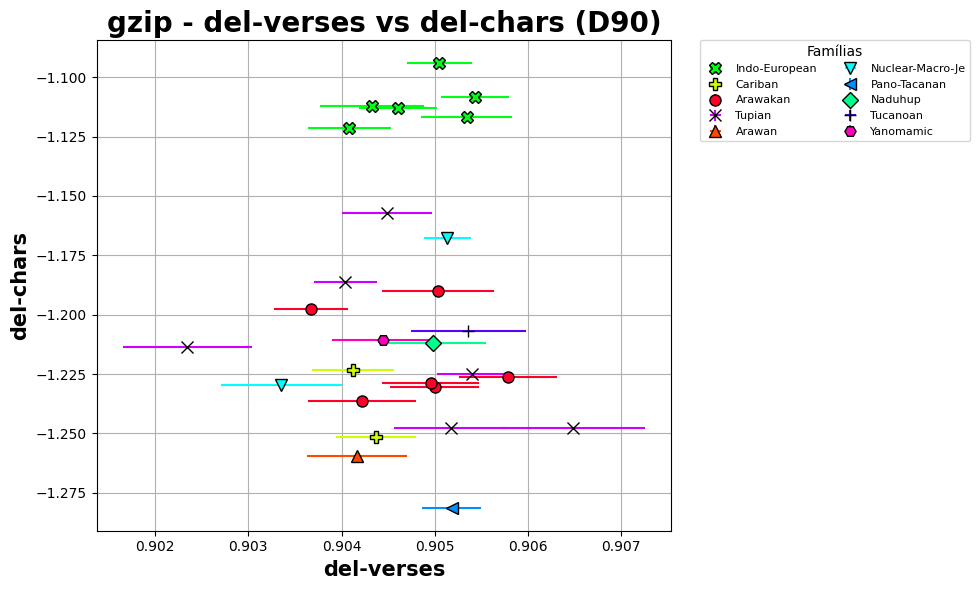

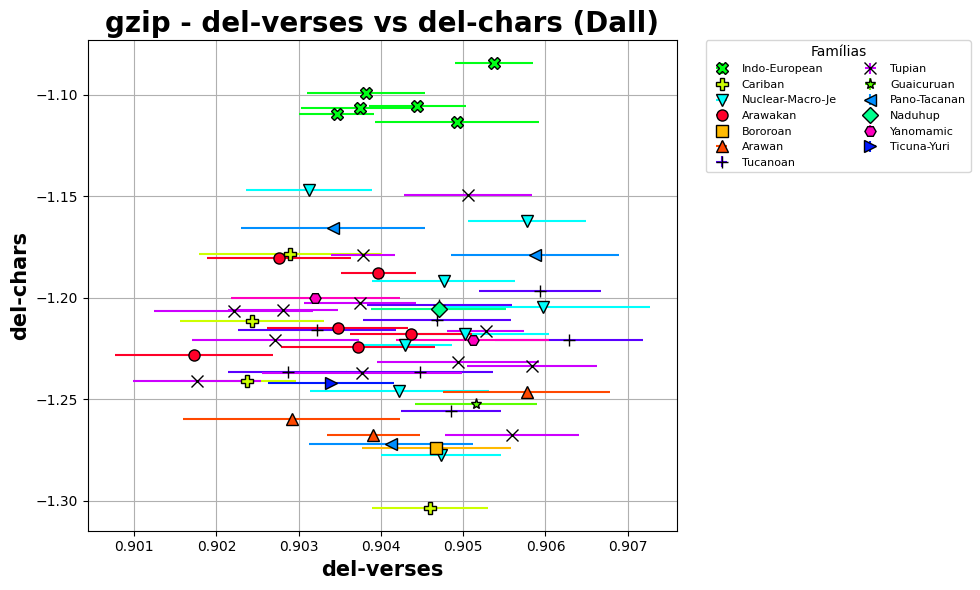

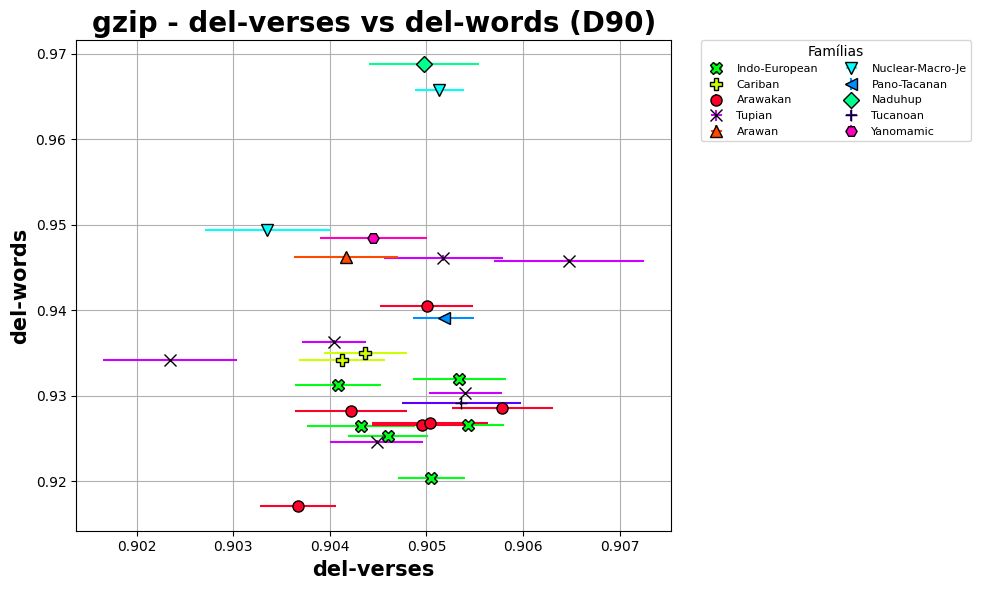

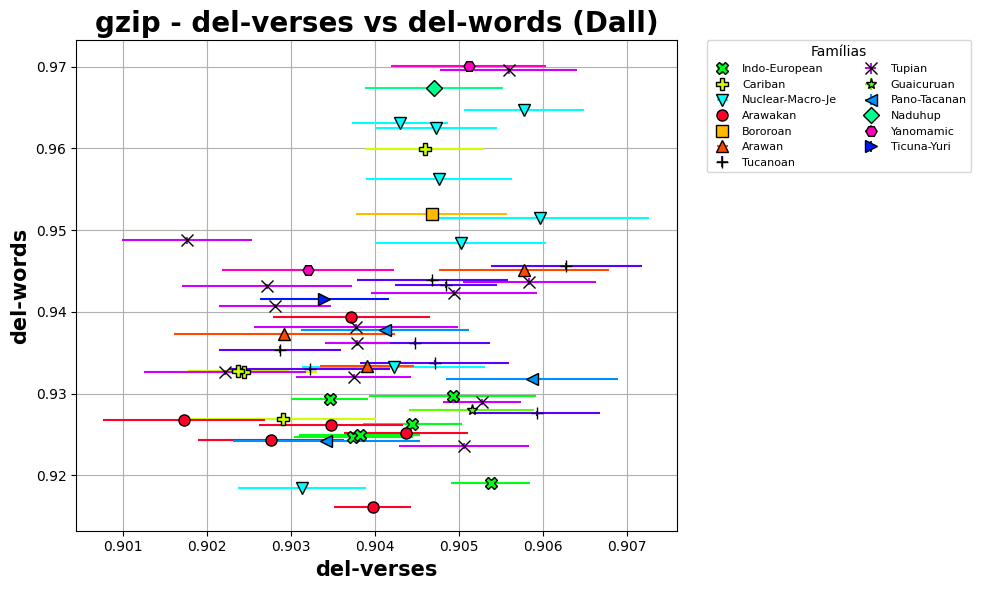

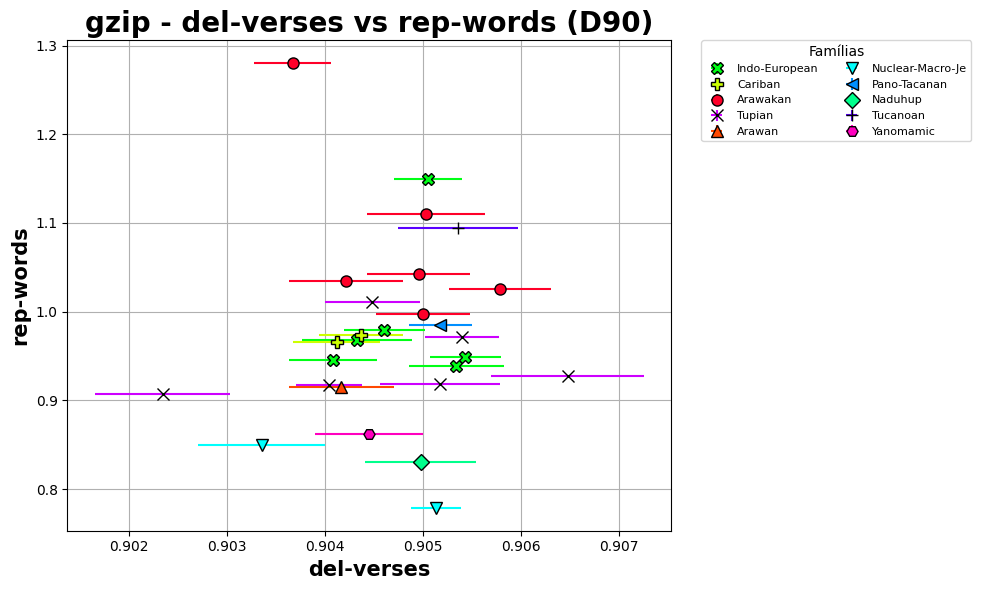

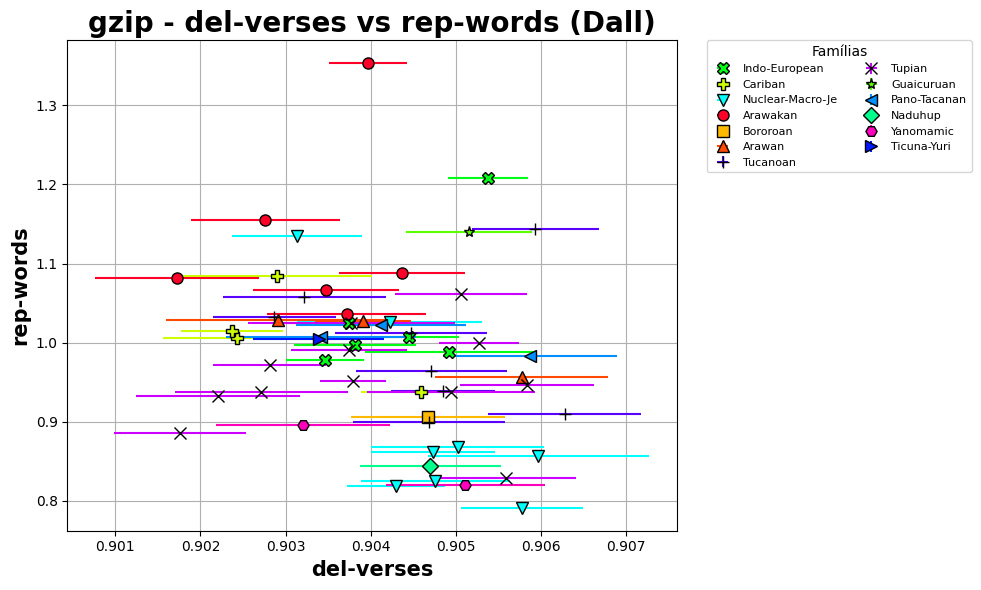

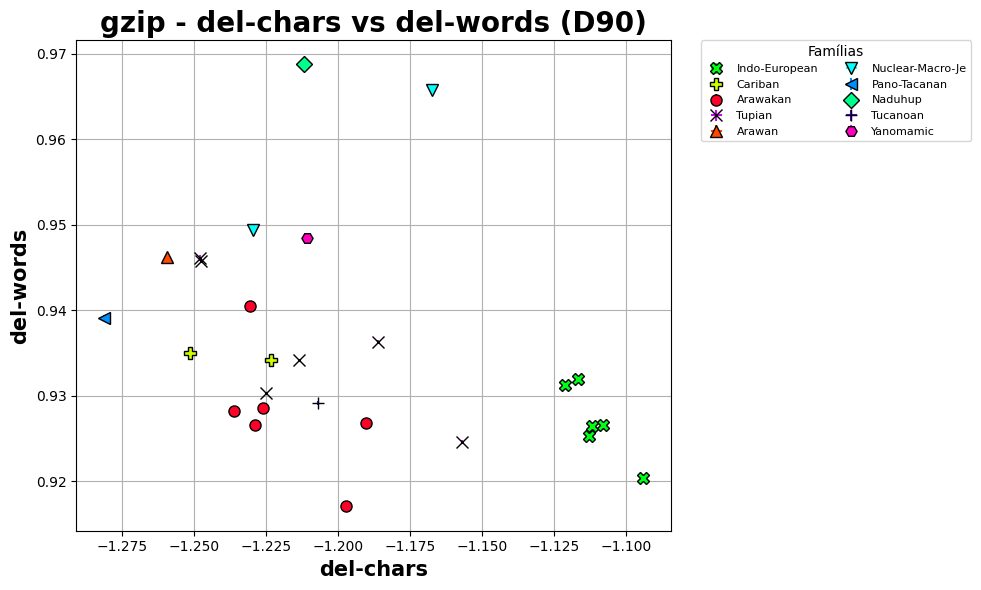

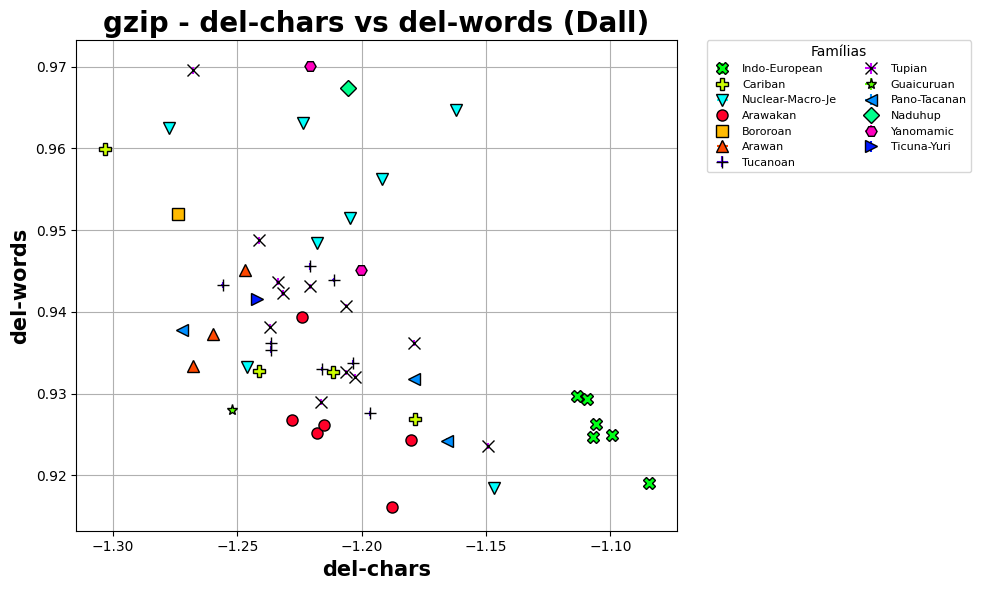

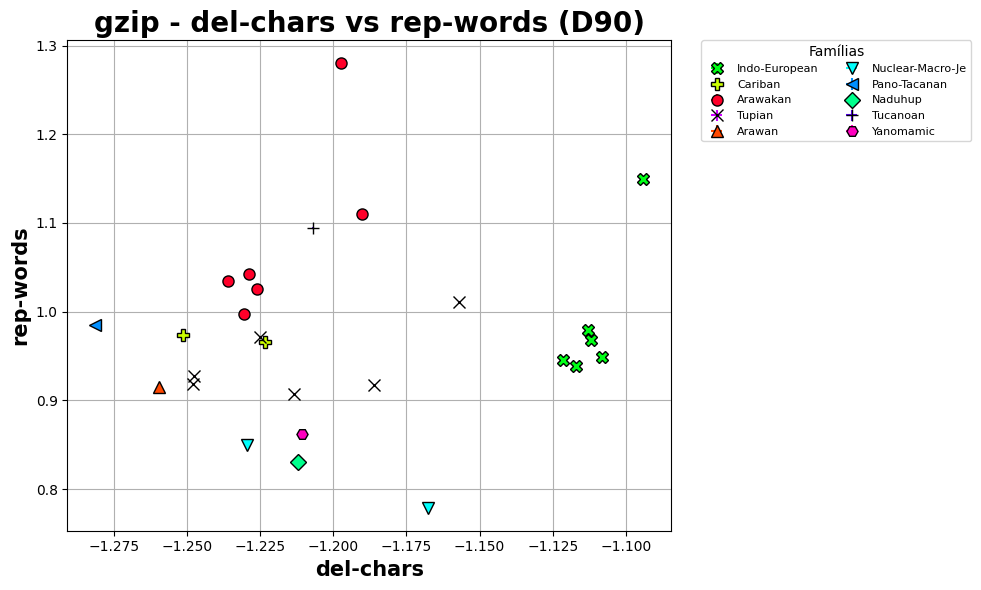

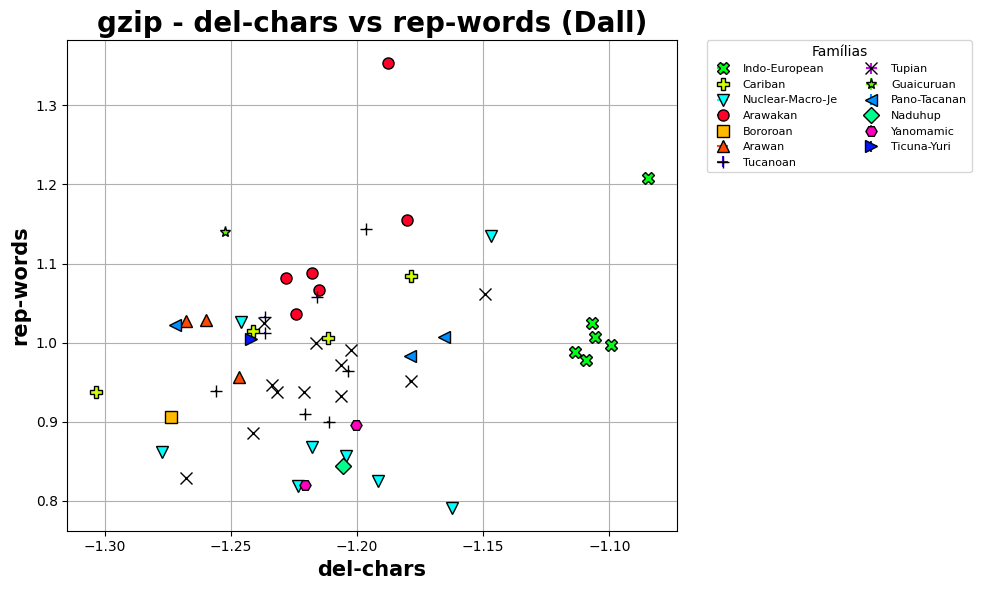

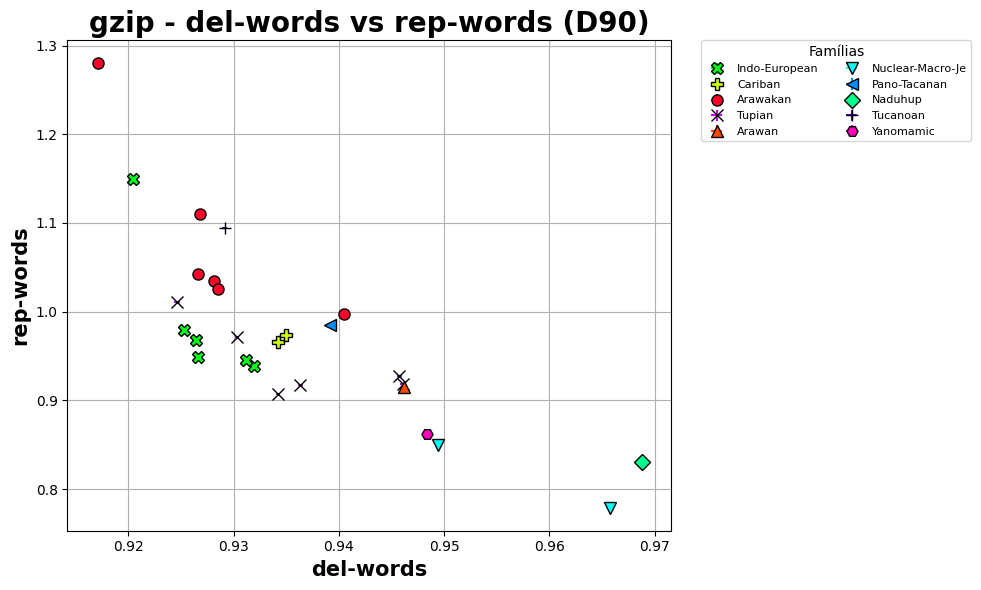

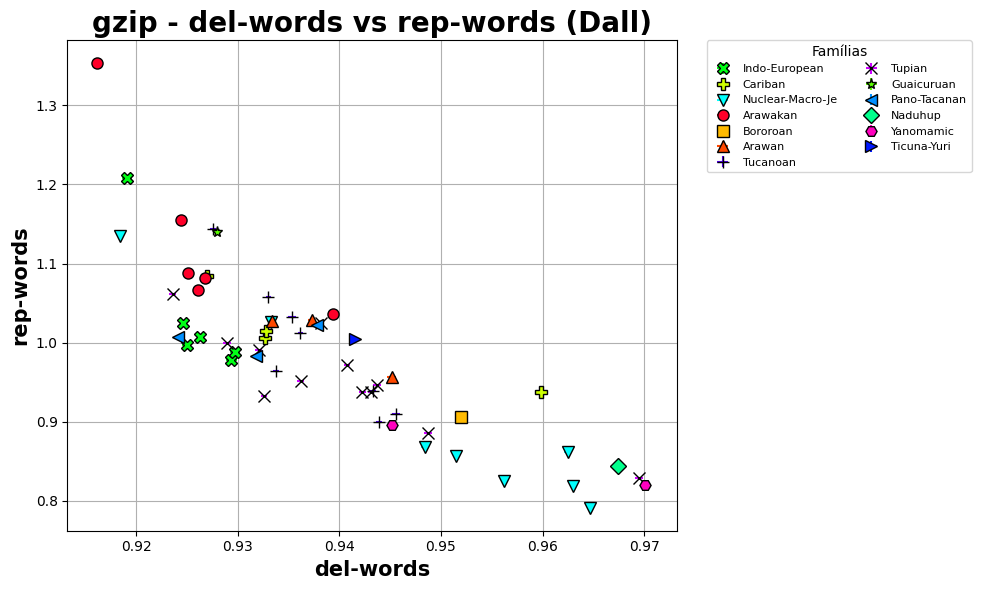

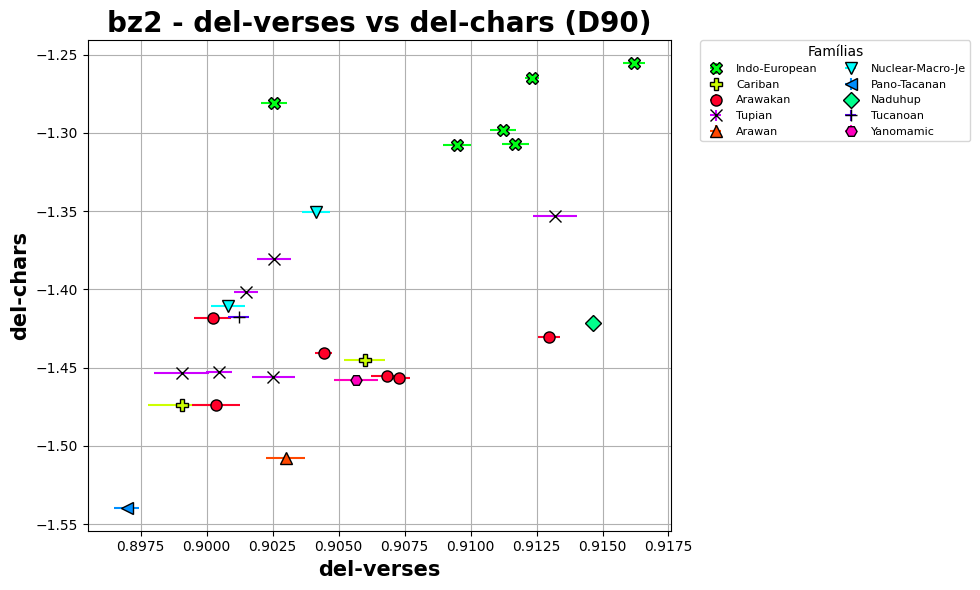

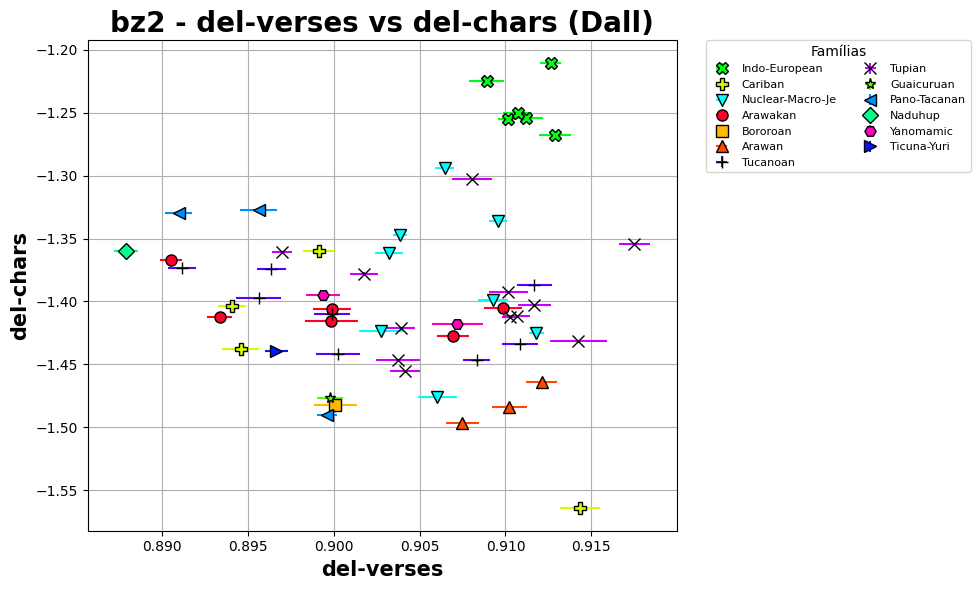

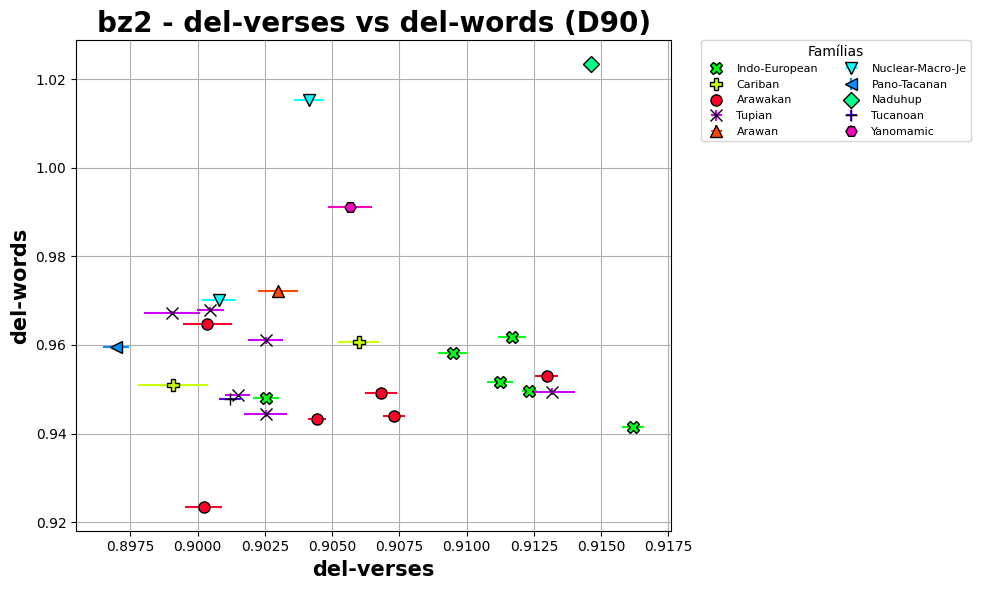

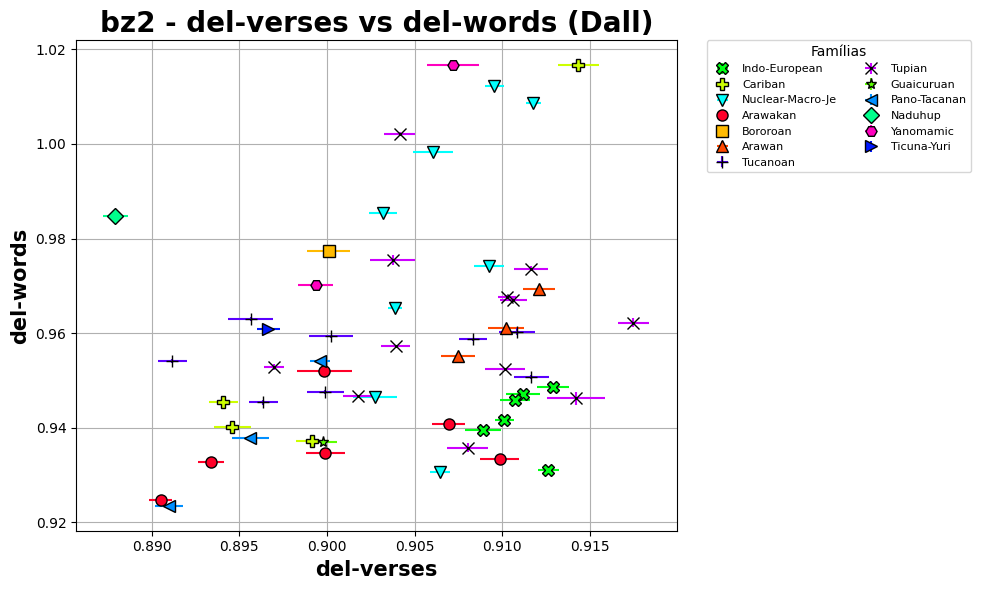

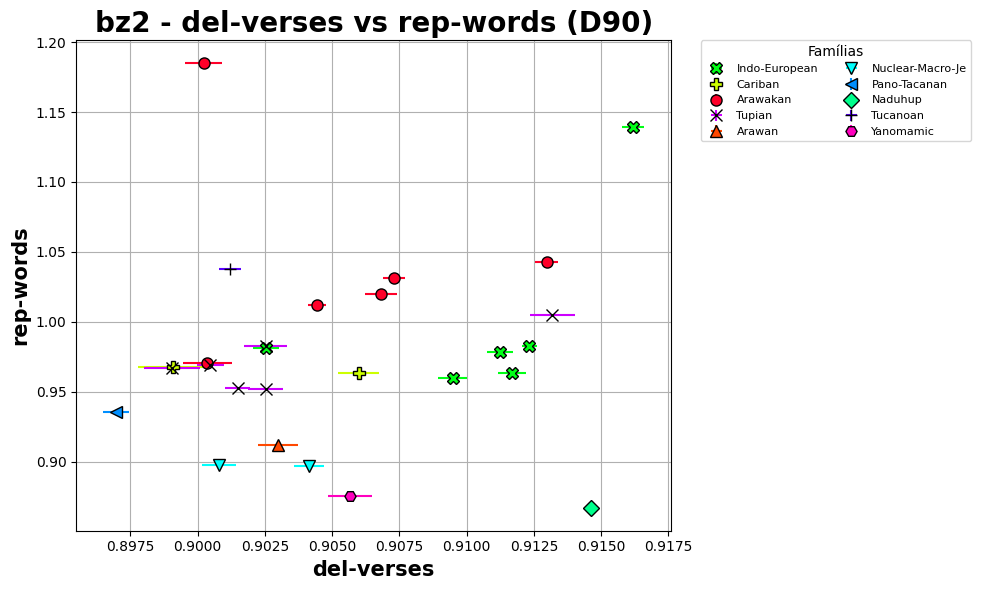

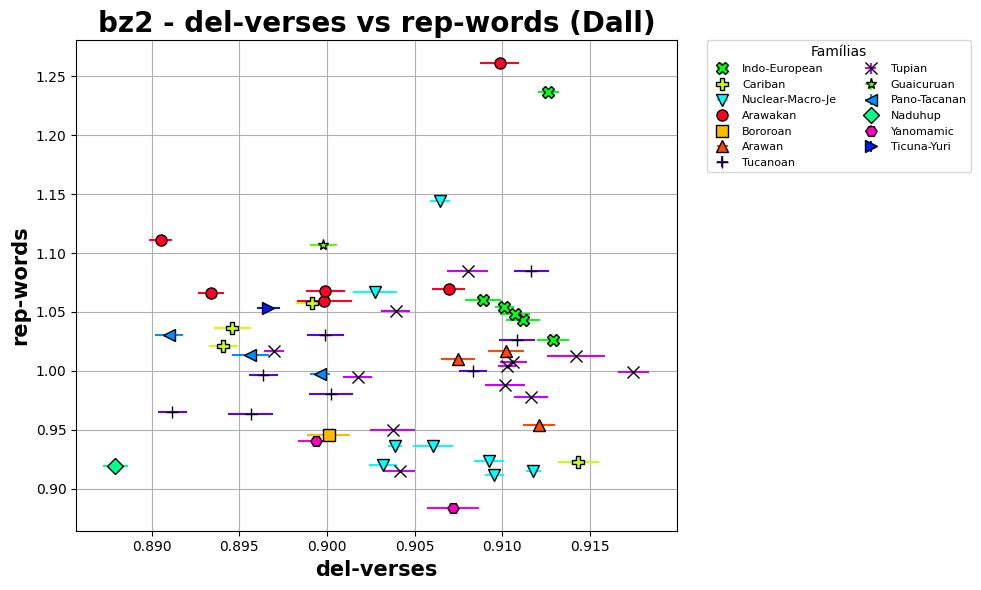

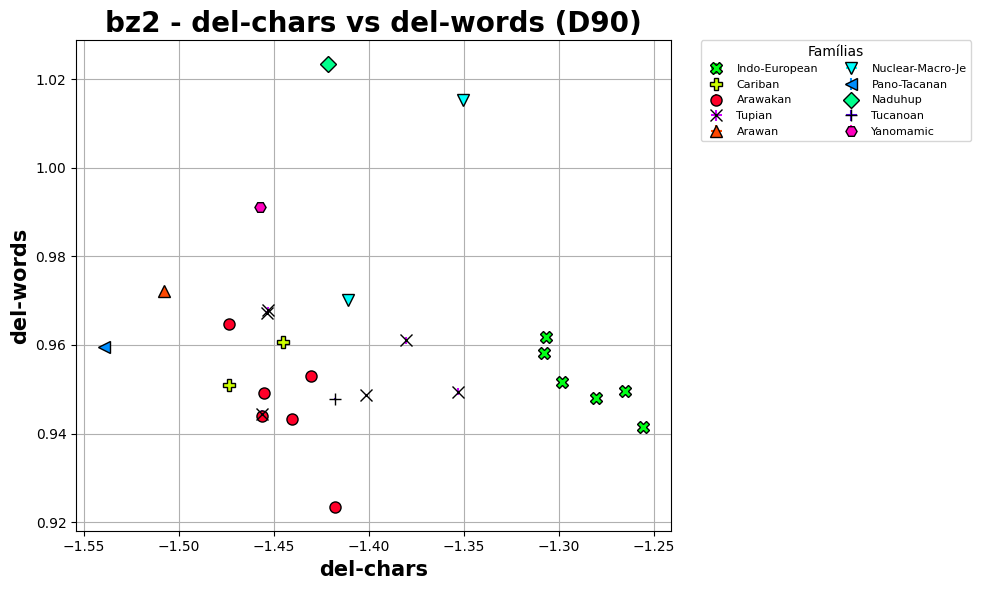

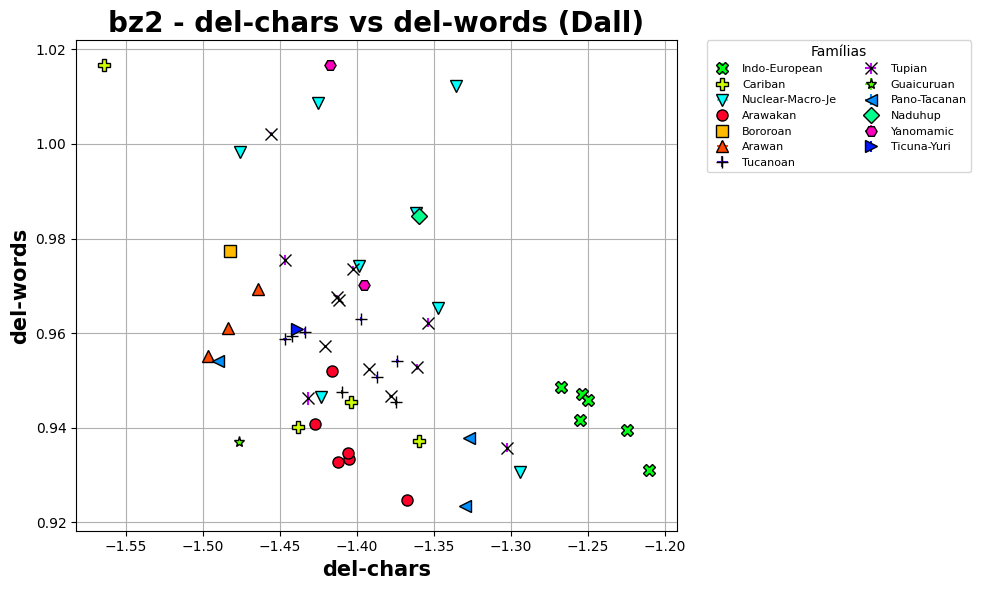

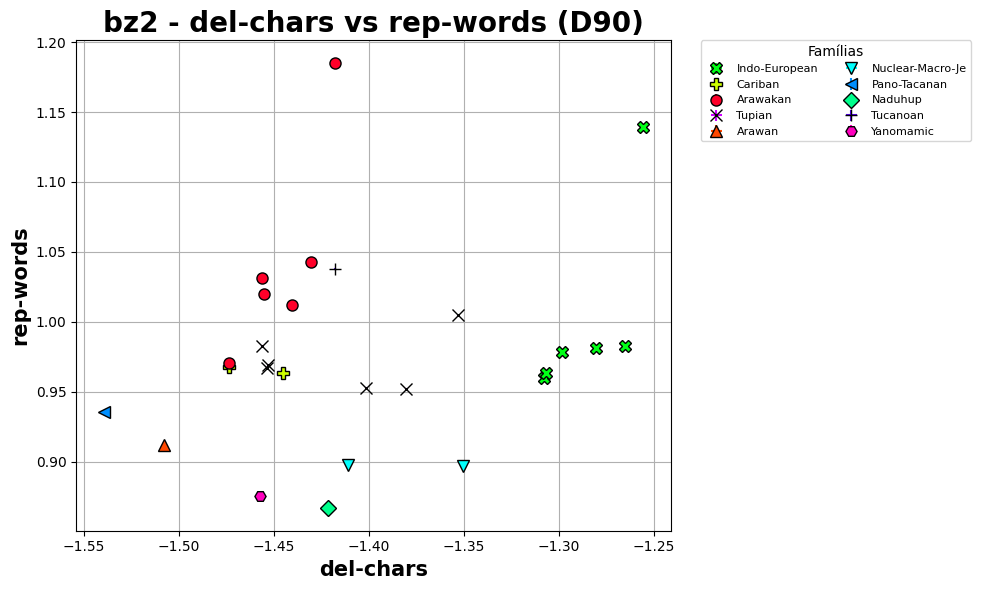

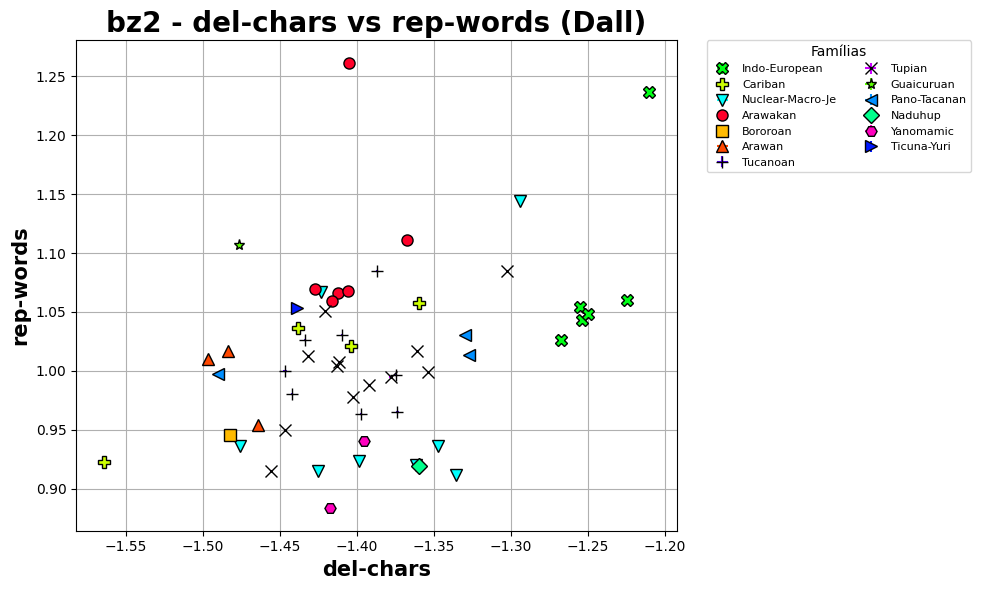

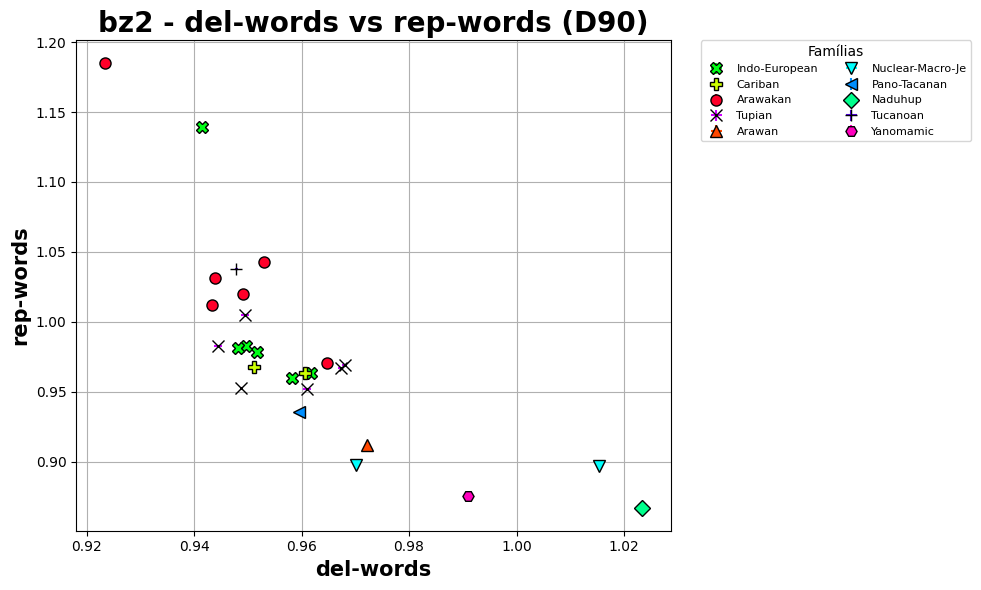

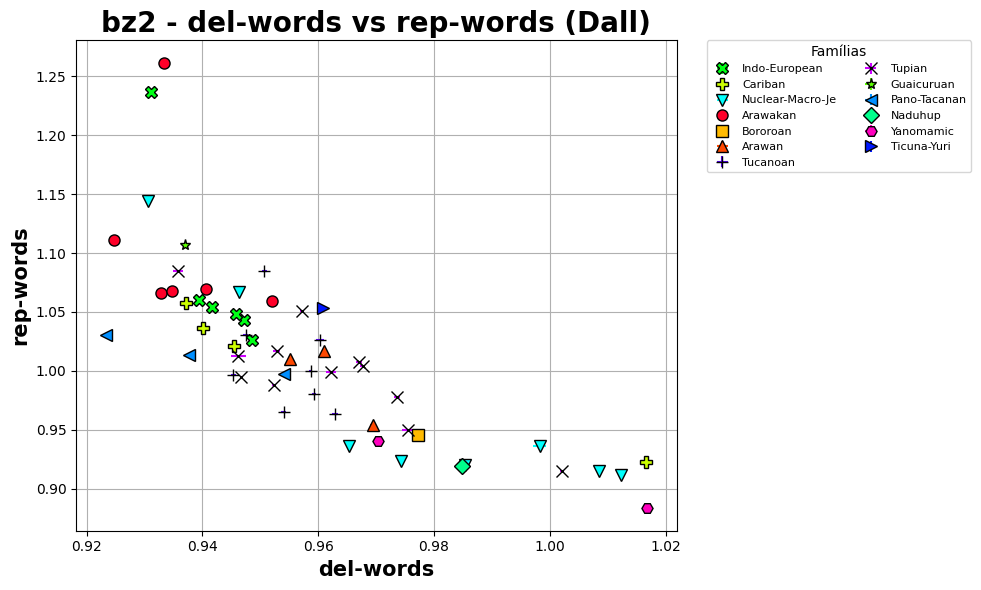

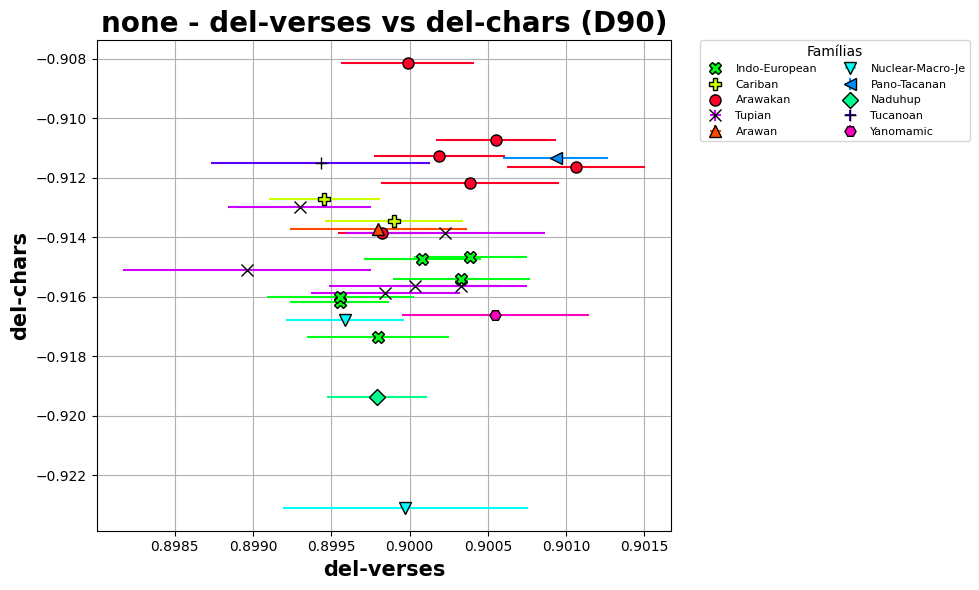

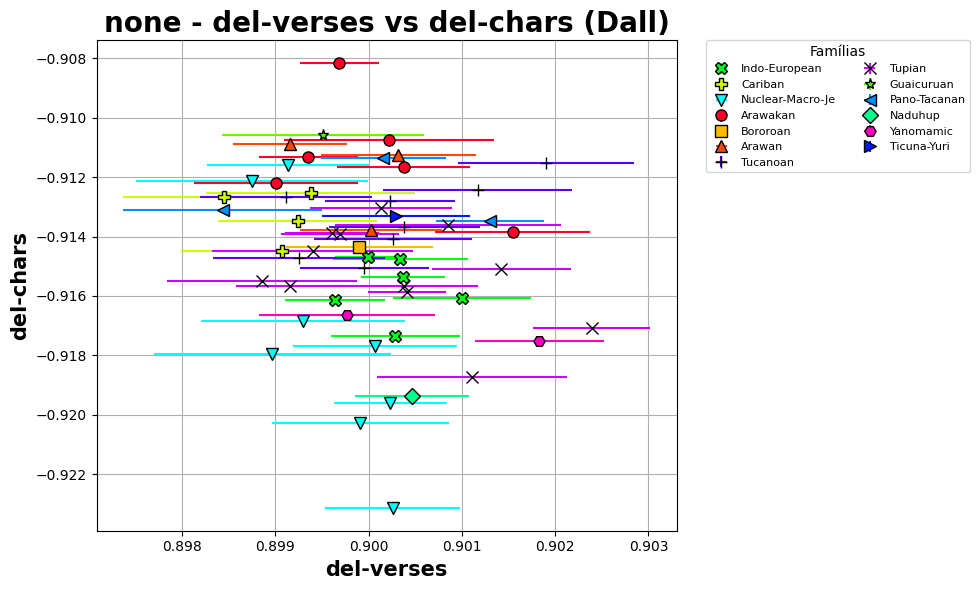

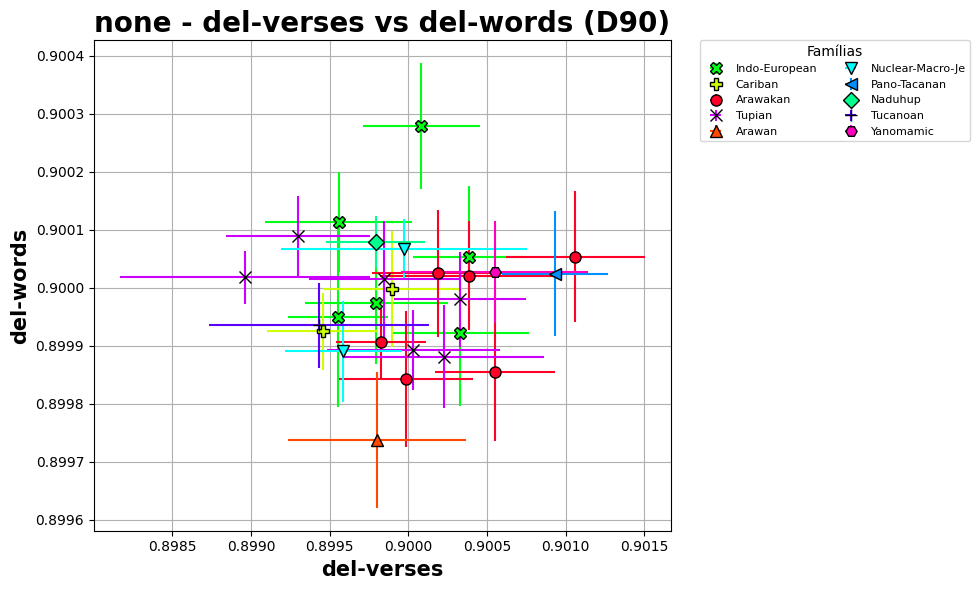

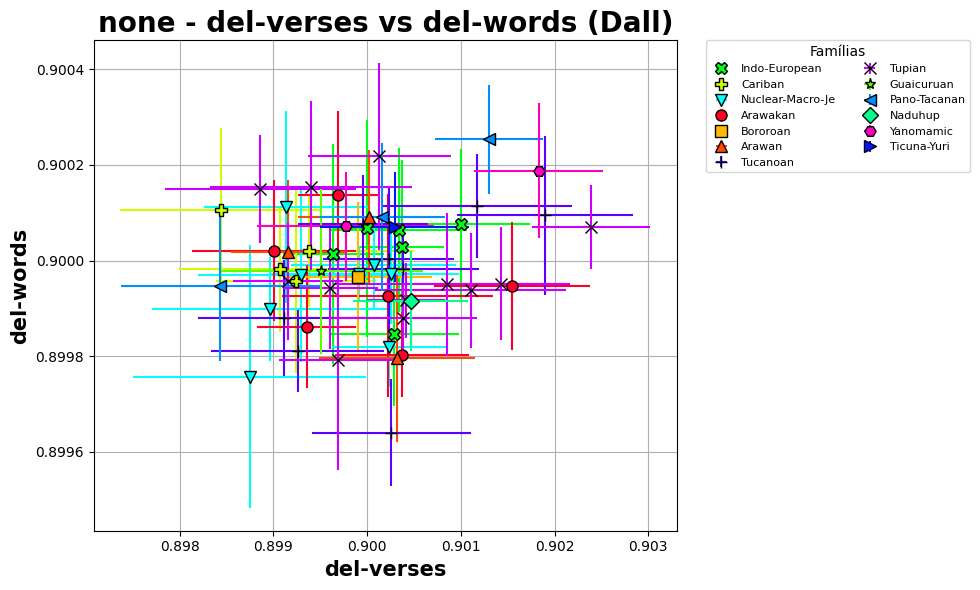

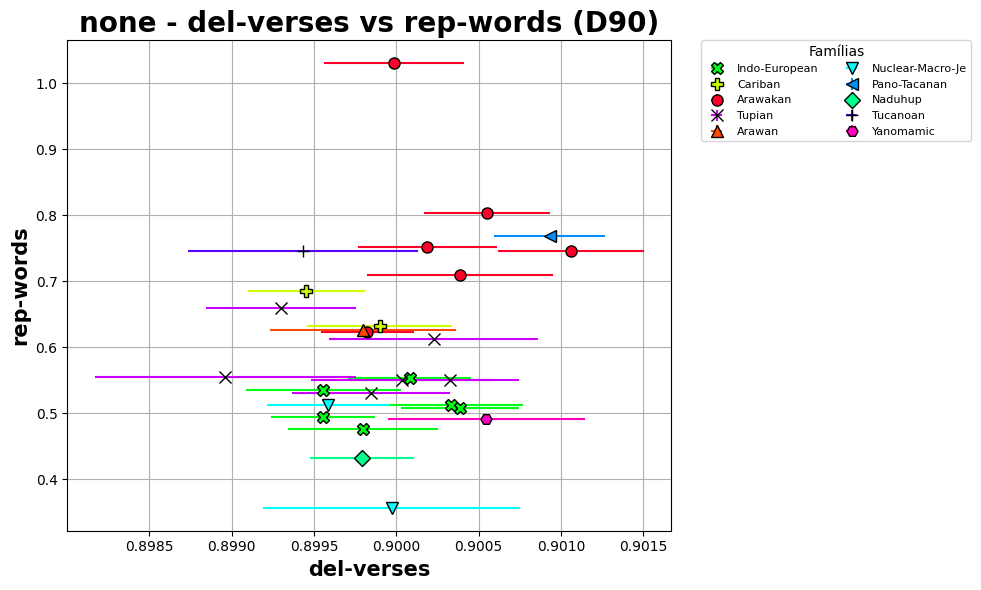

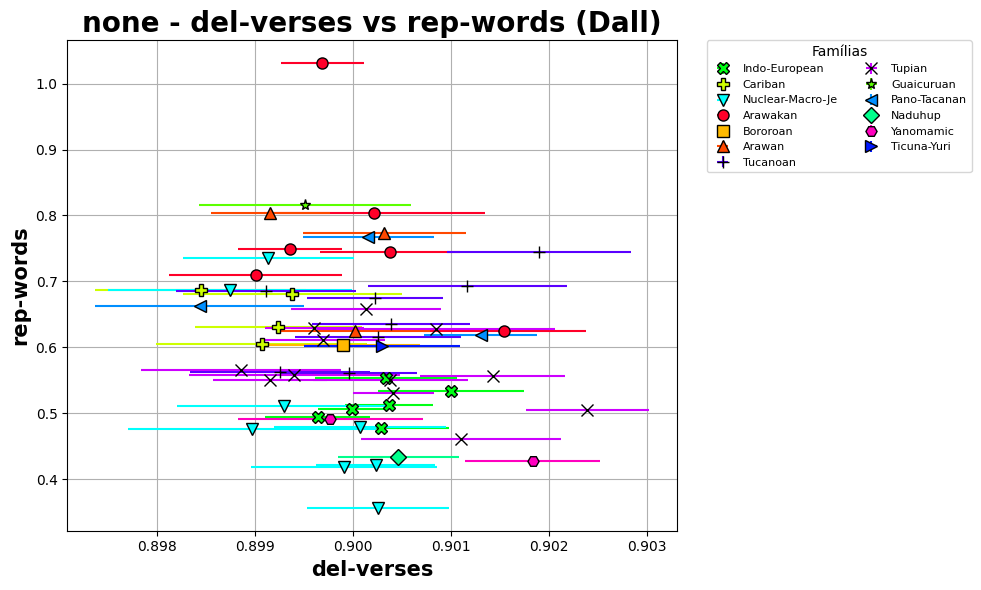

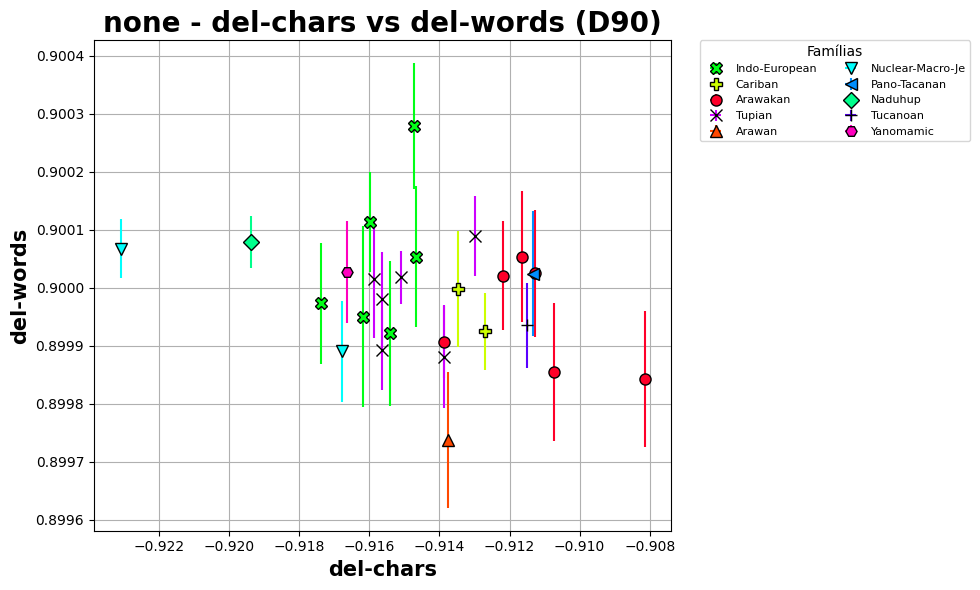

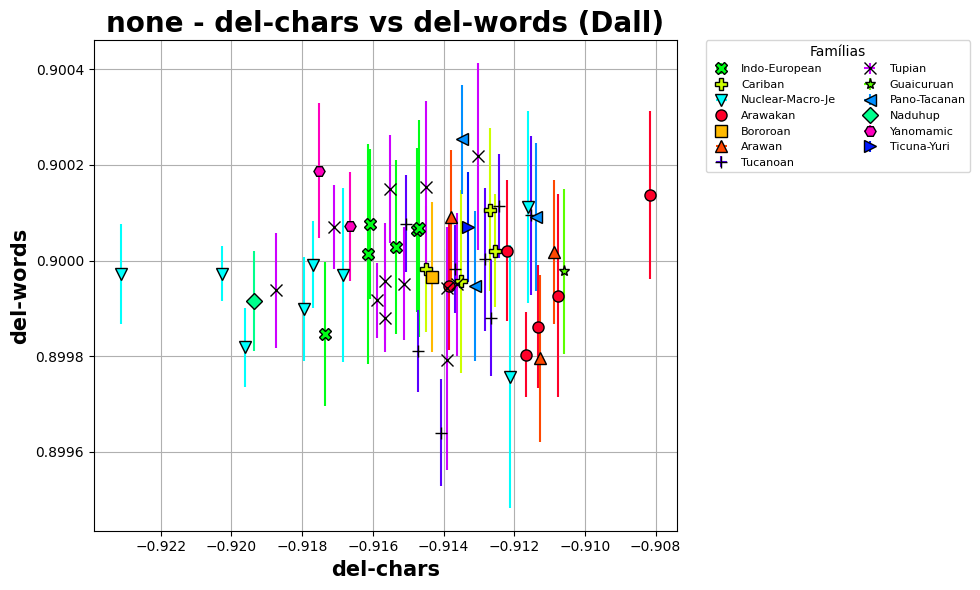

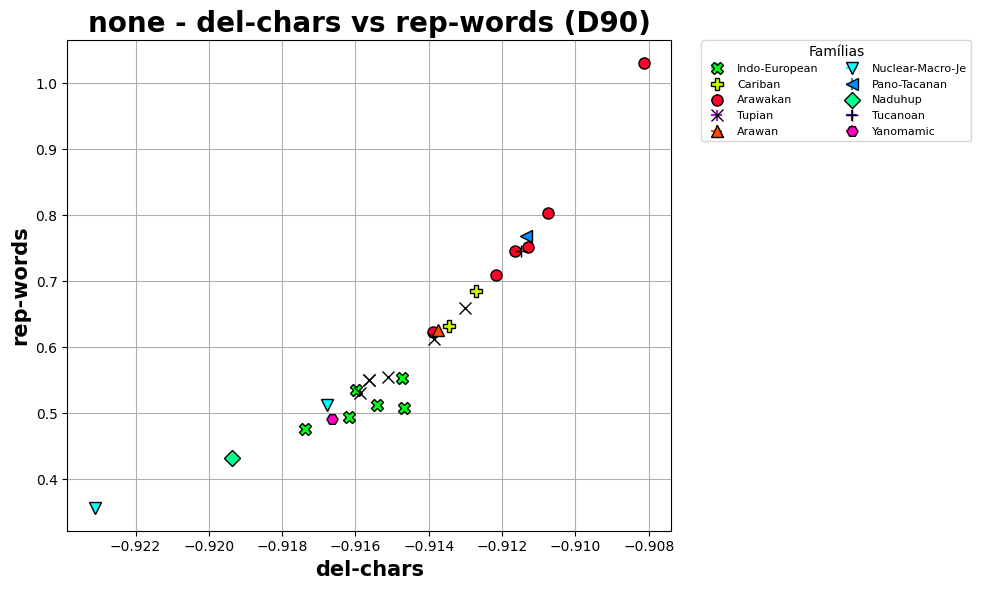

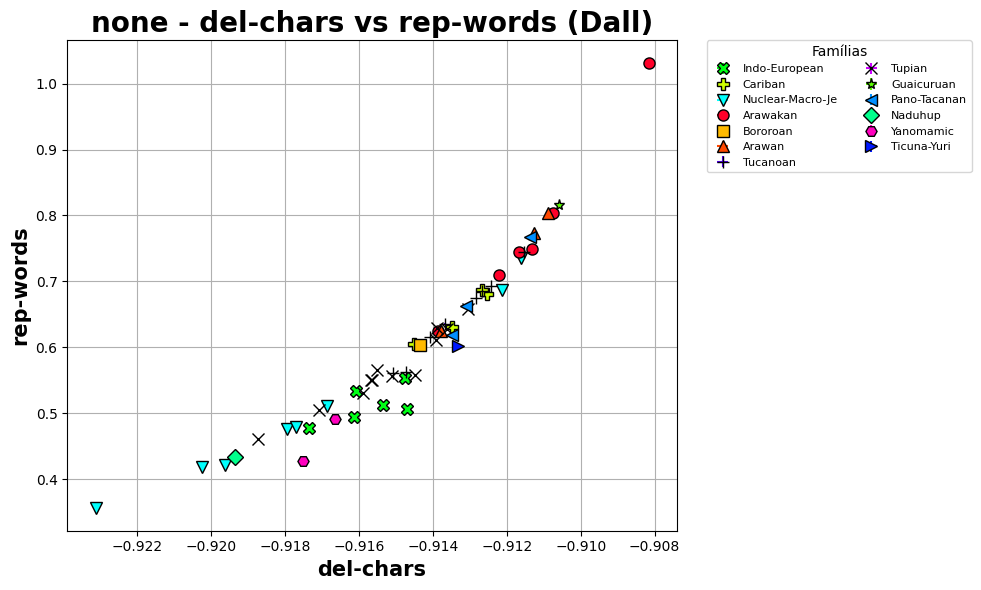

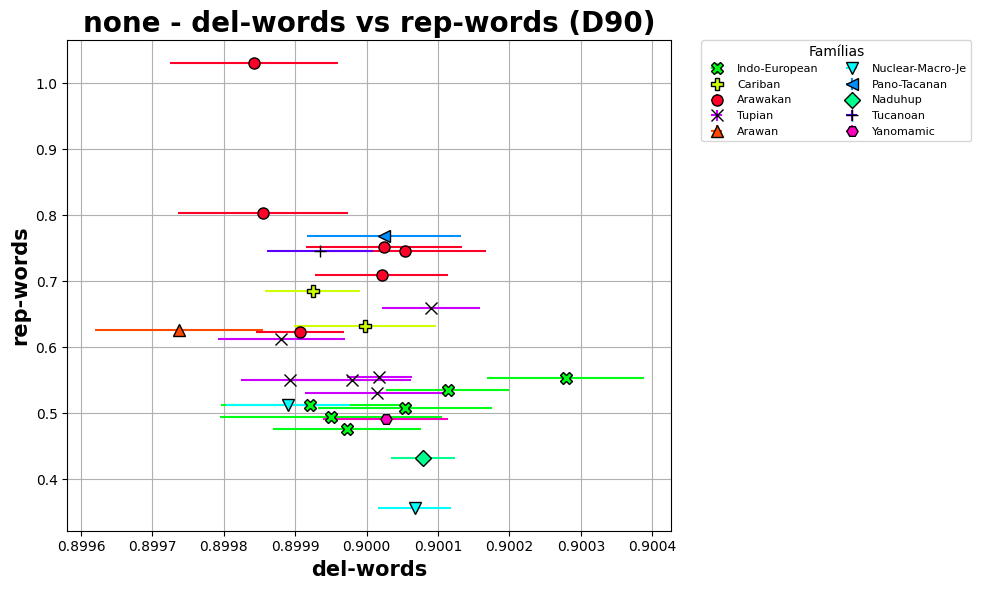

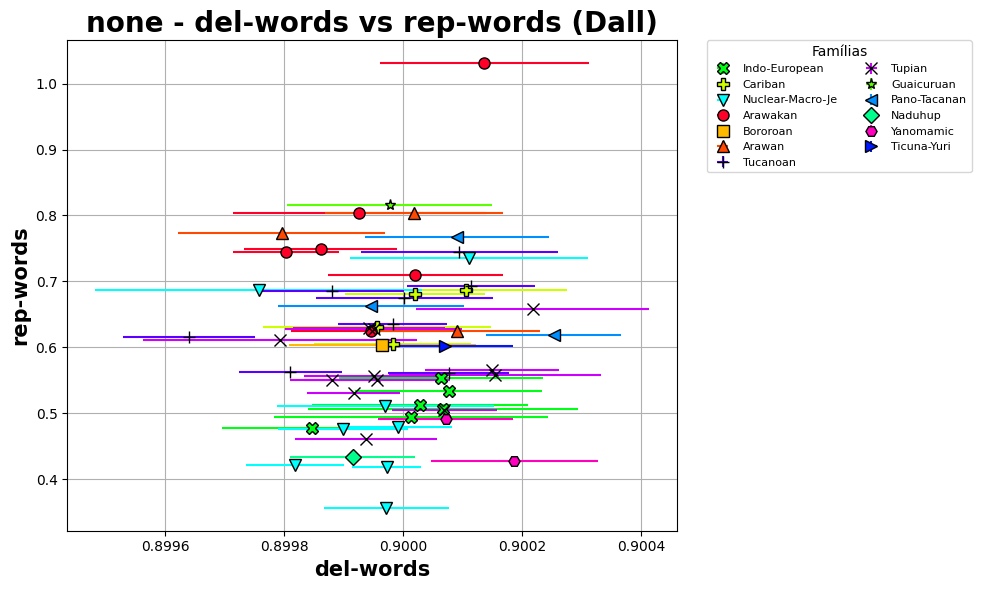

In [37]:
df90M = df90.merge(family[['wals', 'family_glottocode']], on='wals', how='left')
dfallM = dfall.merge(family[['wals', 'family_glottocode']], on='wals', how='left')

unique_families_df90 = df90M['family_glottocode'].dropna().unique()
unique_families_dfall = dfallM['family_glottocode'].dropna().unique()

all_unique_families = np.unique(np.concatenate((unique_families_df90, unique_families_dfall)))
colors = plt.cm.gist_rainbow(np.linspace(0.0, 1, len(all_unique_families)))
markers = ['o', '^', 's', 'P', '*', 'X', 'D', 'v', '<', '>', '+', 'x', 'H', '1', '2', '3', '4', '8', '|', '_']

family_to_color = {f: colors[i] for i, f in enumerate(all_unique_families)}
family_to_marker = {f: markers[i % len(markers)] for i, f in enumerate(all_unique_families)}

def plot_and_save_error_bars(sem_stats, df, algo, metric_x, metric_y, data_label, pdf=None):
    df_algo_metric = df[(df['algorithm'] == algo)]
    sem_algo_metric = sem_stats[(sem_stats['algorithm'] == algo)]

    if df_algo_metric.empty:
        print(f"Nenhum dado encontrado para algoritmo {algo} com métricas {metric_x} e {metric_y}.")
        return

    fig, ax = plt.subplots(figsize=(10, 6))
    unique_families = df['family_glottocode'].dropna().unique()

    has_data = False

    for family in unique_families:
        df_family = df_algo_metric[df_algo_metric['family_glottocode'] == family]

        for language in df_family['language'].unique():
            x_values = df_family[(df_family['language'] == language) & 
                                 (df_family['metric'] == metric_x)]['value']
            y_values = df_family[(df_family['language'] == language) & 
                                 (df_family['metric'] == metric_y)]['value']

            if len(x_values) > 0 and len(y_values) > 0:
                x = x_values.mean()
                y = y_values.mean()
                
                try:
                    xerr = sem_algo_metric[(sem_algo_metric['language'] == language) & 
                                            (sem_algo_metric['metric'] == metric_x)]['sem'].values[0]
                    yerr = sem_algo_metric[(sem_algo_metric['language'] == language) & 
                                            (sem_algo_metric['metric'] == metric_y)]['sem'].values[0]
                except IndexError:
                    xerr = yerr = 0

                ax.errorbar(x, y, xerr=xerr, yerr=yerr, fmt=family_to_marker.get(family, 'o'), 
                             color=family_to_color.get(family, 'gray'),
                             label=family if language == df_family['language'].unique()[0] else "", 
                             markersize=8, markeredgewidth=1, markeredgecolor='black')
                has_data = True

    if not has_data:
        print(f"Nenhum dado encontrado para as métricas {metric_x} e {metric_y} no algoritmo {algo}.")
        plt.close(fig)
        return

    ax.set_title(f'{algo} - {metric_x} vs {metric_y} ({data_label})', weight='bold', fontsize=20)
    ax.set_xlabel(metric_x, weight='bold', fontsize=15)
    ax.set_ylabel(metric_y, weight='bold', fontsize=15)
    
    if has_data:
        ax.legend(fontsize=8, ncol=2, title="Famílias", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    ax.grid(True)
    fig.tight_layout()
    
    plt.show()
    
    if pdf is not None:
        pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

selected_algorithms_90 = df90M['algorithm'].unique()
selected_algorithms_all = dfallM['algorithm'].unique()

metrics = [
    "del-verses", "del-chars", "del-words", "rep-words"
]

with PdfPages('../images/h3_with_sem.pdf') as pdf:
    for algo in selected_algorithms_90:
        for i, metric_x in enumerate(metrics):
            for metric_y in metrics[i+1:]:
                plot_and_save_error_bars(sem_90, df90M, algo, metric_x, metric_y, "D90", pdf)
                plot_and_save_error_bars(sem_all, dfallM, algo, metric_x, metric_y, "Dall", pdf)